In [2]:
import pandas as pd
import numpy as np
import re
import csv
import os 
import math
import gzip
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from progressbar import ProgressBar
import matplotlib.pyplot as plt

## Plot ROC curves based on the metrics 

Using the false and true positive rates stored in the metrics file, we can plot the ROC curves; use the different functions depending on whether the measure is IC-based, edge-based or direct groupwise (as results are slightly different formats).


In [2]:
# directory to contain ROC curves
if not os.path.exists('ROCfigures'):
    os.makedirs('ROCfigures')

In [3]:
if not os.path.exists('ROCfigures/ICPairwise'):
    os.makedirs('ROCfigures/ICPairwise')

def plotROC_ic(metrics_file):
    
    data = pd.read_csv(metrics_file, sep='\t')
    
    data = data.drop('Unnamed: 0', axis=1)
    
    for i in range(len(data.index)):
        
        ic_name = metrics_file.replace('ROCmetrics/metrics_', '').replace('_indirect_groupwise_combinations.tsv', '')
        measure_name = data.loc[i, 'measure'] # for plot naming later 
        
        fpr = data.loc[i, 'fpr'].strip('[').strip(']').strip(' ').split(',') # these are saved as strings so have to clean
        tpr = data.loc[i, 'tpr'].strip('[').strip(']').strip(' ').split(',')
        
        x = [ float(i) for i in fpr ]
        y = [ float(i) for i in tpr ]
        
        # plot the curve 
        plt.figure(figsize=(8, 8))
        plt.plot(x, y, linestyle='--', marker='o', color='orange', lw = 2, label='ROC curve', clip_on=False)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('{} IC-based {} ROC curve,'.format(ic_name, measure_name) + ' AUC = %.4f'%metrics.auc(x, y))
        plt.legend(loc="lower right")
                  
        plt.savefig('ROCfigures/ICPairwise/ROC_{}_{}.png'.format(ic_name, measure_name)) 
        
        plt.show()

In [3]:
if not os.path.exists('ROCfigures/EdgePairwise'):
    os.makedirs('ROCfigures/EdgePairwise')
    
def plotROC_edge(metrics_file):
    
    data = pd.read_csv(metrics_file, sep='\t')
    
    data = data.drop('Unnamed: 0', axis=1)
    
    for i in range(len(data.index)):
        
        measure_name = data.loc[i, 'measure'] 
        
        
        fpr = data.loc[i, 'fpr'].strip('[').strip(']').strip(' ').split(',')
        tpr = data.loc[i, 'tpr'].strip('[').strip(']').strip(' ').split(',')
        
        x = [ float(i) for i in fpr ]
        y = [ float(i) for i in tpr ]
        
        plt.figure(figsize=(8, 8))
        plt.plot(x, y, linestyle='--', marker='o', color='orange', lw = 2, label='ROC curve', clip_on=False)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Edge-based {} ROC curve,'.format(measure_name) + ' AUC = %.4f'%metrics.auc(x, y))
        plt.legend(loc="lower right")
                  
        plt.savefig('ROCfigures/EdgePairwise/ROC_{}.png'.format(measure_name)) 
        
        plt.show()

In [5]:
if not os.path.exists('ROCfigures/DirectGroupwise'):
    os.makedirs('ROCfigures/DirectGroupwise')

def plotROC_direct(metrics_file):
    
    data = pd.read_csv(metrics_file, sep='\t')
    
    data = data.drop('Unnamed: 0', axis=1)
    
    # dictionary for replacing bad measure names
    measures_revised = pd.read_csv('measures_revised.csv', sep=',')
    measures_dict = dict(zip(measures_revised.ID, measures_revised.SIM_PAIRWISE_DAG_EDGE_RADA_1989))
    
    for i in range(len(data.index)):
        
        measure_name = measures_dict.get(data.loc[i, 'measure'])
        
        measure_name = measure_name.replace('SIM_', '')
        
        fpr = data.loc[i, 'fpr'].strip('[').strip(']').strip(' ').split(',')
        tpr = data.loc[i, 'tpr'].strip('[').strip(']').strip(' ').split(',')
        
        x = [ float(i) for i in fpr ]
        y = [ float(i) for i in tpr ]
        
        plt.figure(figsize=(8, 8))
        plt.plot(x, y, linestyle='--', marker='o', color='orange', lw = 2, label='ROC curve', clip_on=False)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Direct {} ROC curve,'.format(measure_name) + ' AUC = %.4f'%metrics.auc(x, y))
        plt.legend(loc="lower right")
                  
        plt.savefig('ROCfigures/DirectGroupwise/ROC_{}.png'.format(measure_name)) 
        
        plt.show()

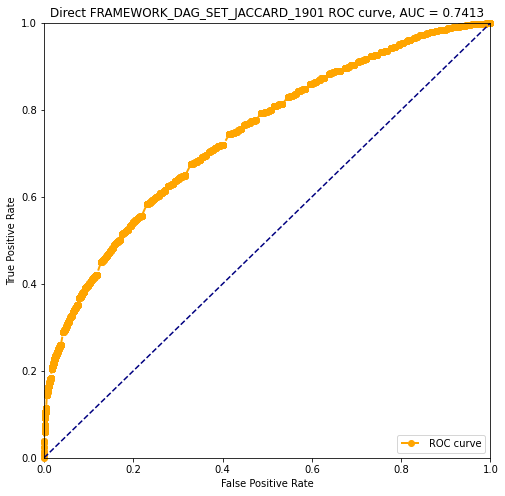

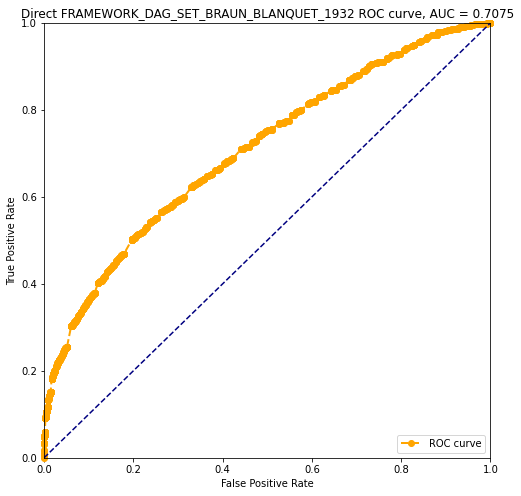

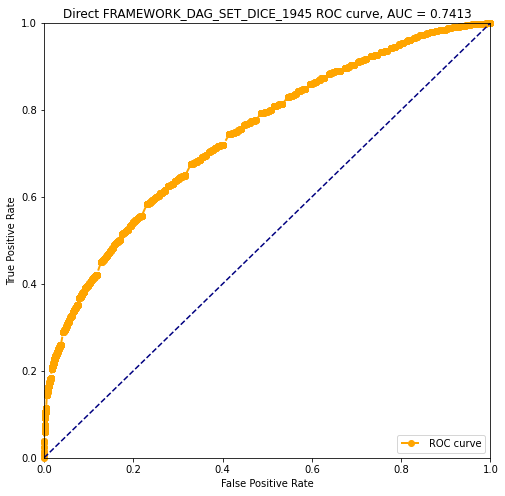

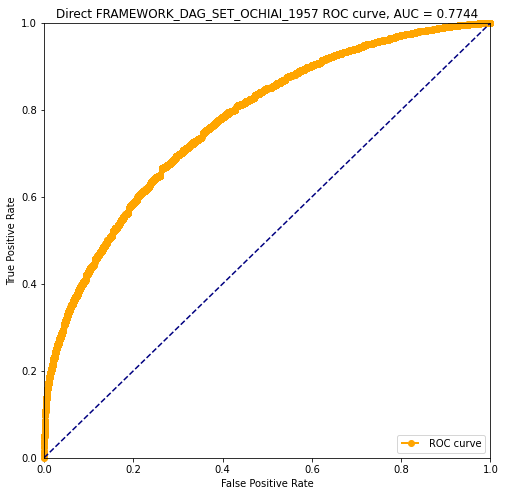

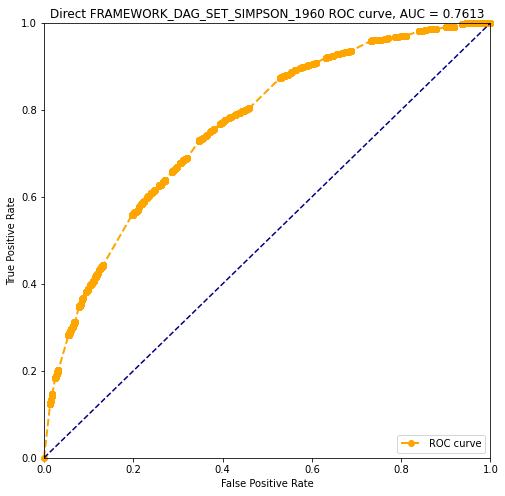

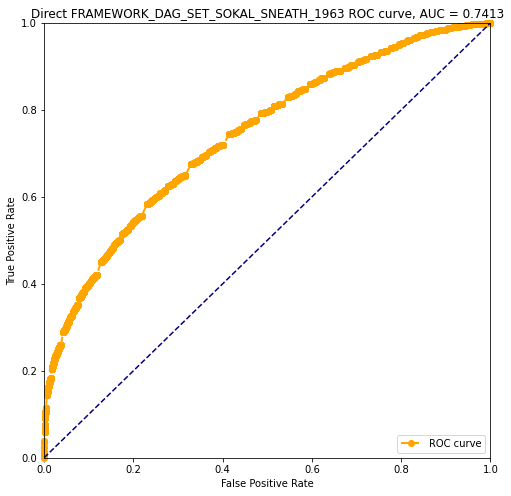

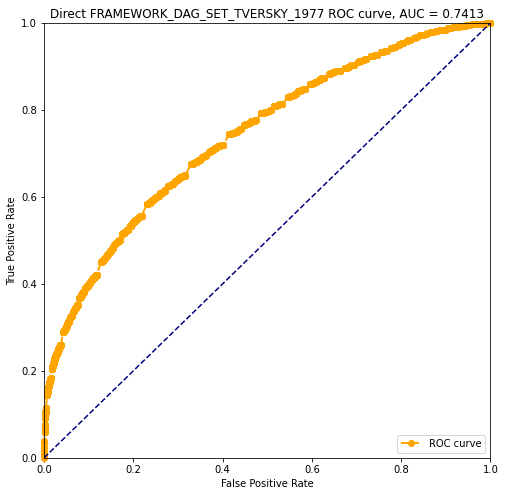

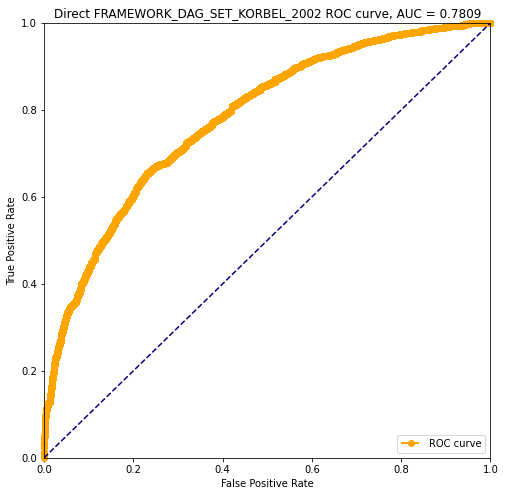

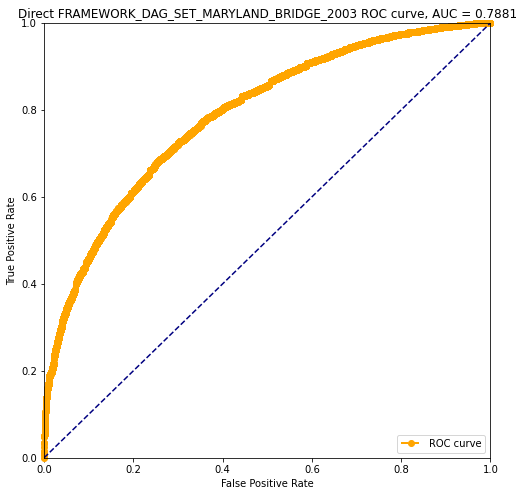

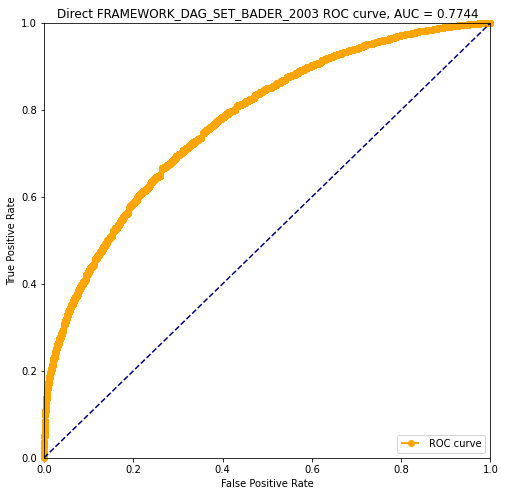

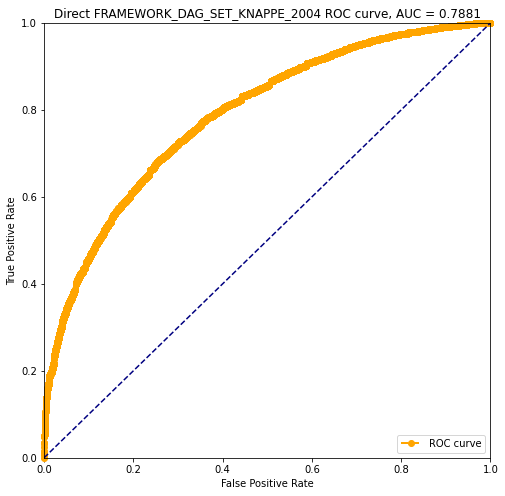

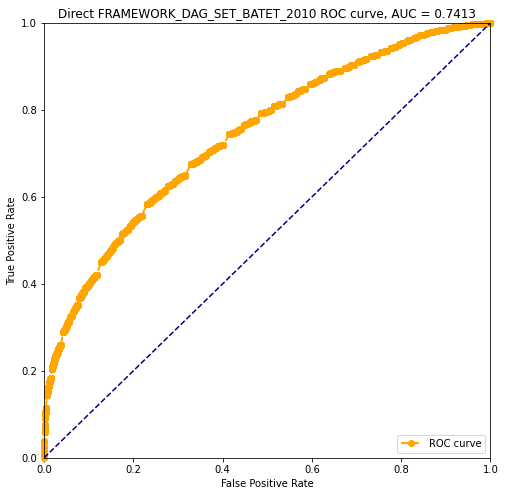

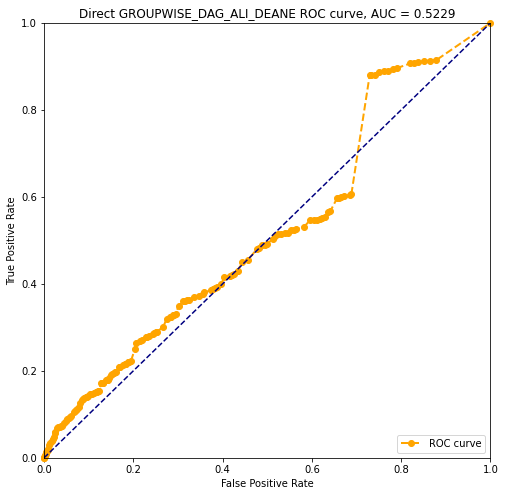

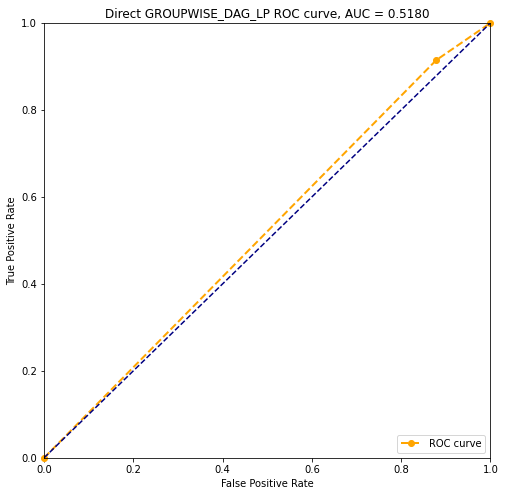

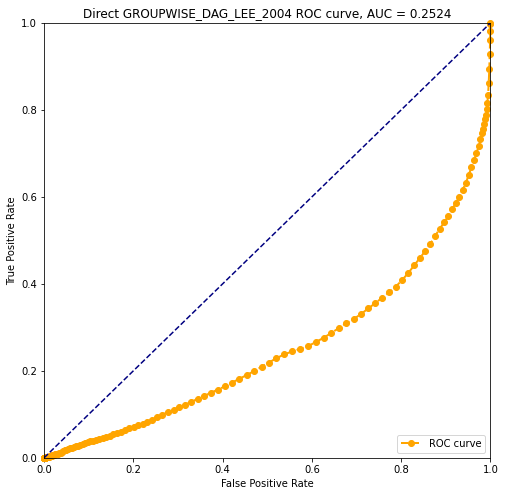

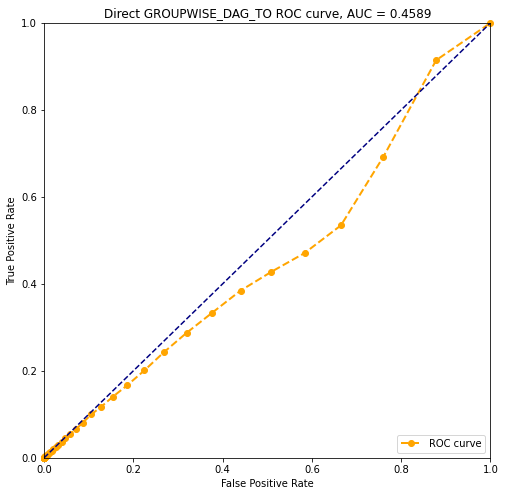

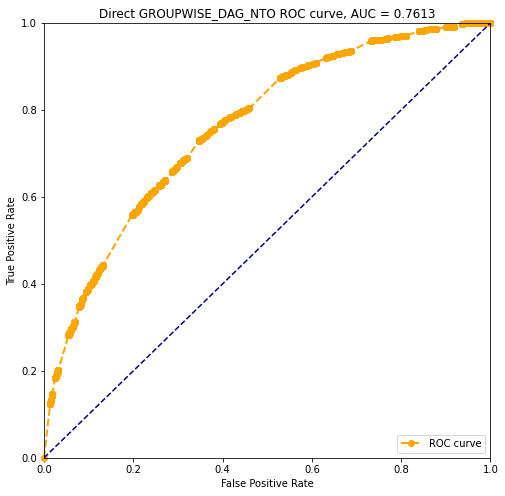

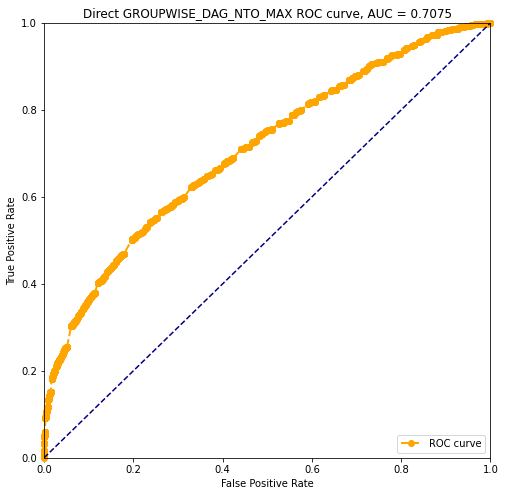

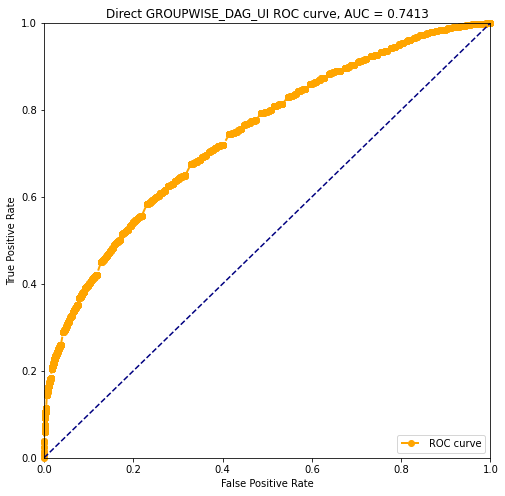

In [19]:
# run on all direct groupwise 

plotROC_direct('ROCmetrics/metrics_direct_groupwise_combinations.tsv')

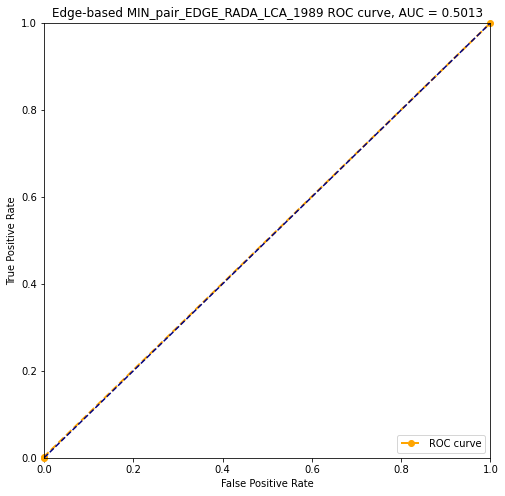

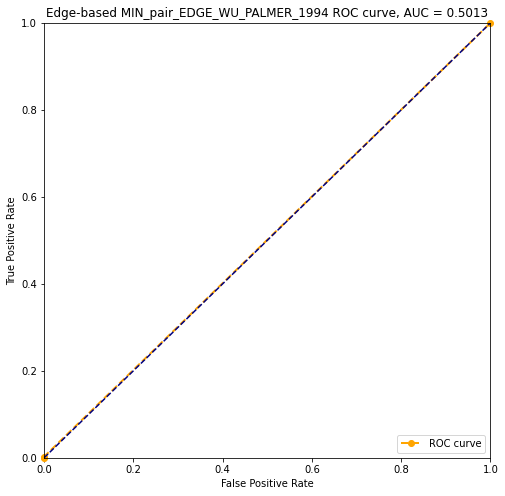

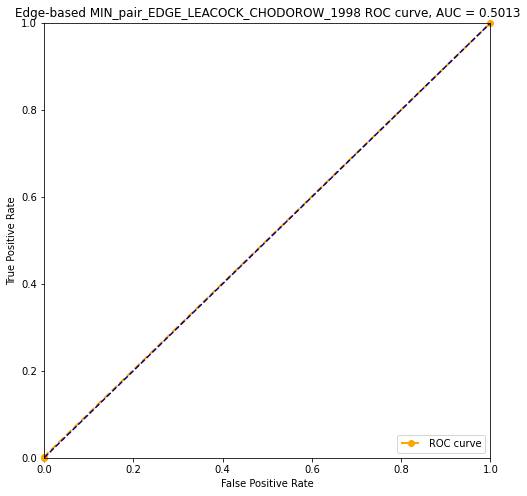

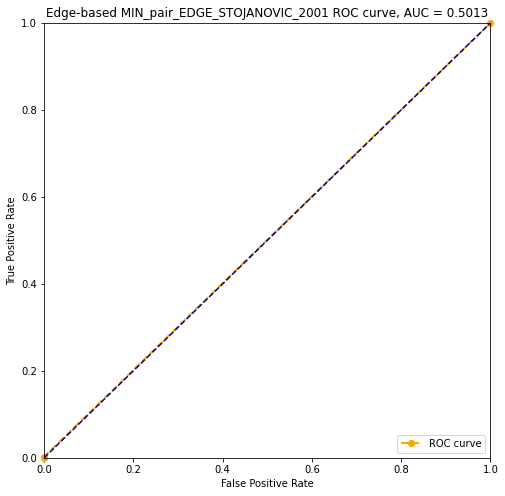

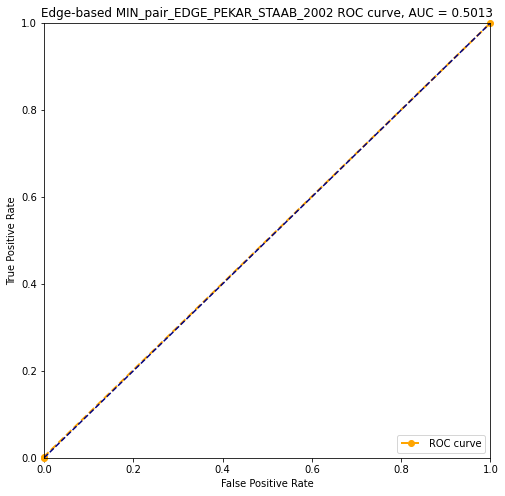

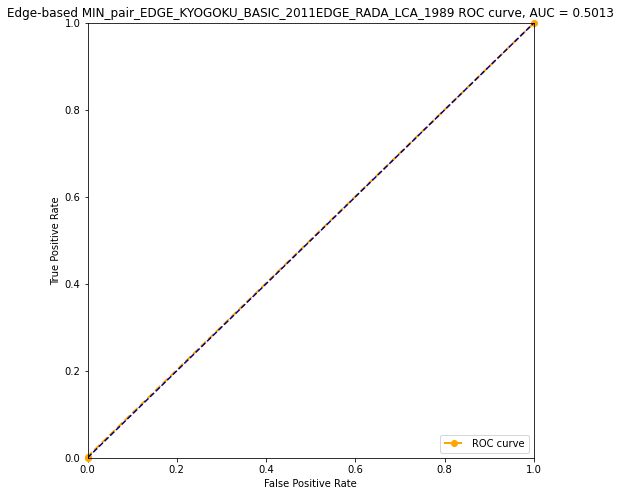

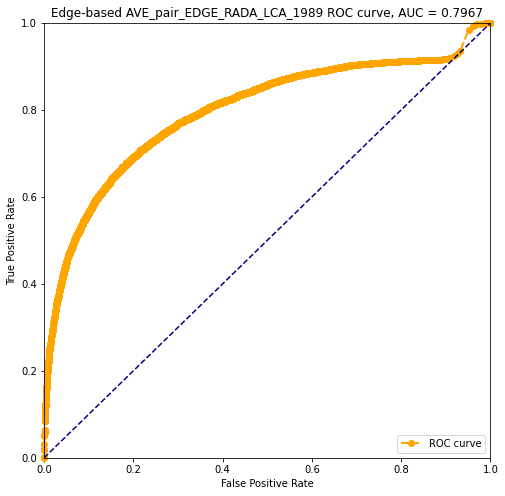

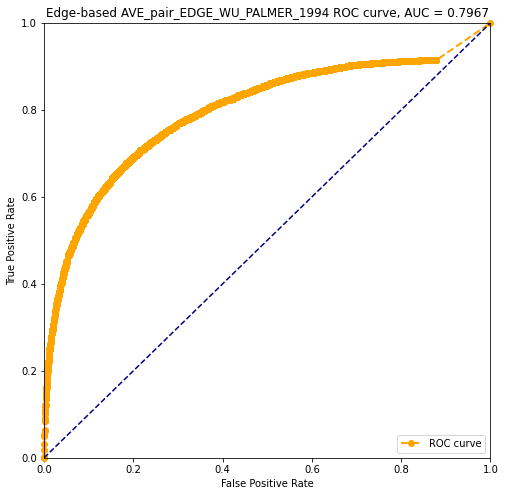

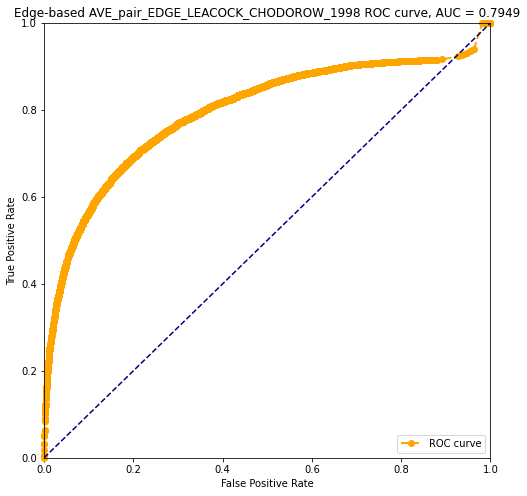

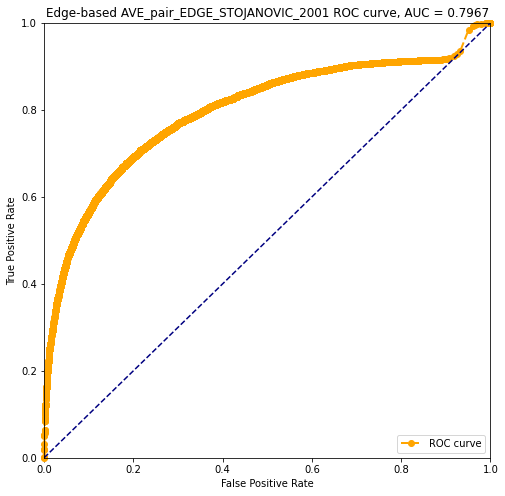

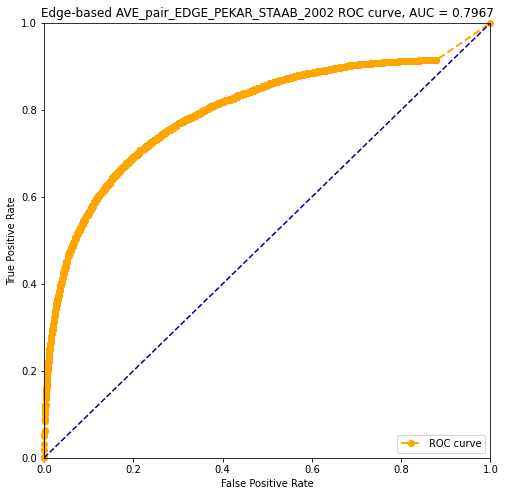

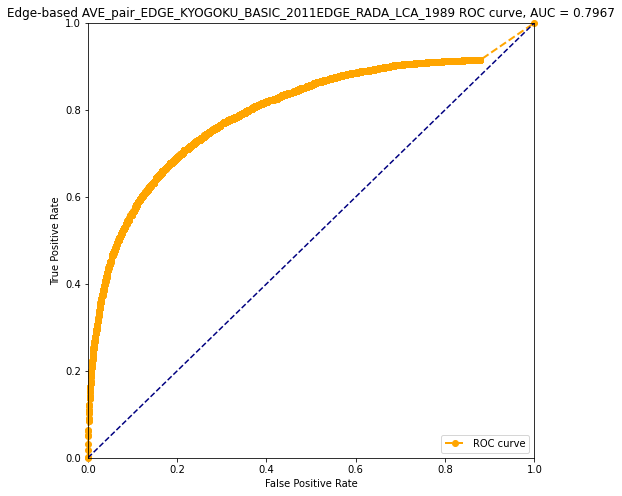

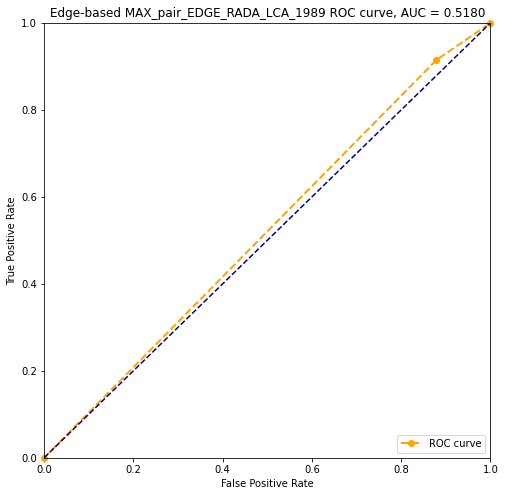

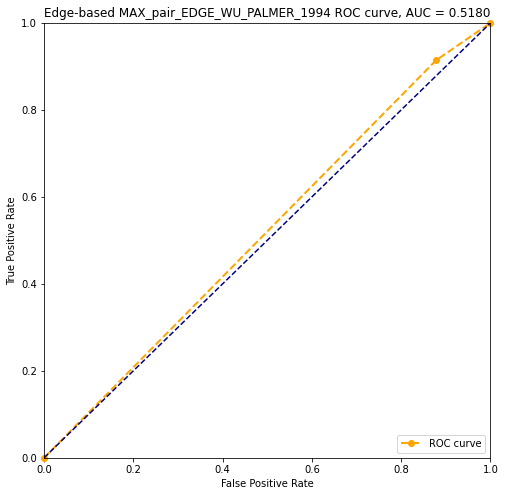

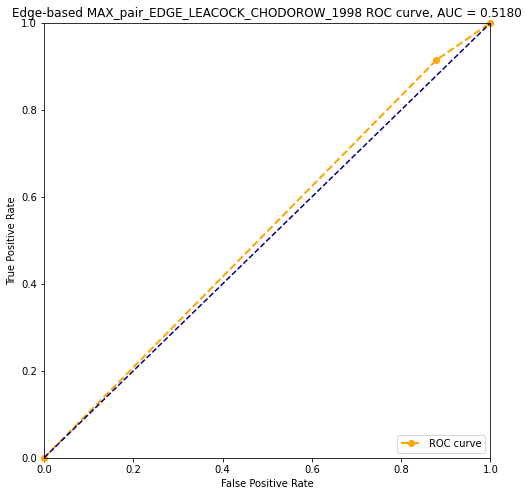

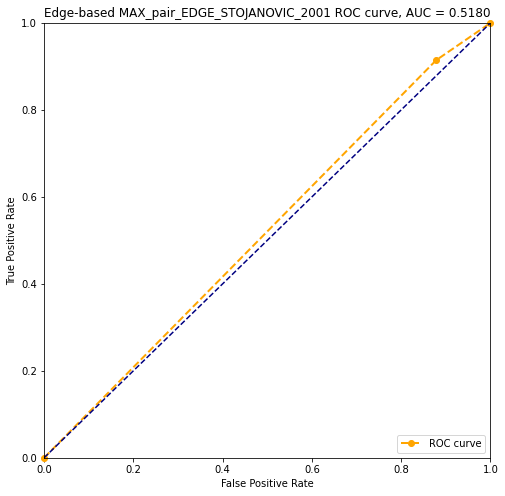

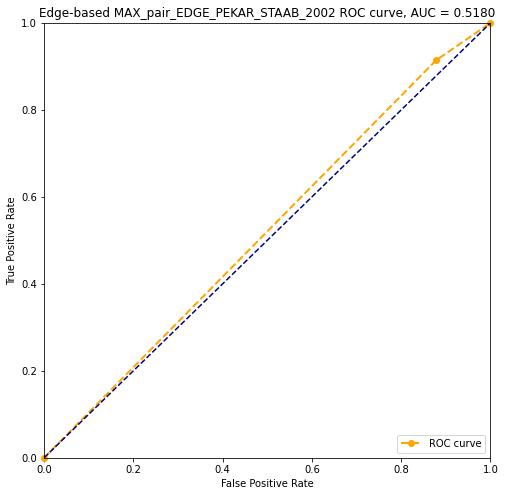

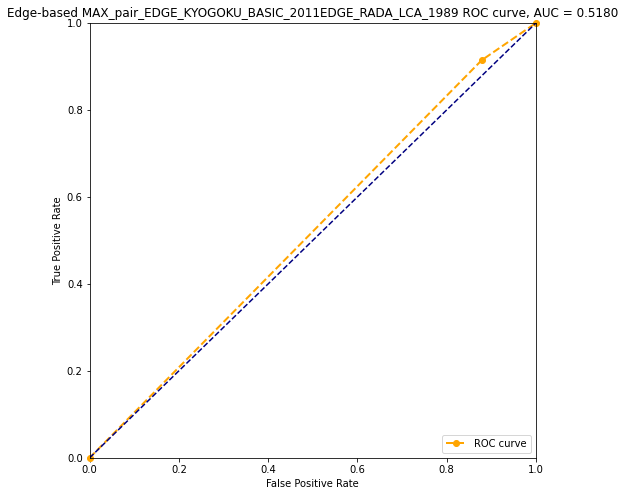

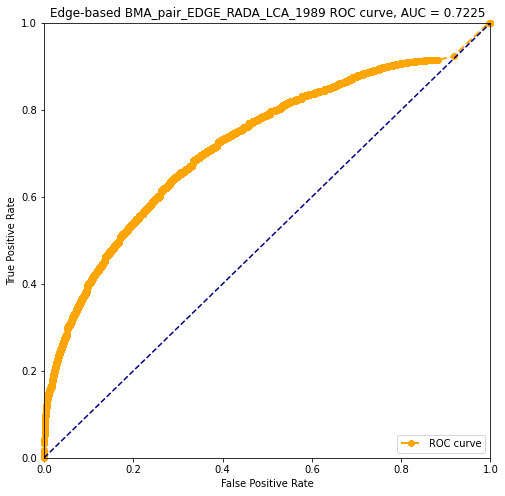

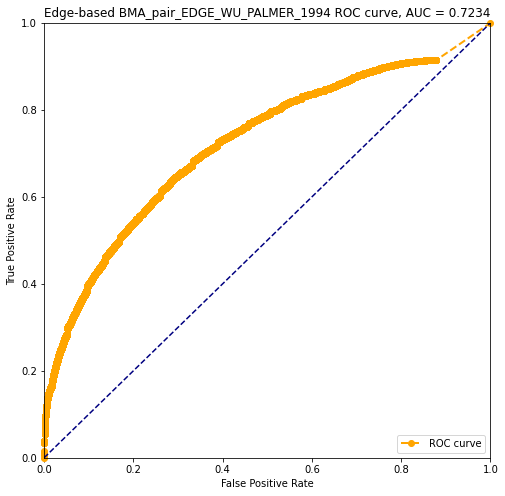

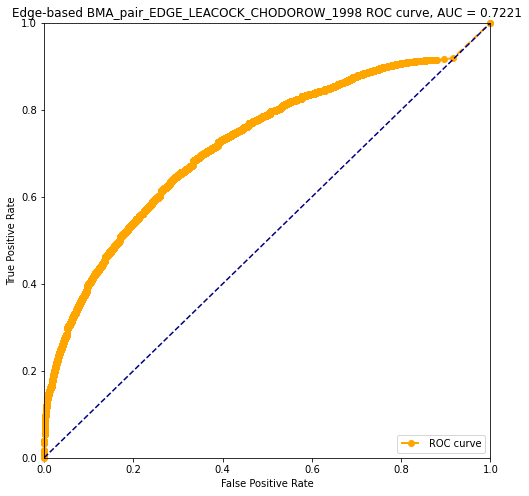

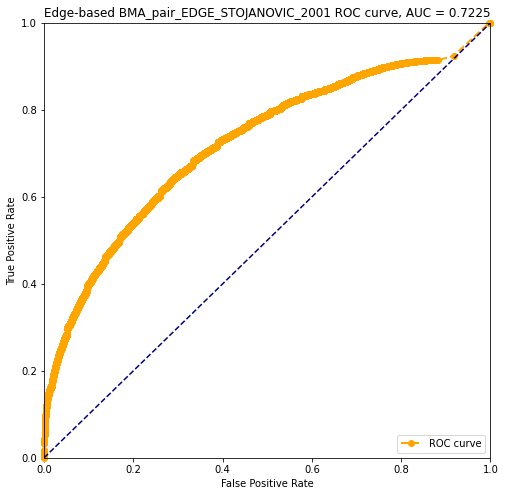

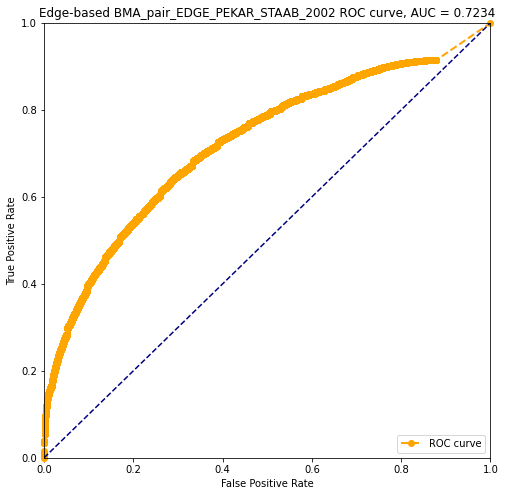

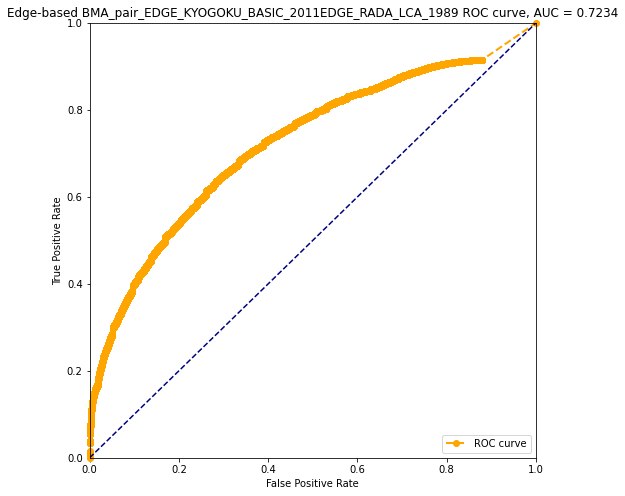

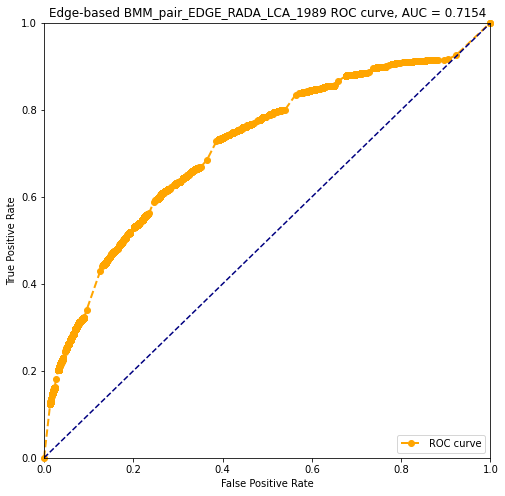

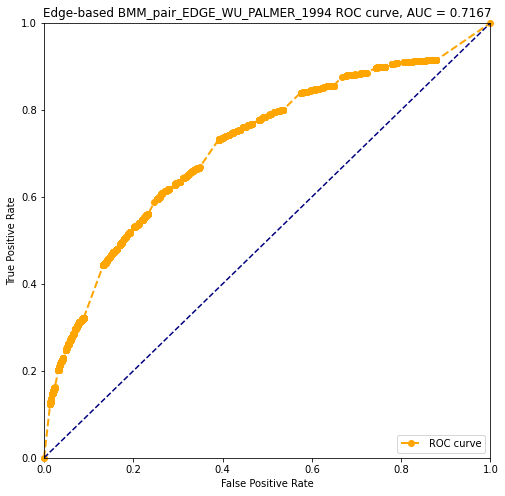

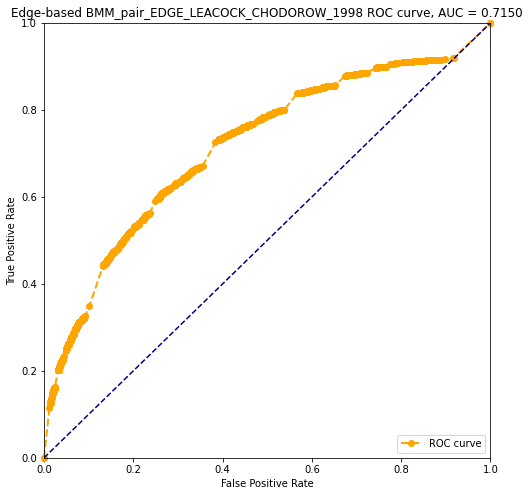

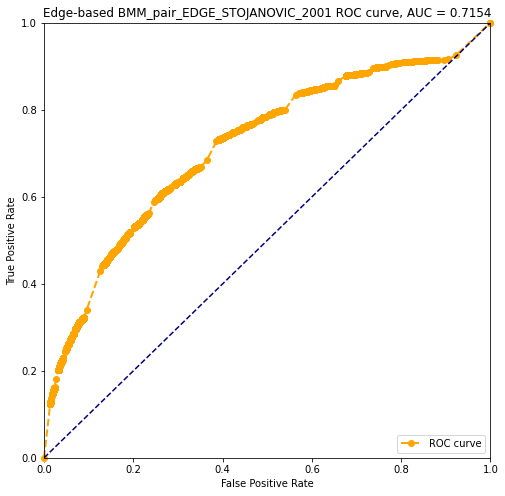

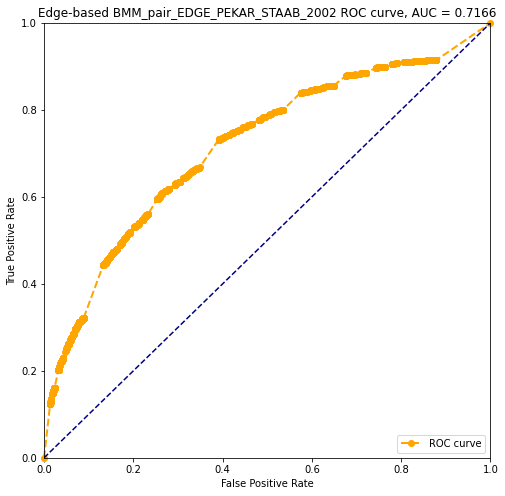

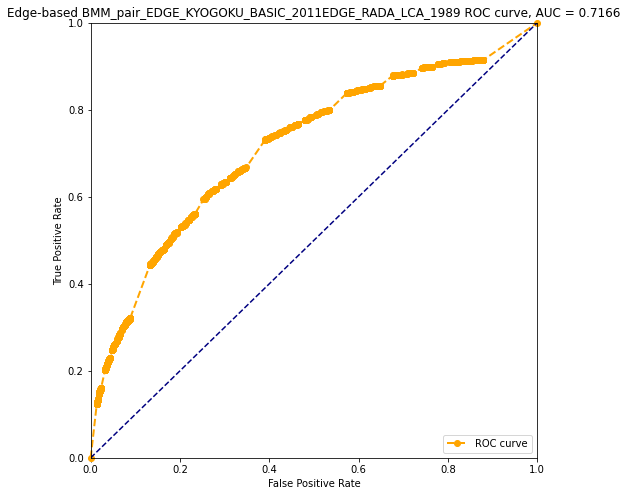

In [5]:
# edge based 
plotROC_edge('ROCmetrics/metrics_indirect_groupwise_combinations.tsv')

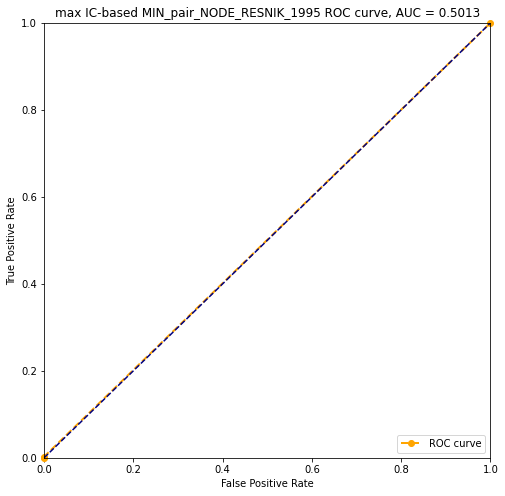

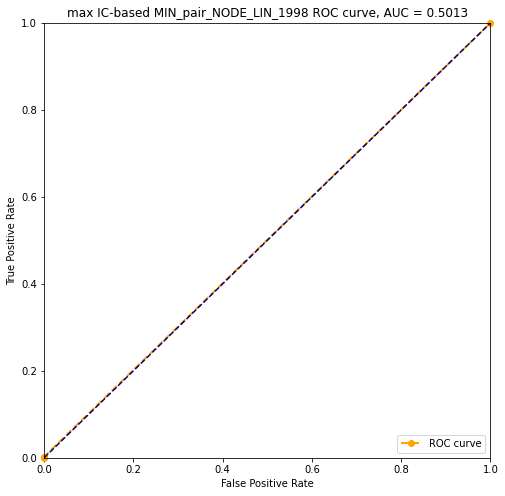

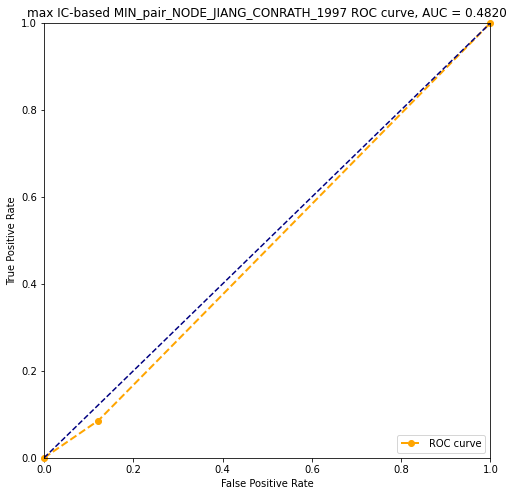

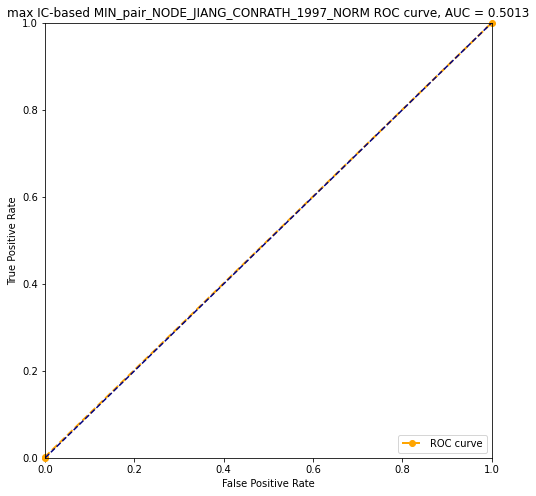

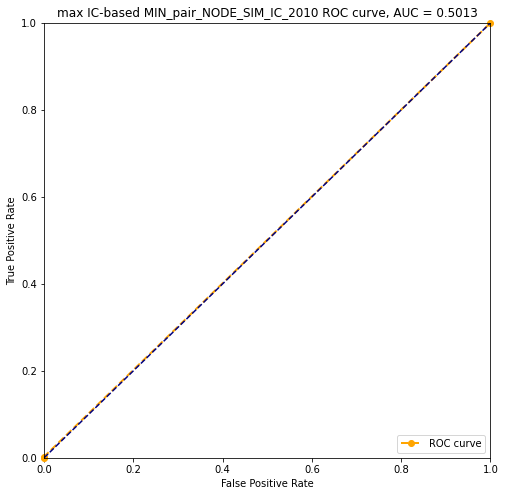

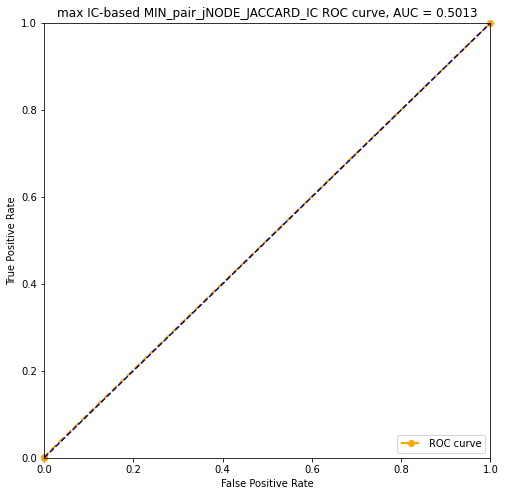

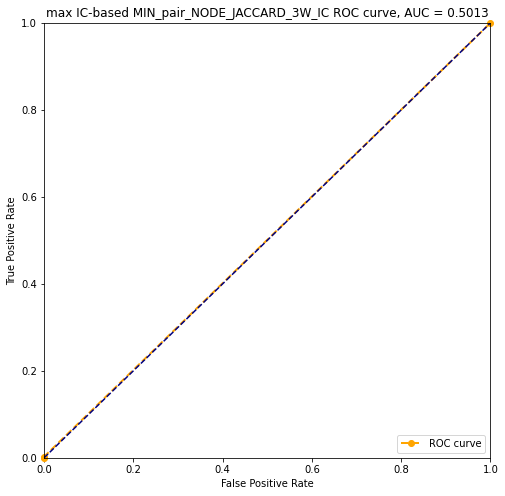

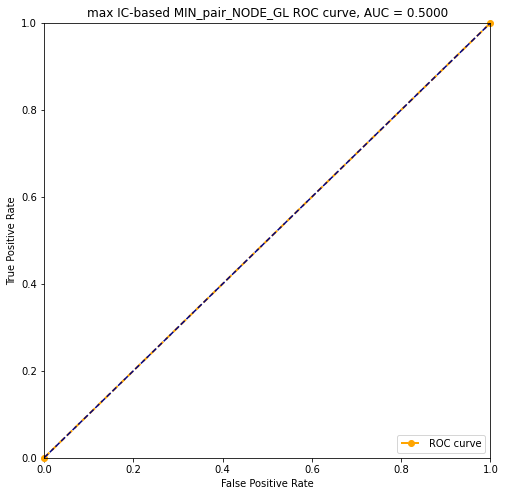

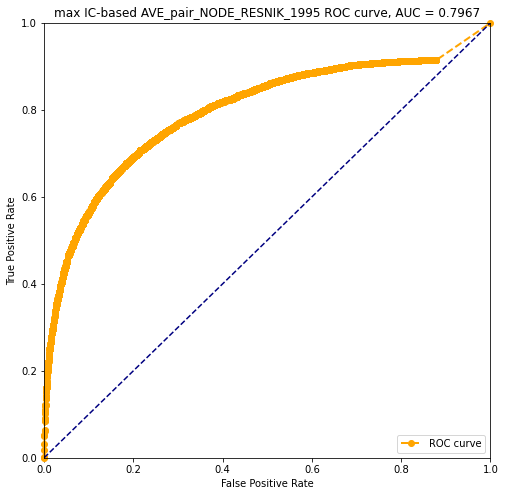

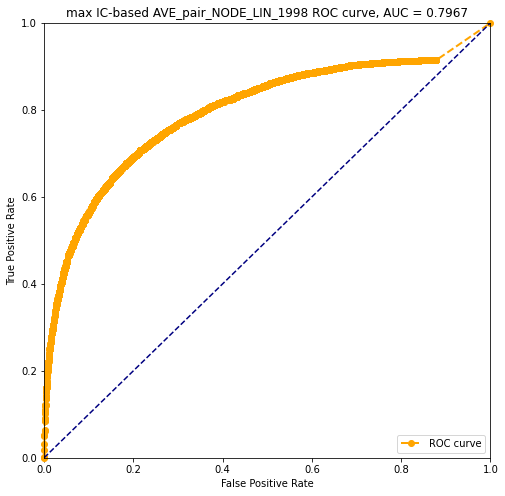

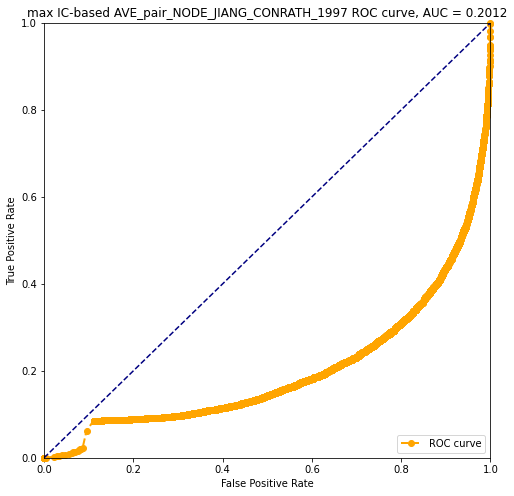

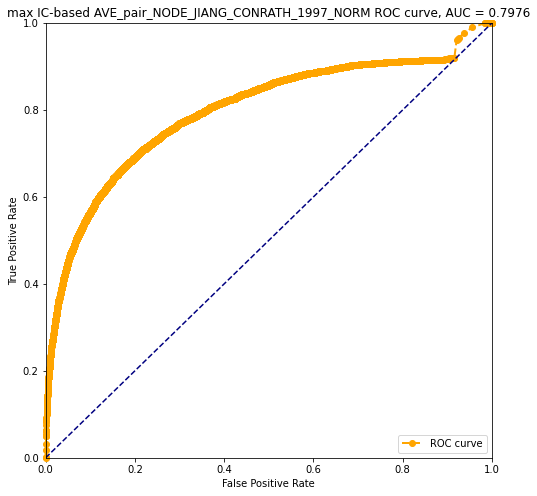

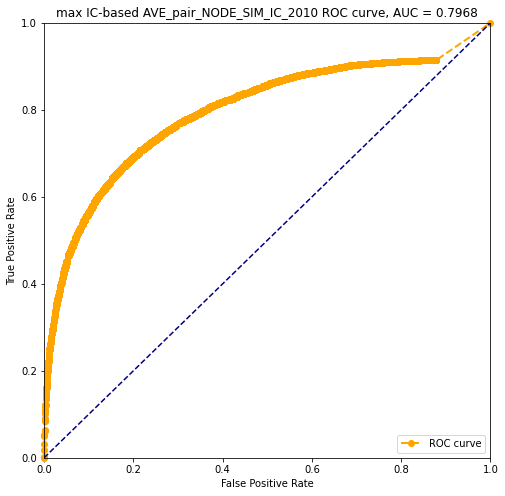

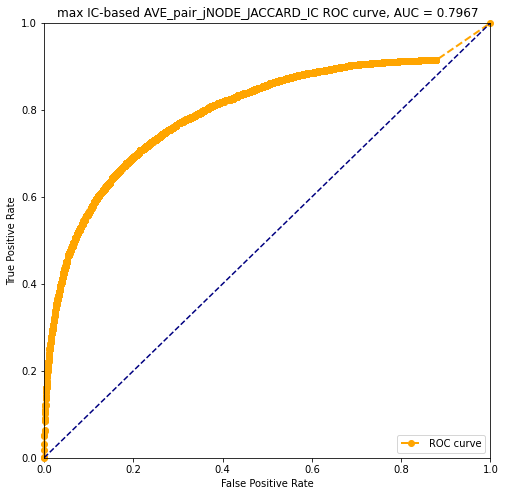

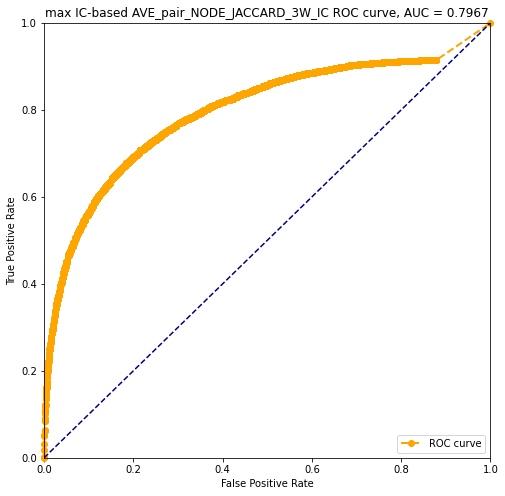

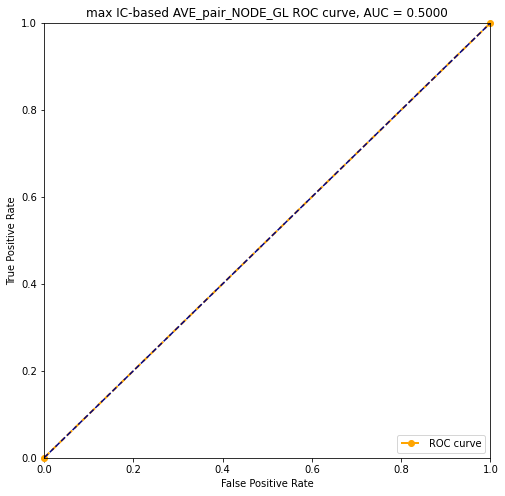

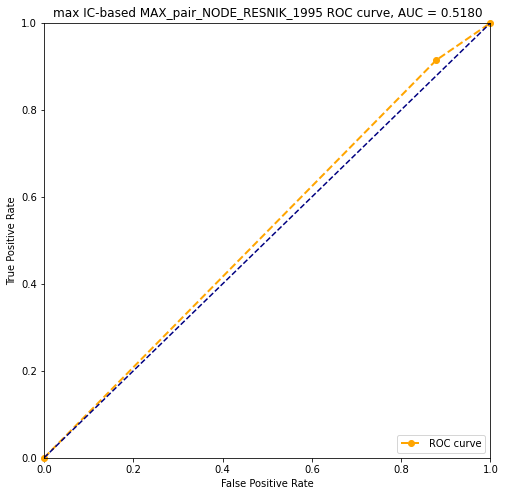

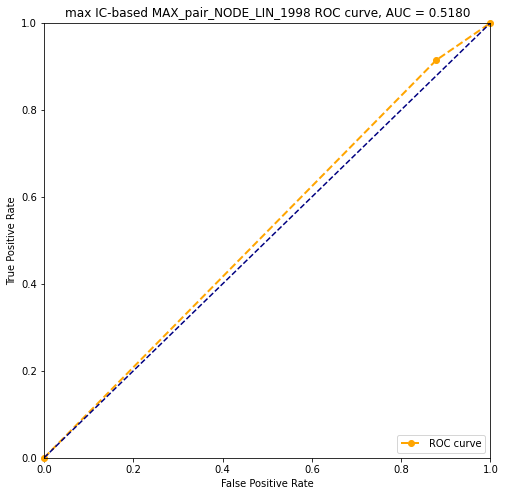

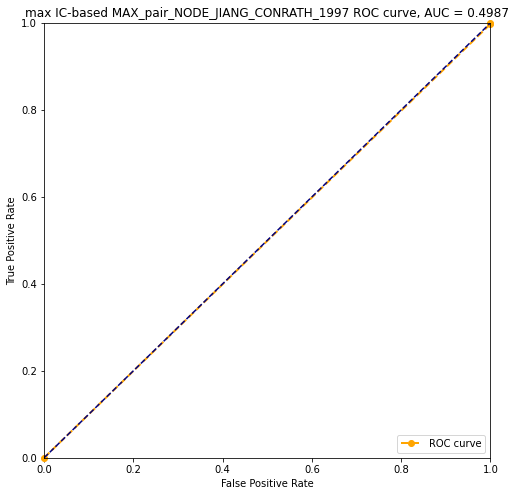

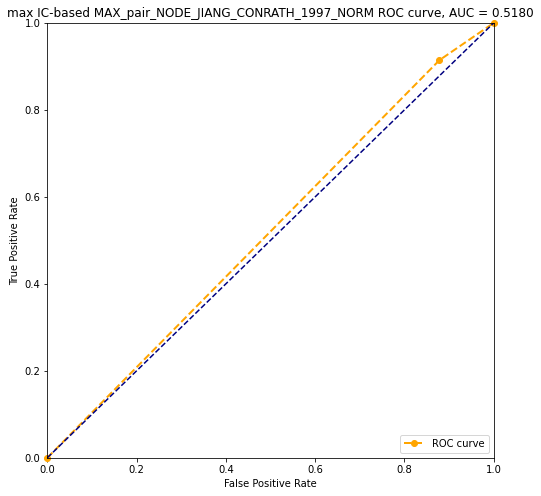

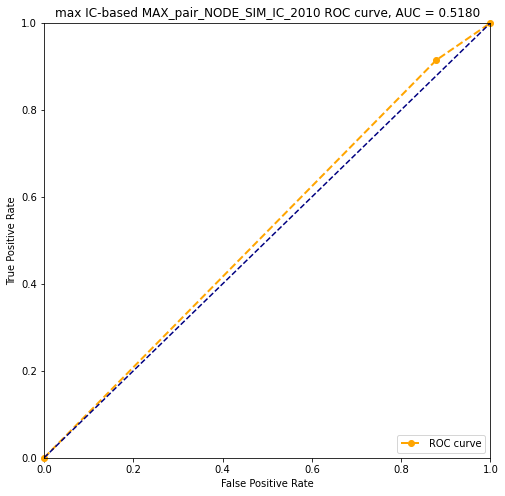

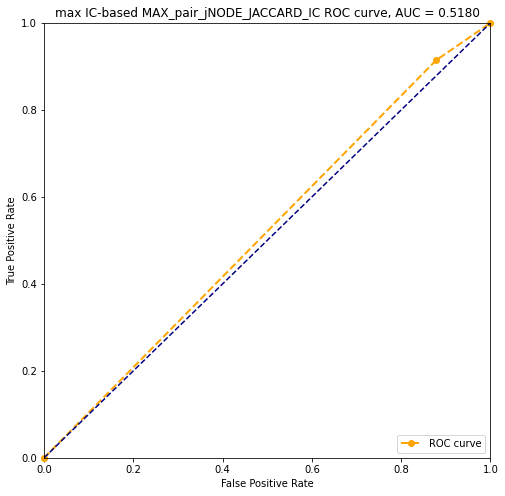

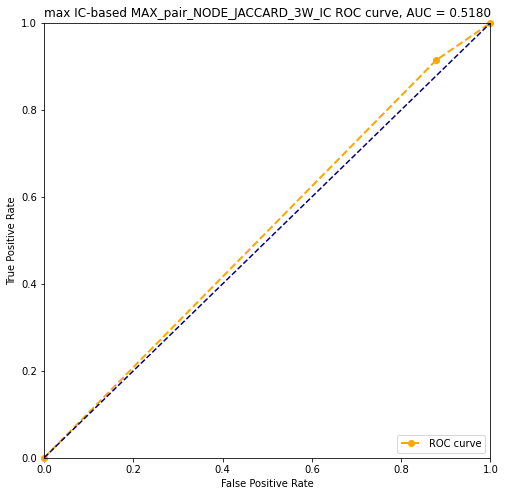

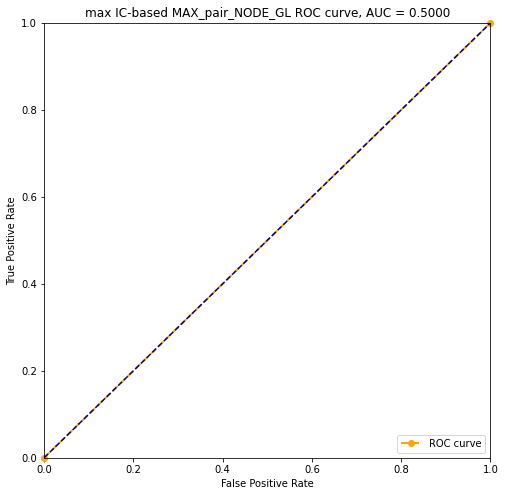

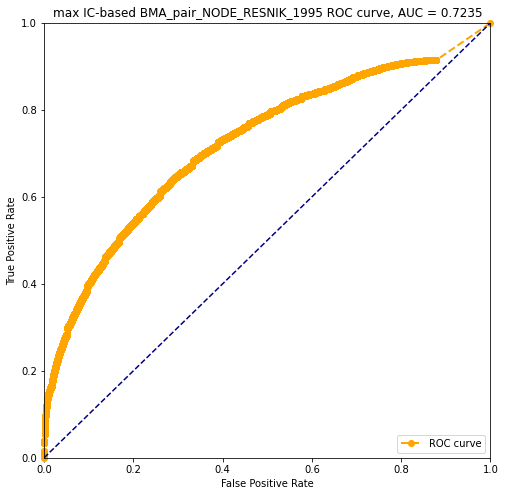

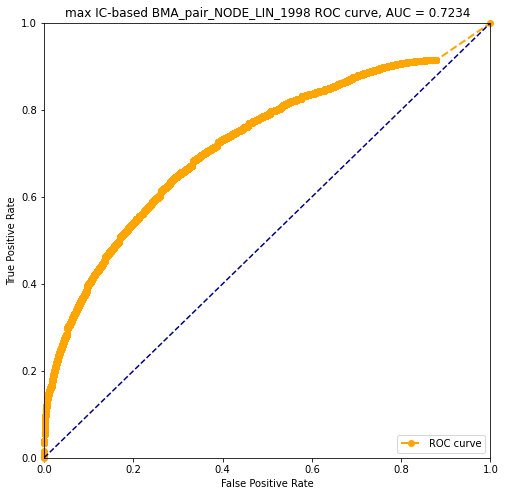

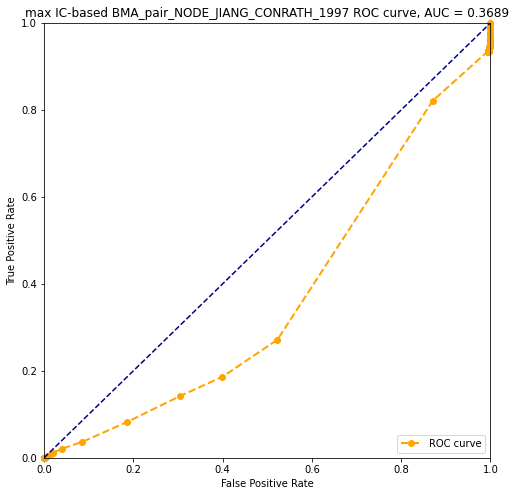

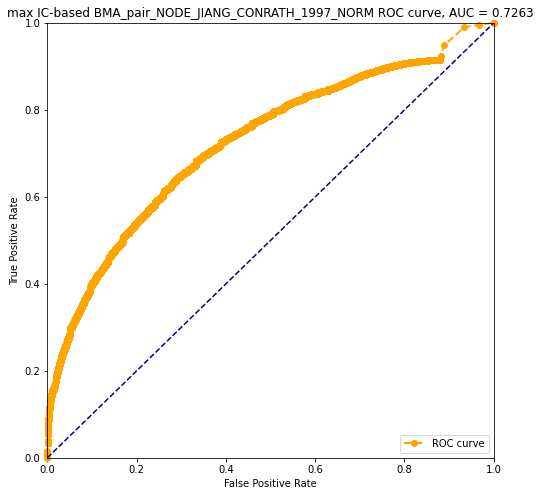

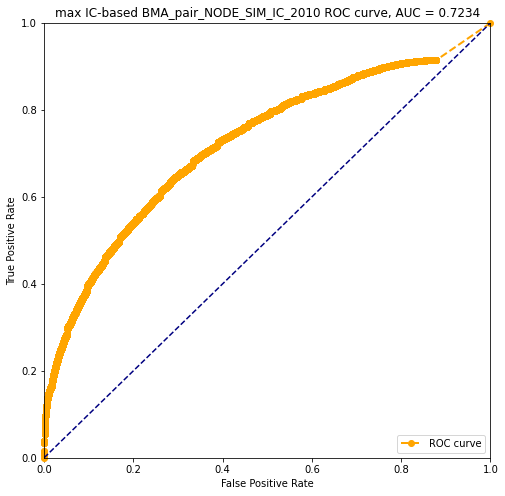

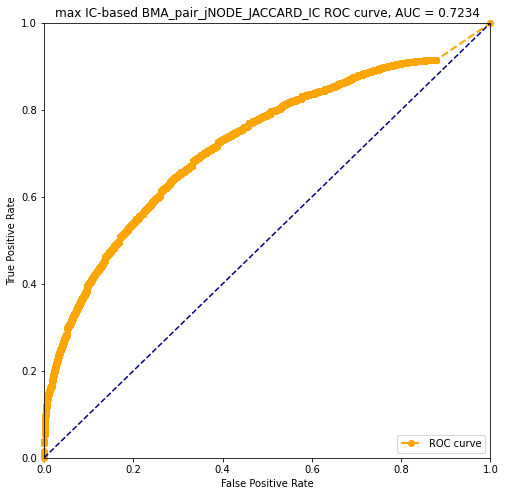

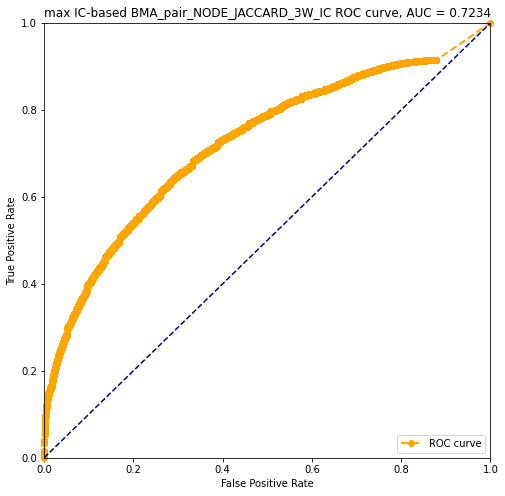

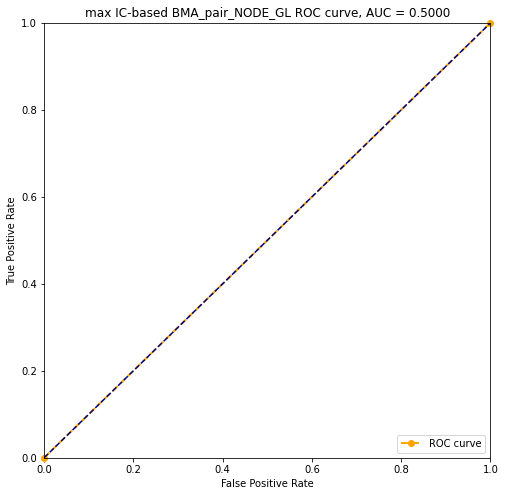

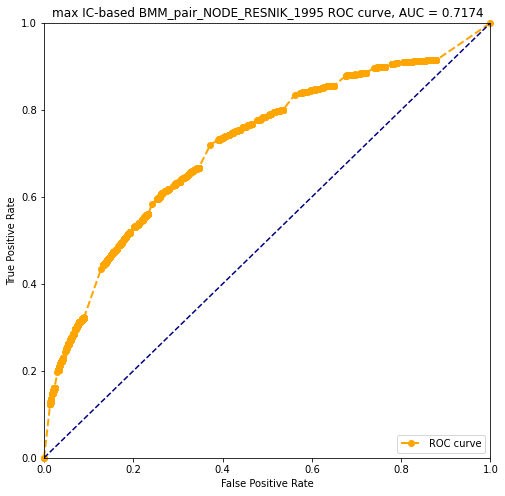

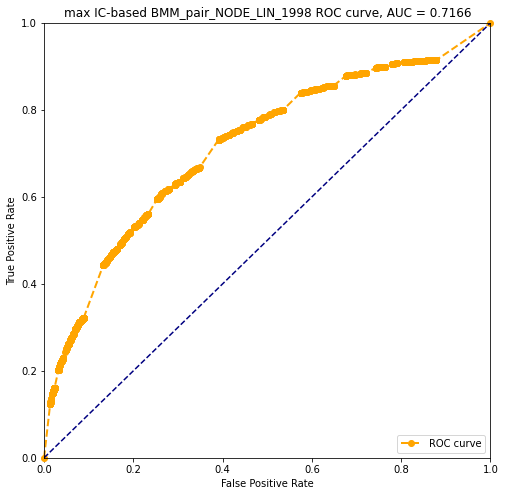

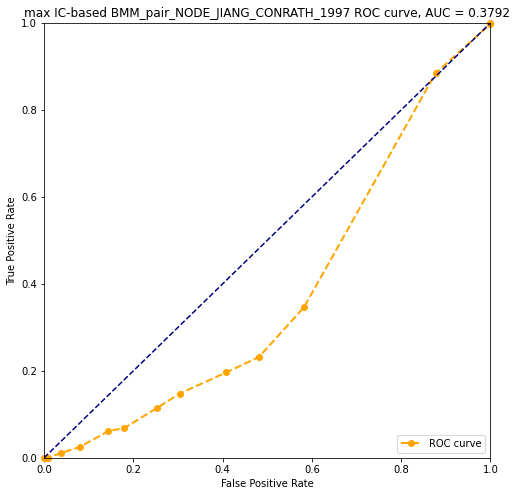

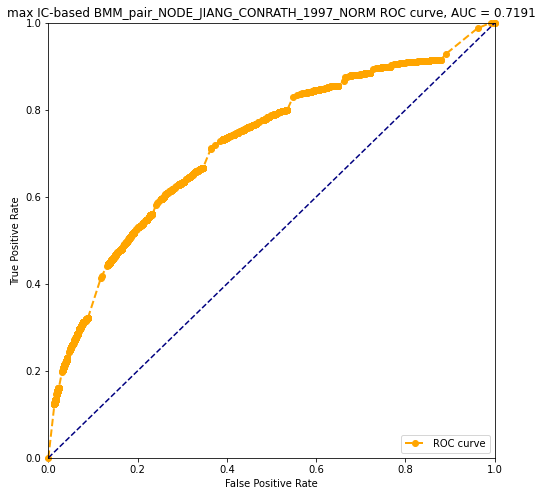

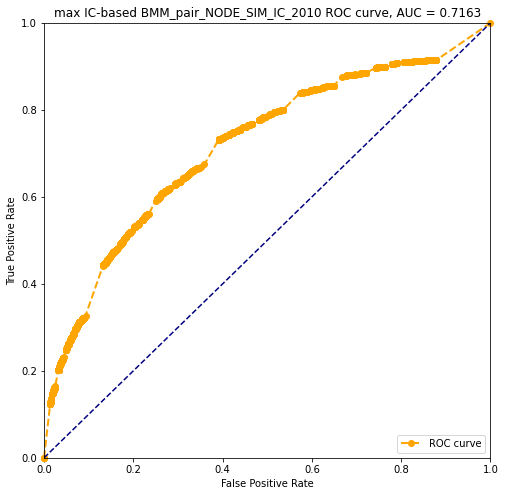

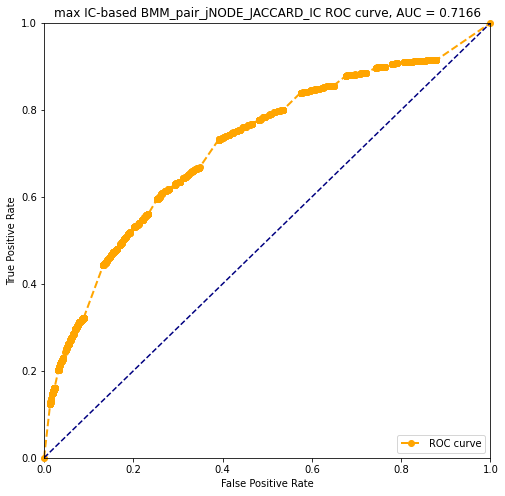

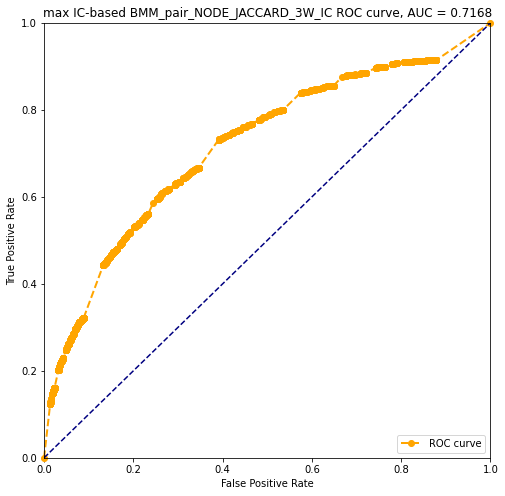

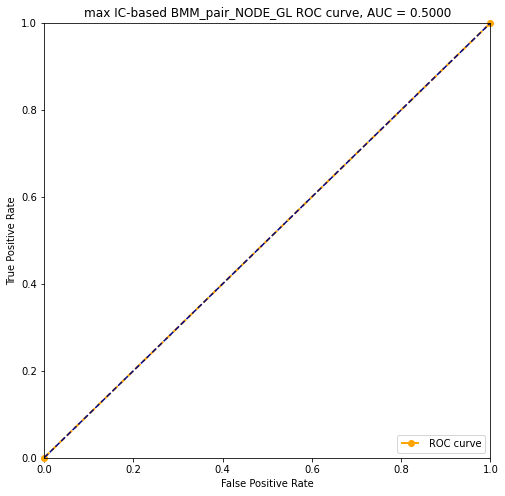

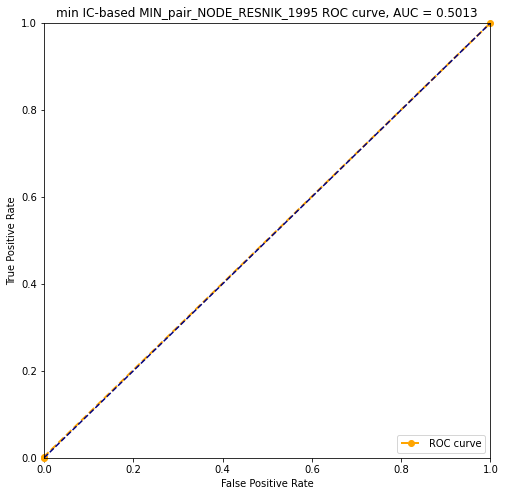

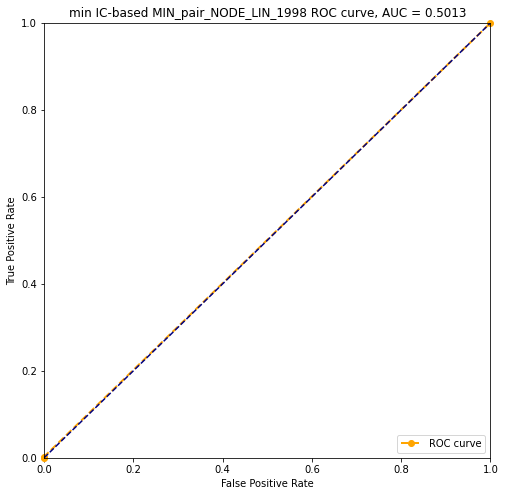

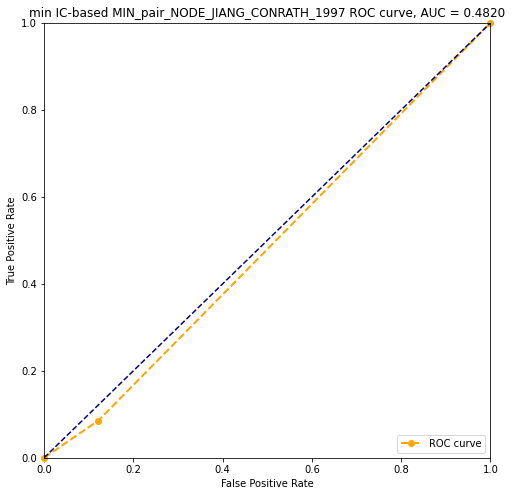

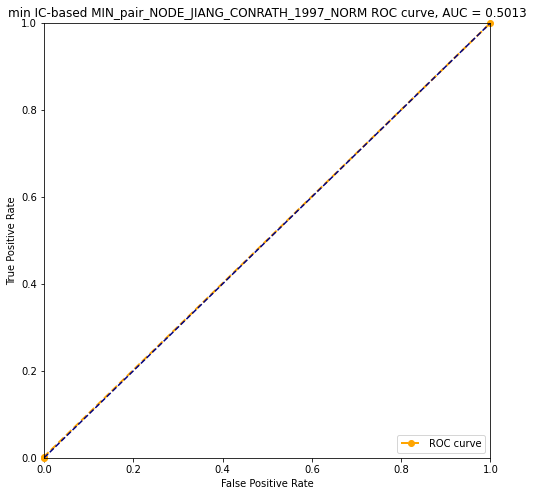

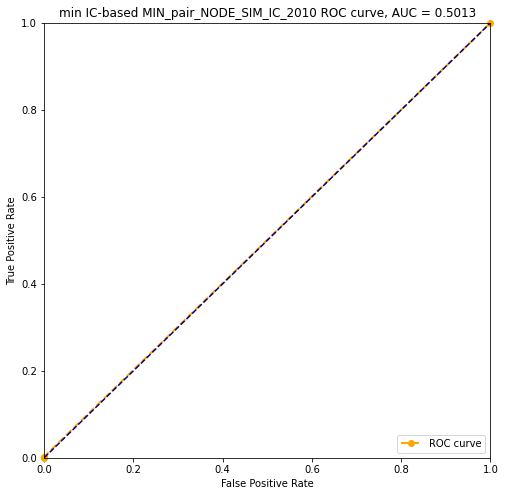

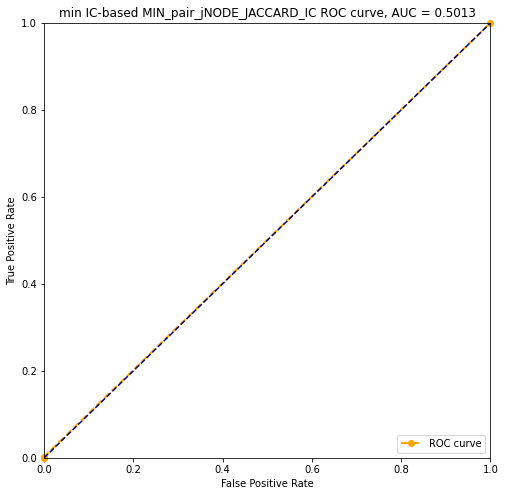

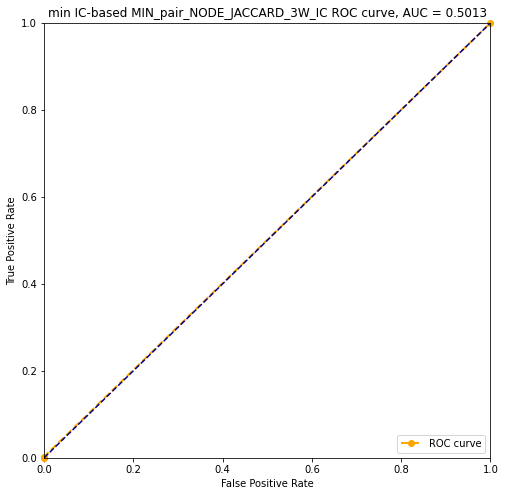

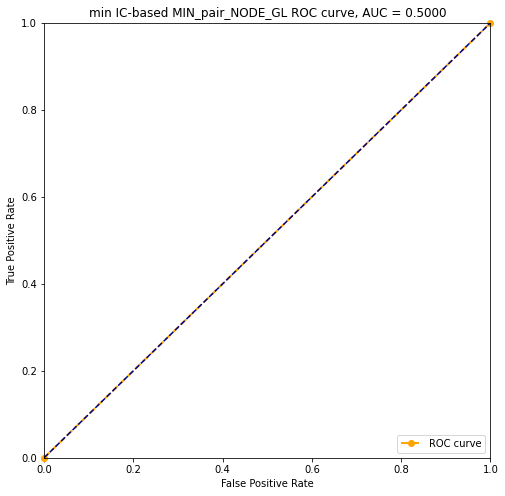

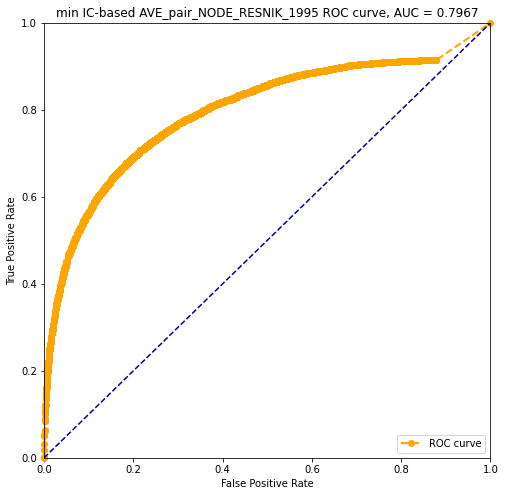

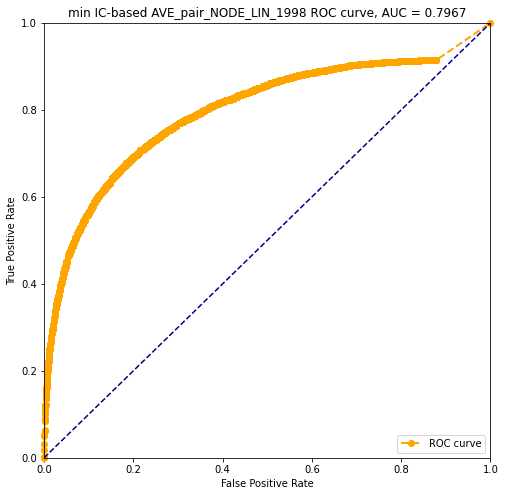

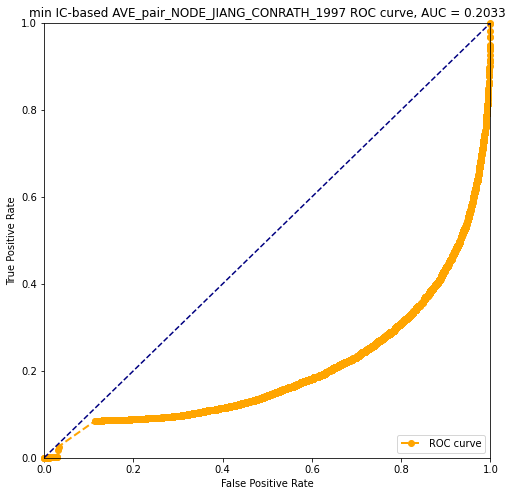

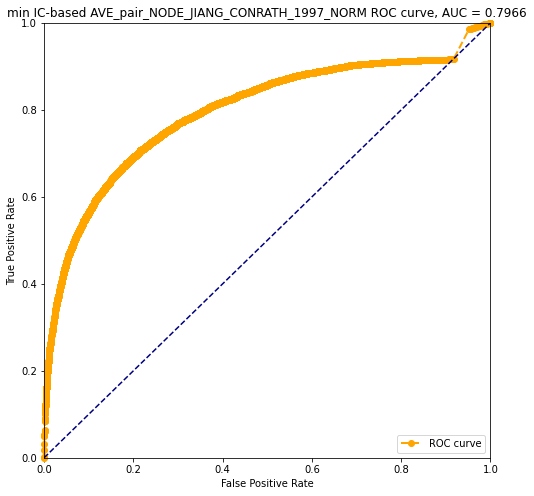

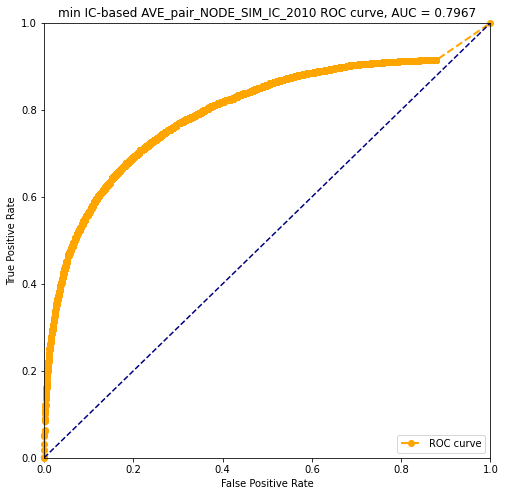

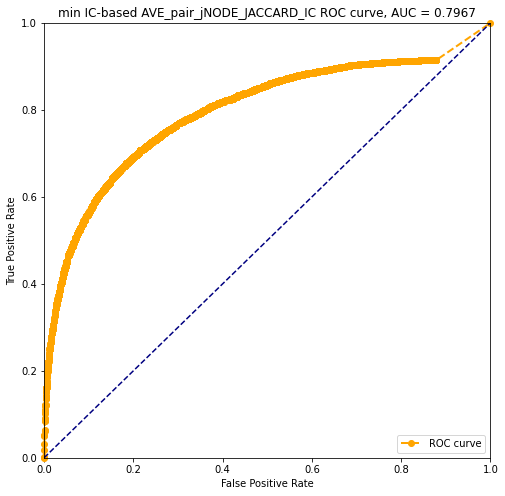

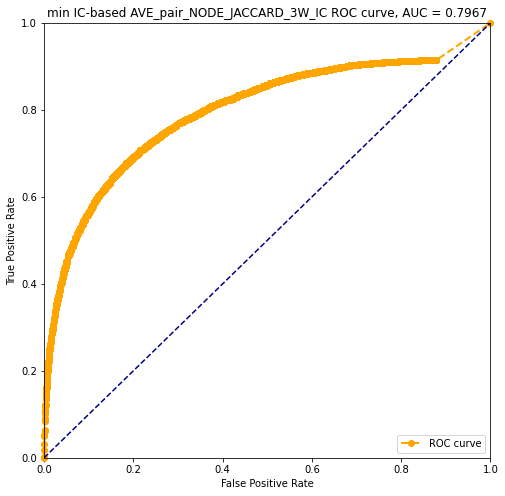

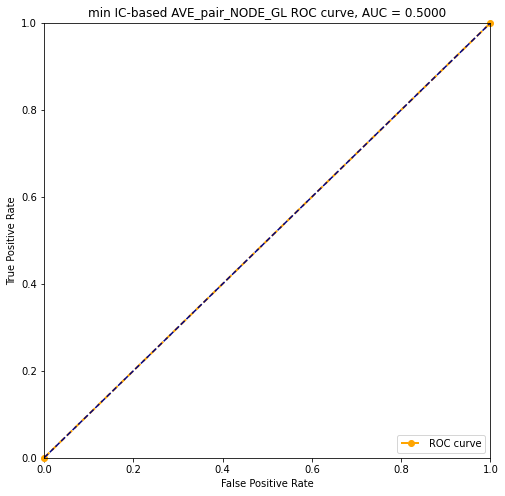

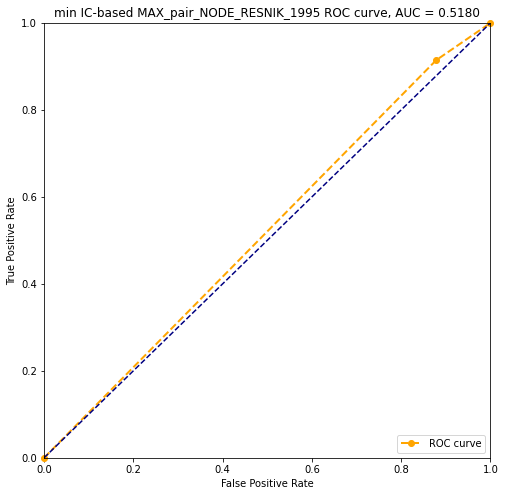

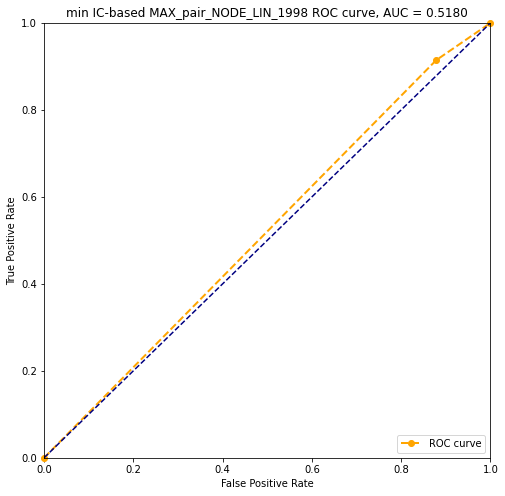

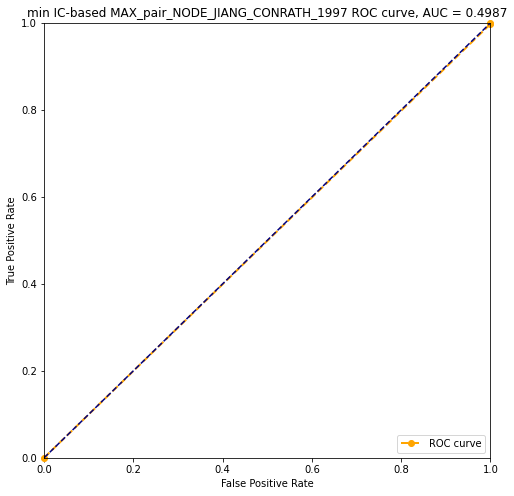

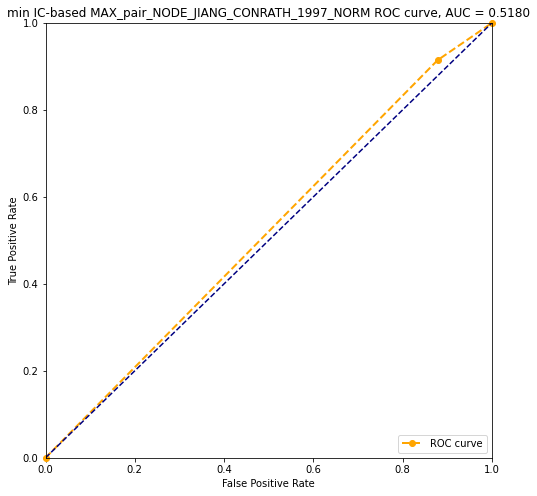

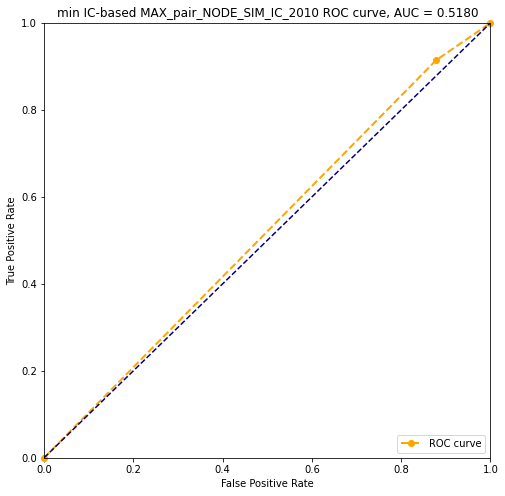

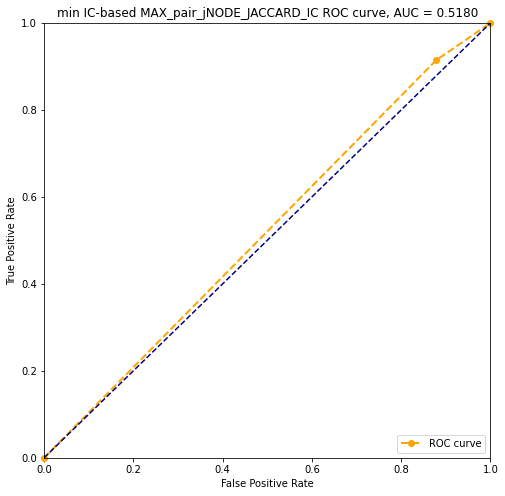

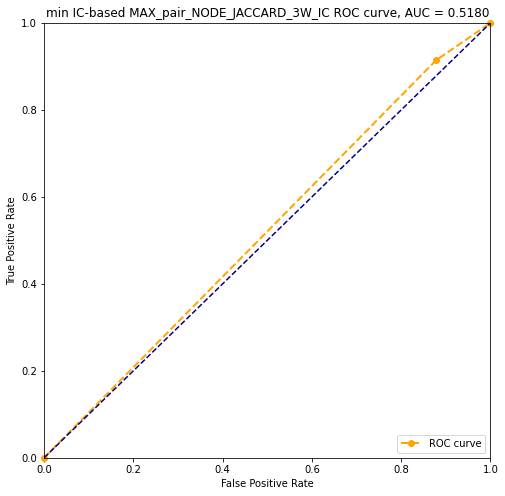

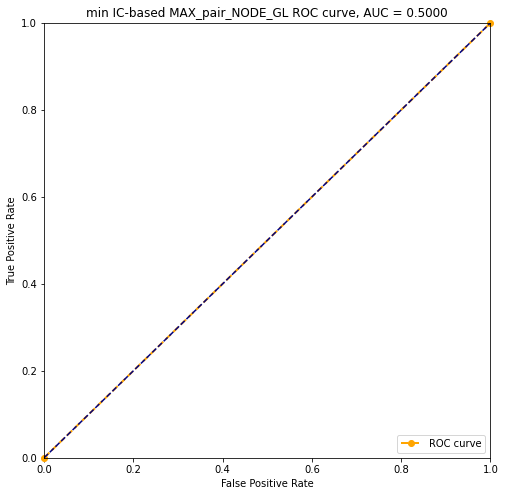

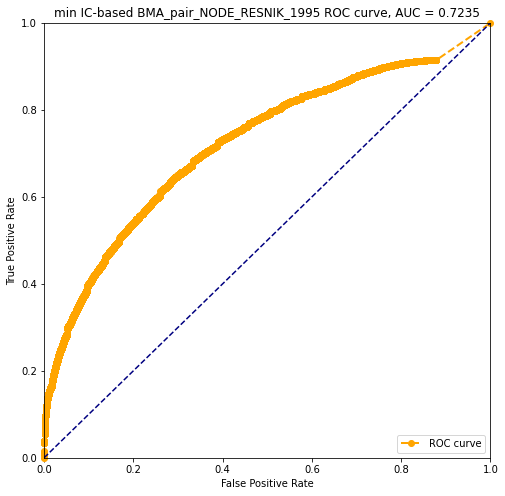

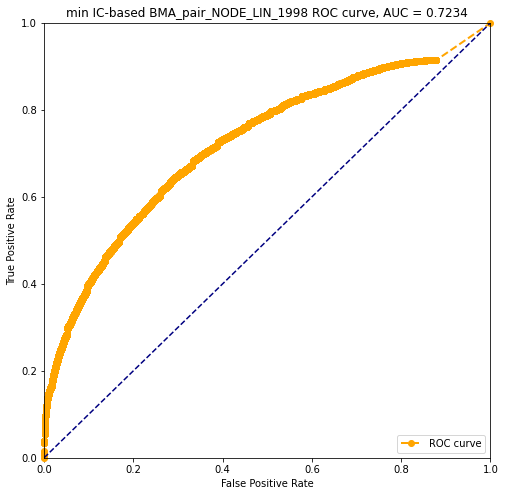

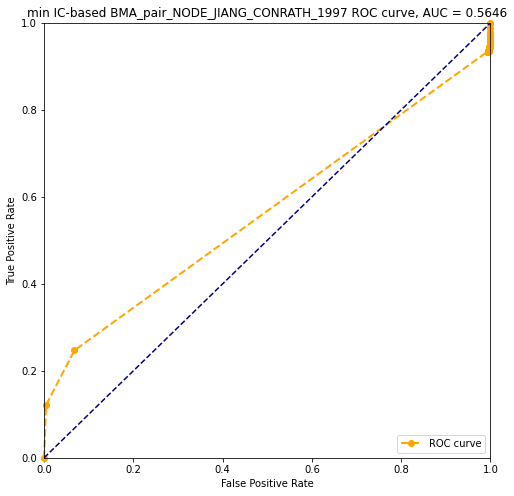

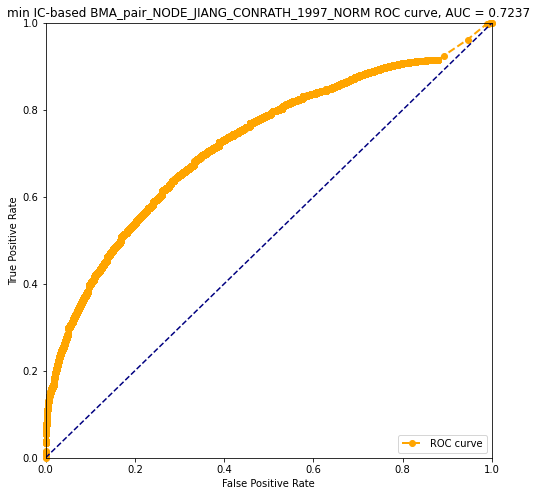

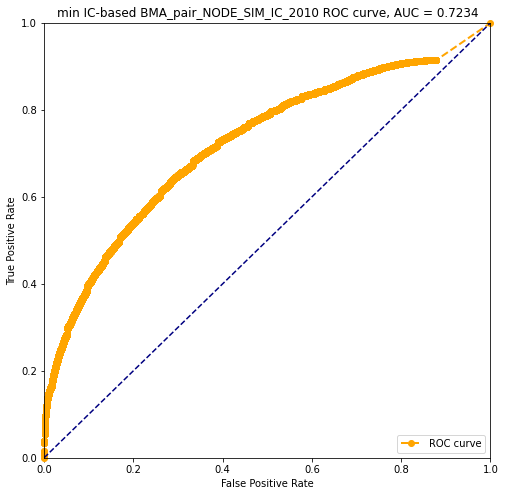

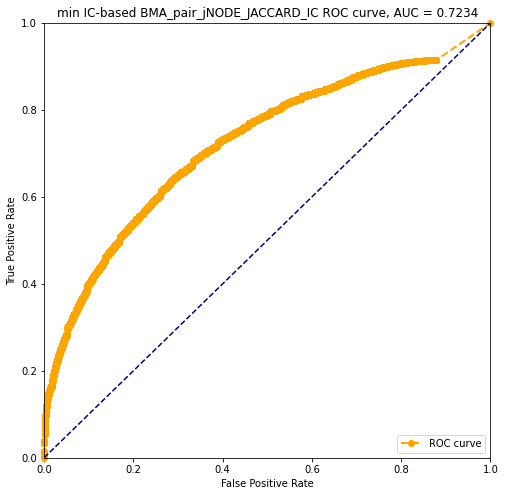

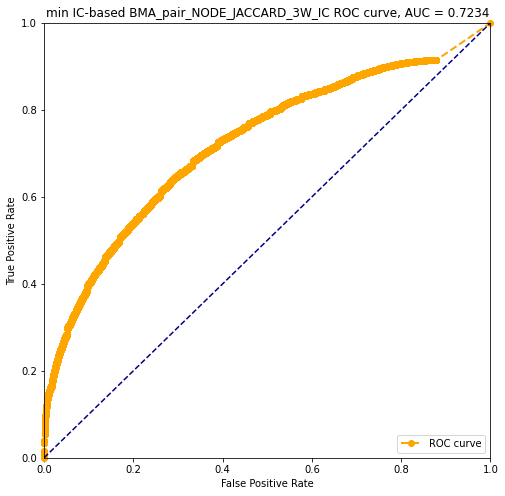

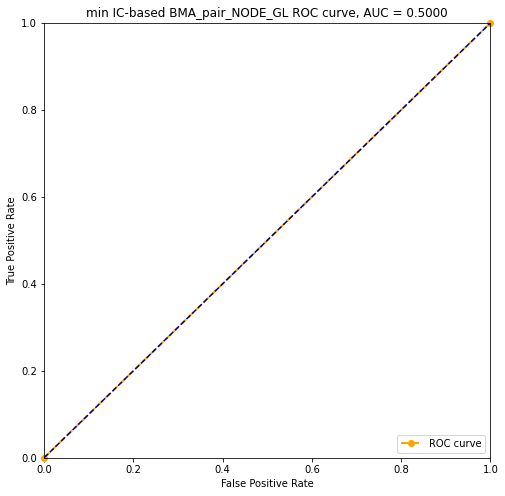

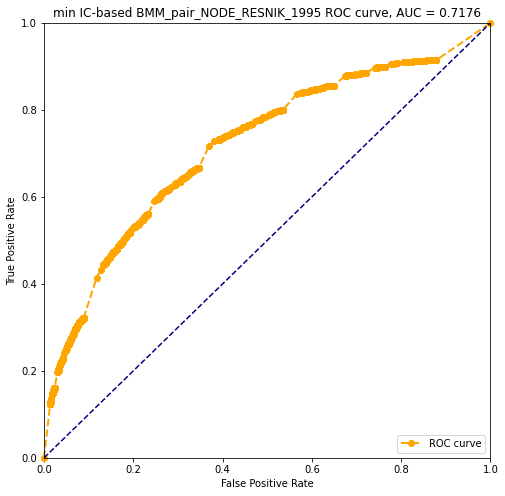

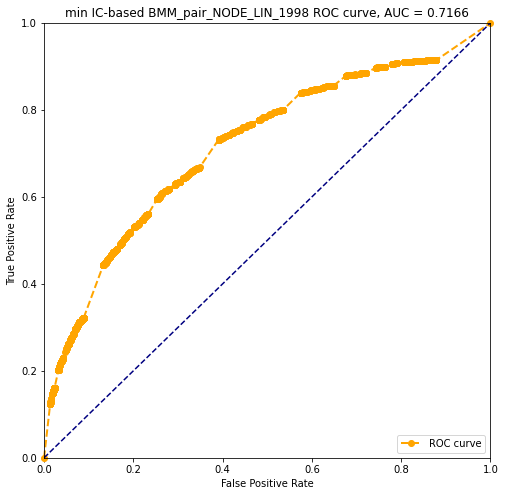

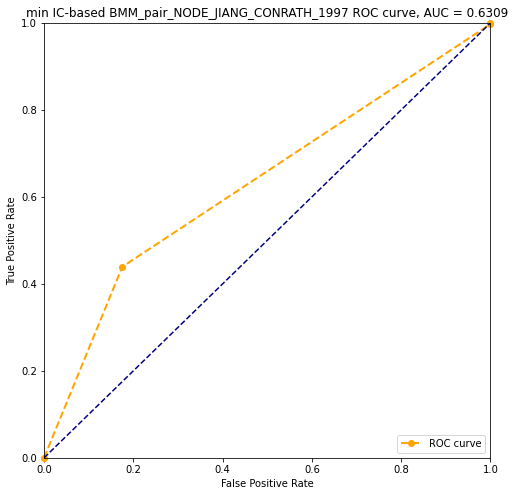

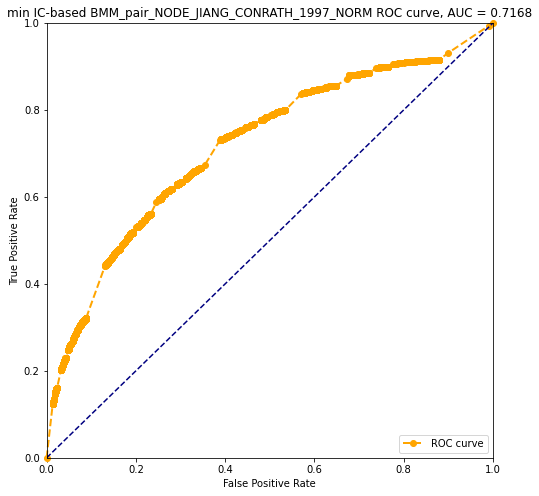

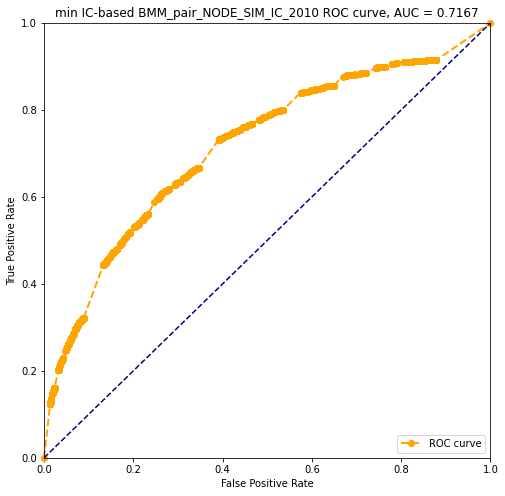

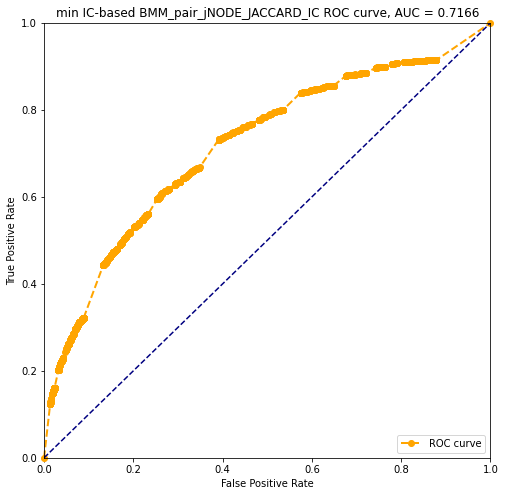

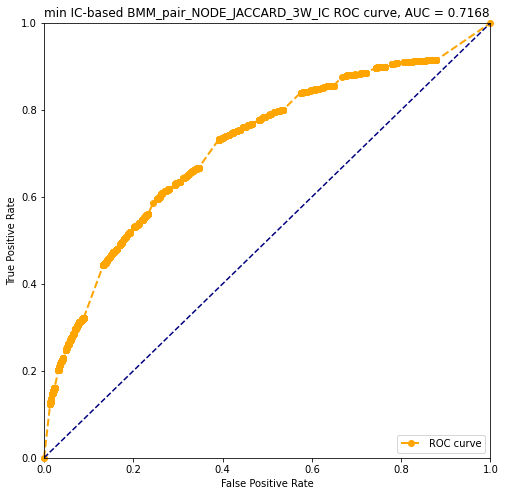

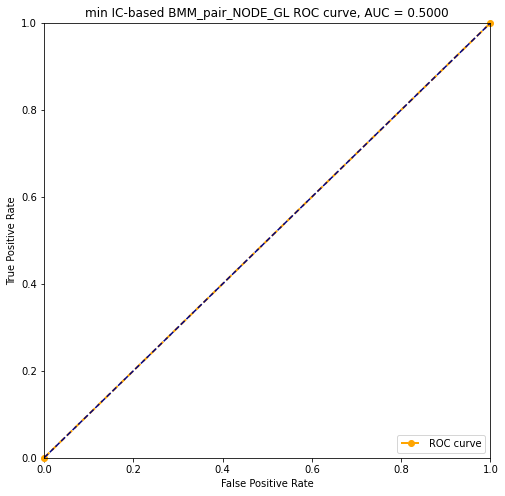

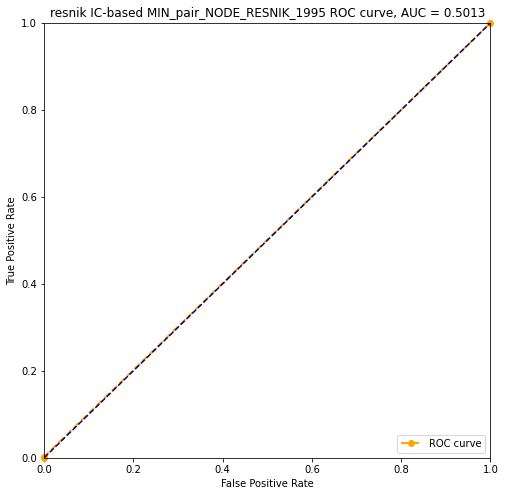

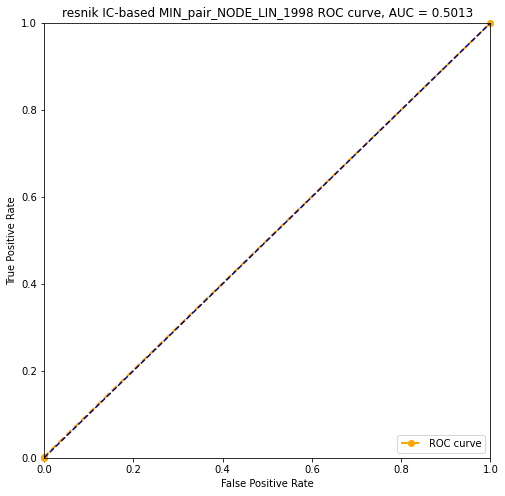

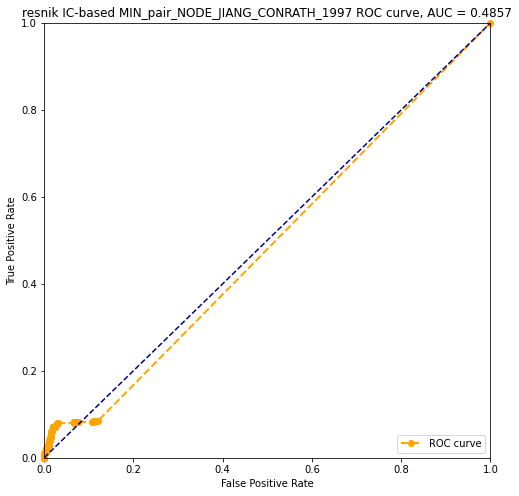

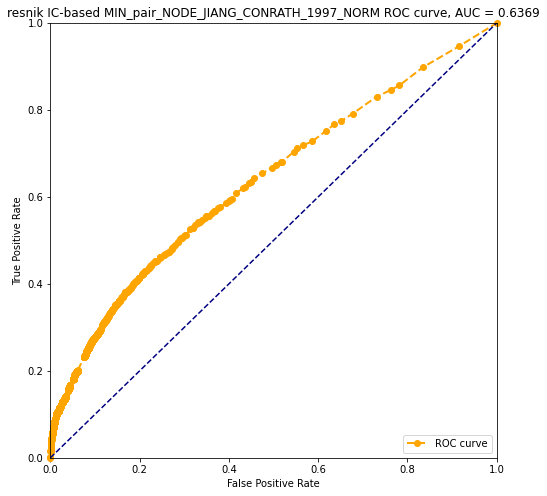

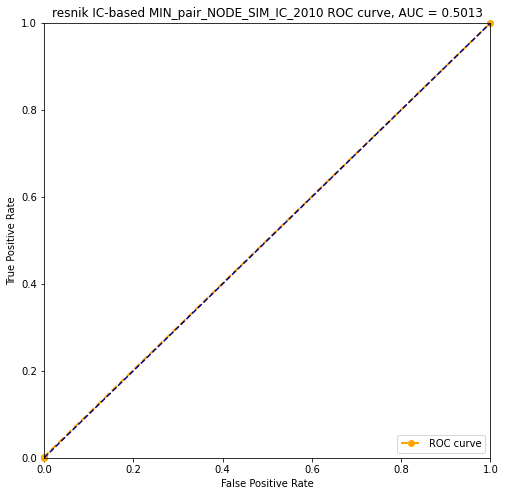

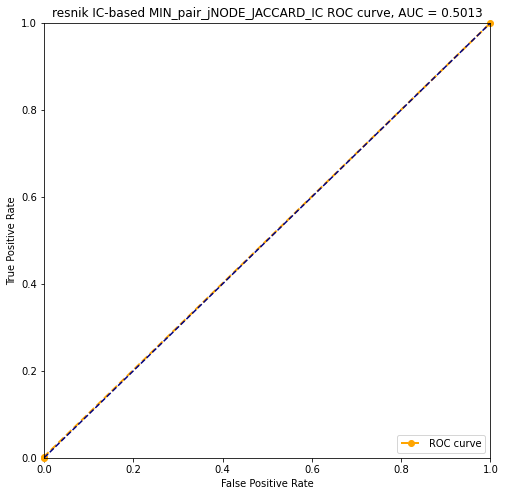

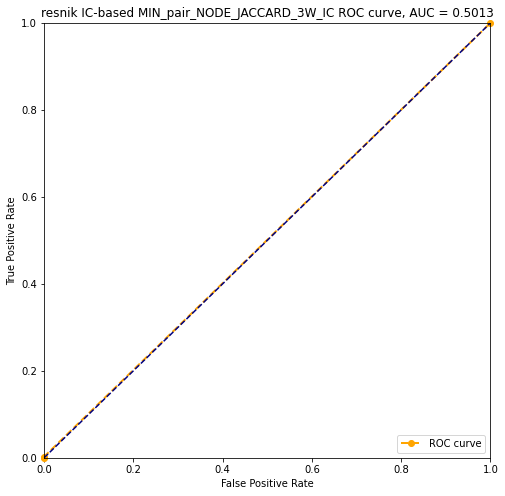

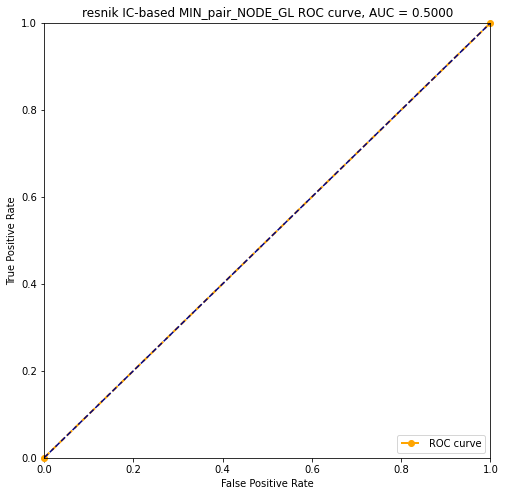

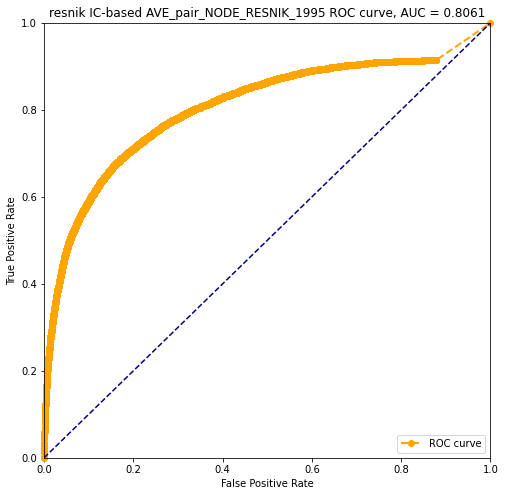

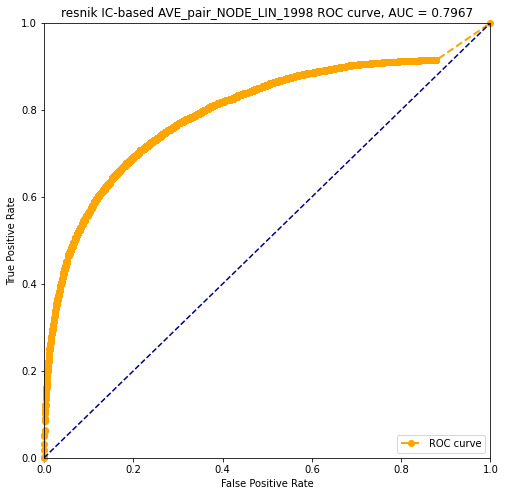

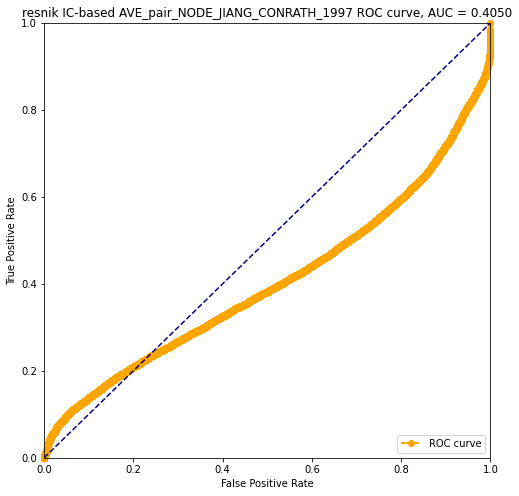

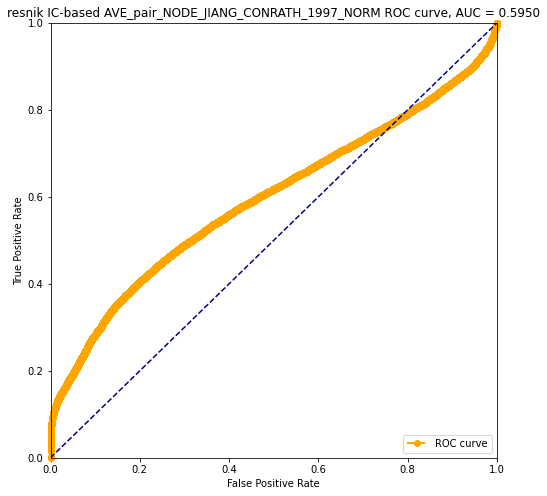

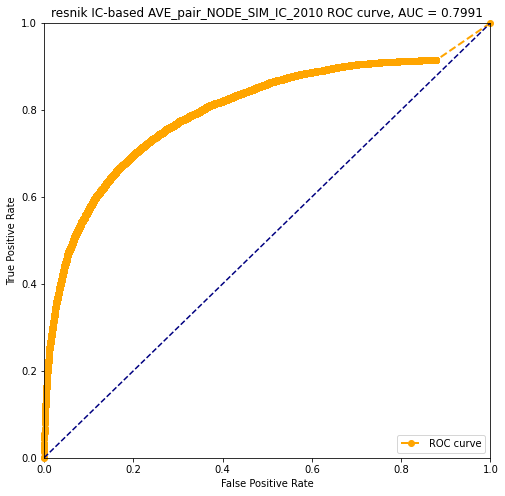

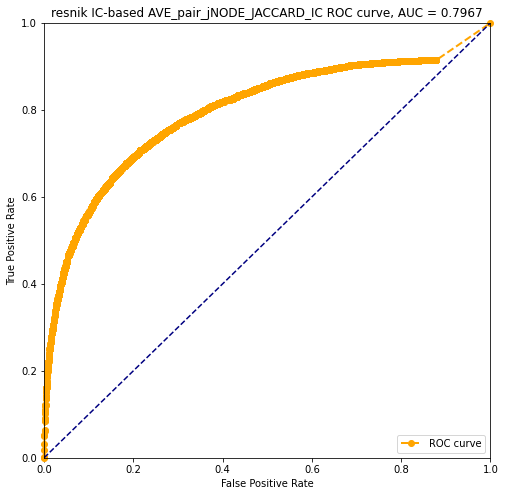

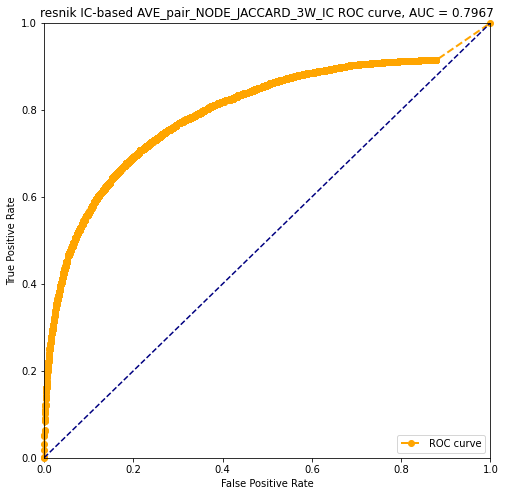

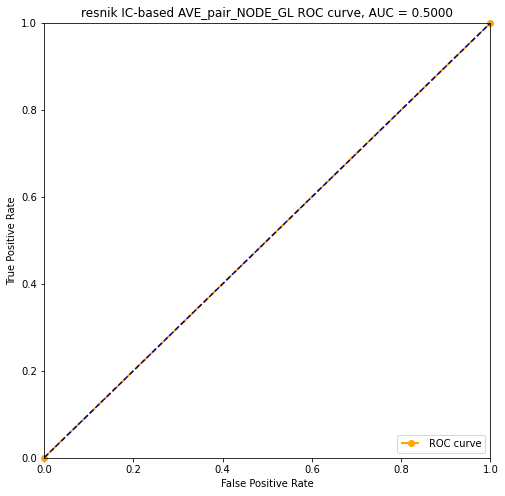

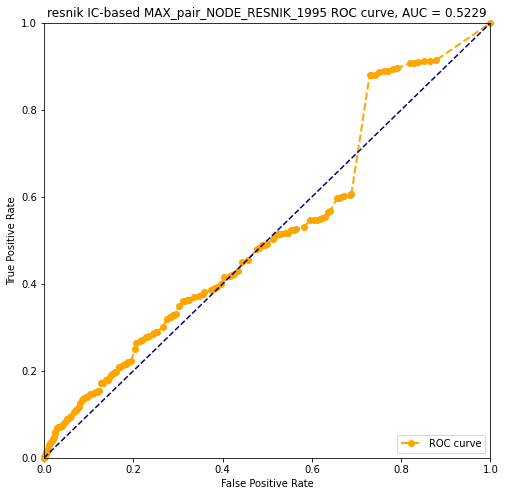

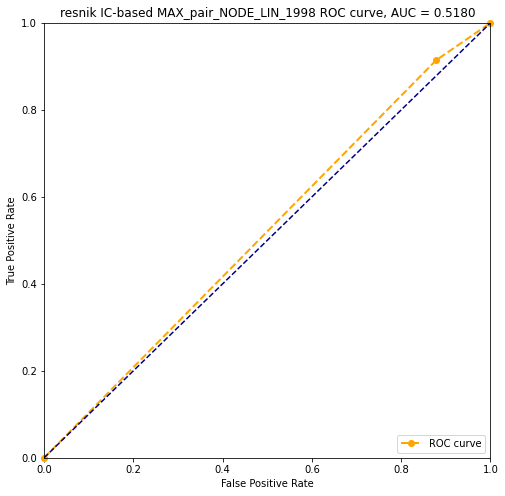

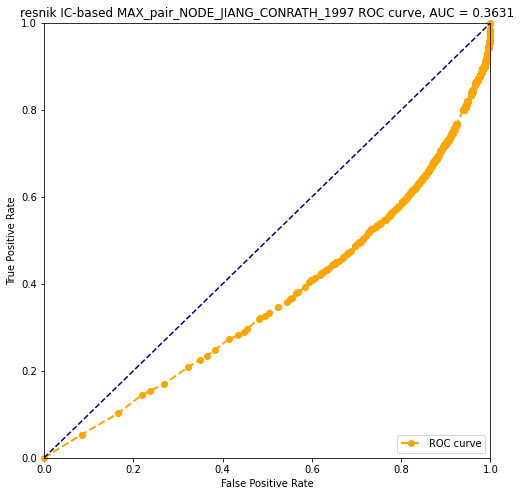

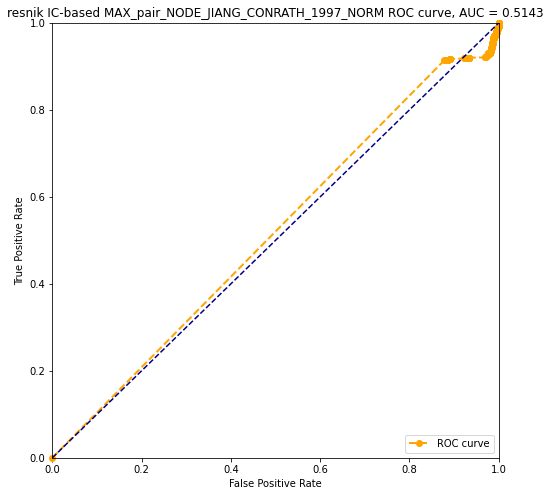

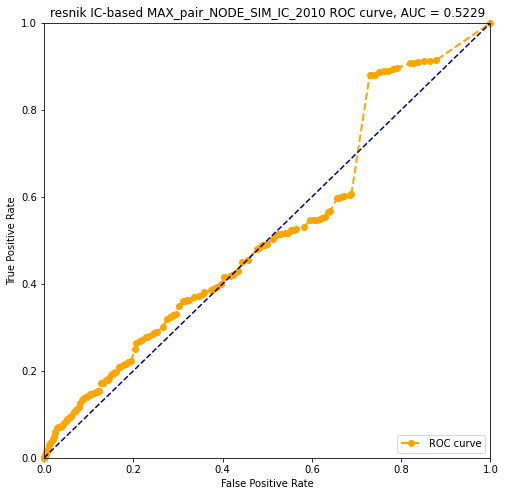

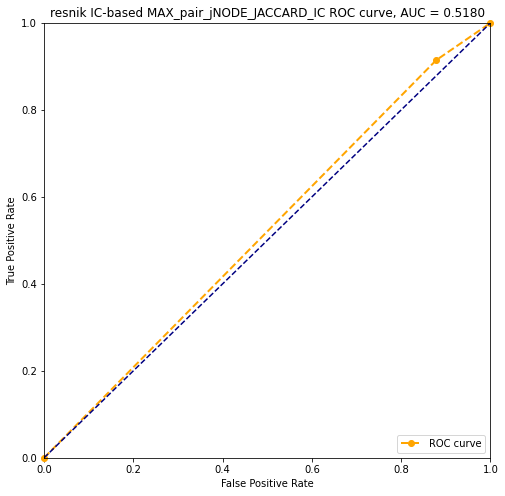

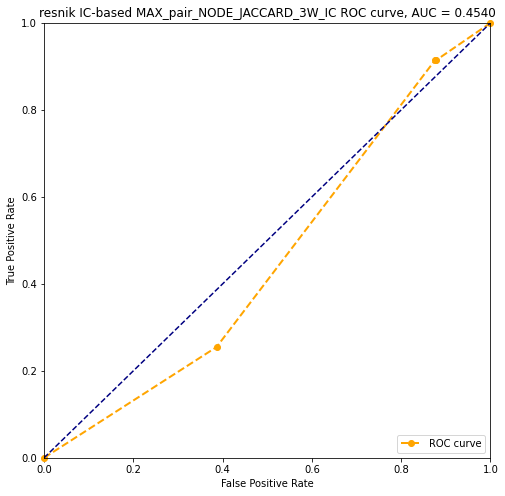

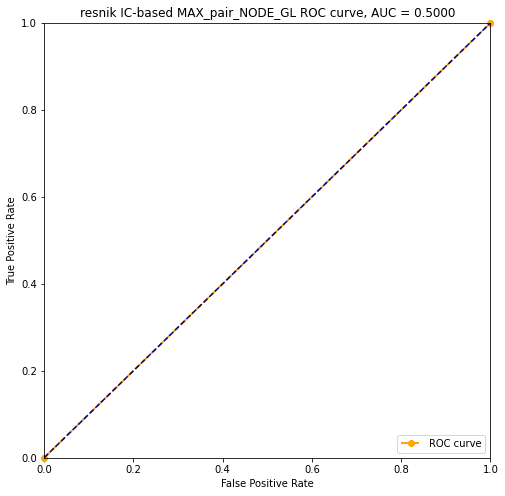

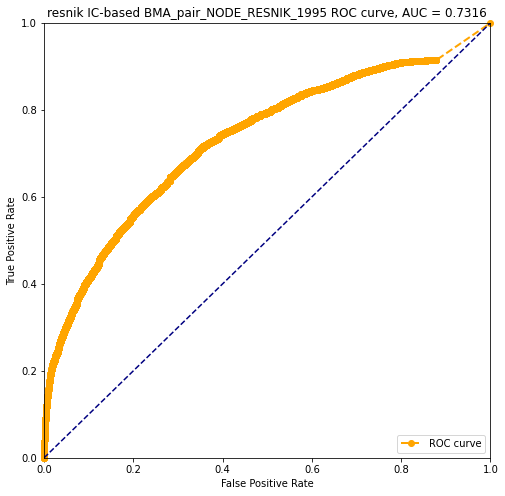

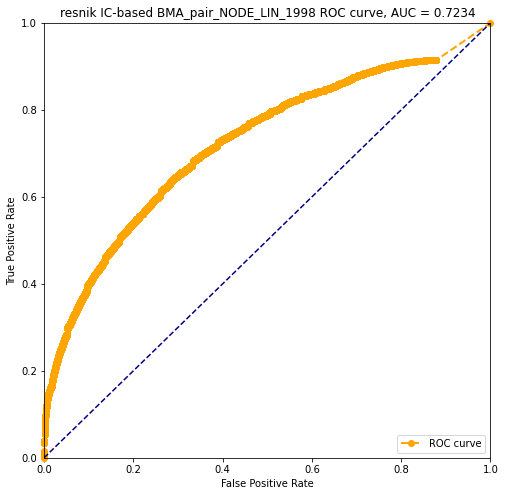

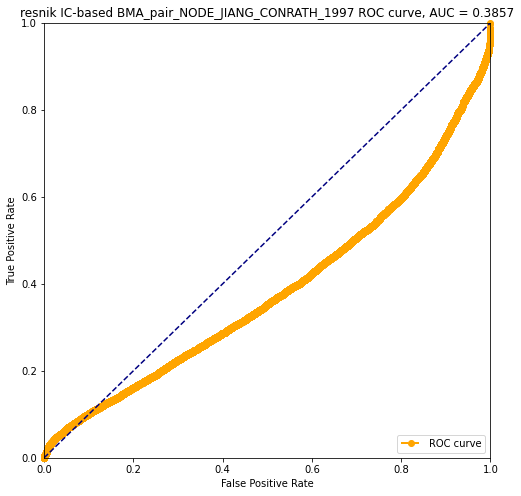

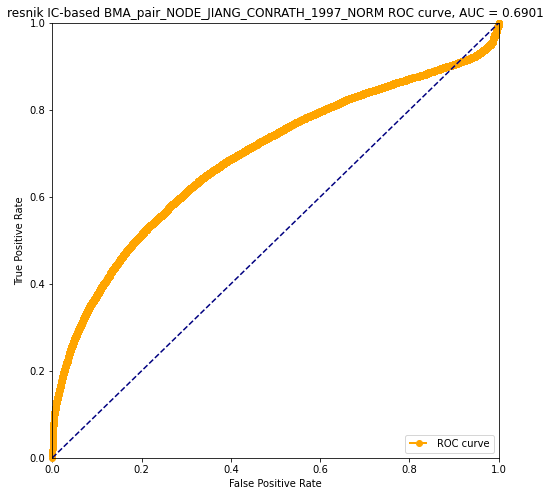

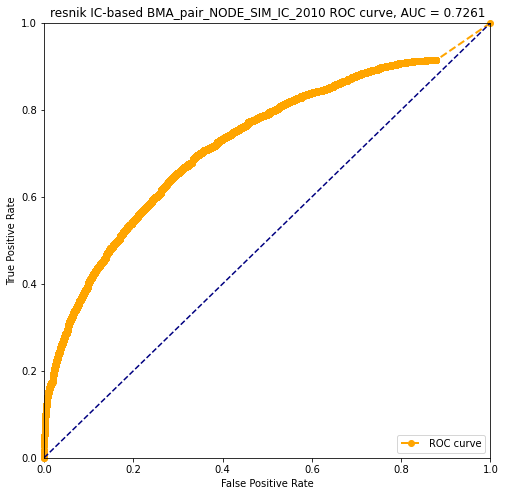

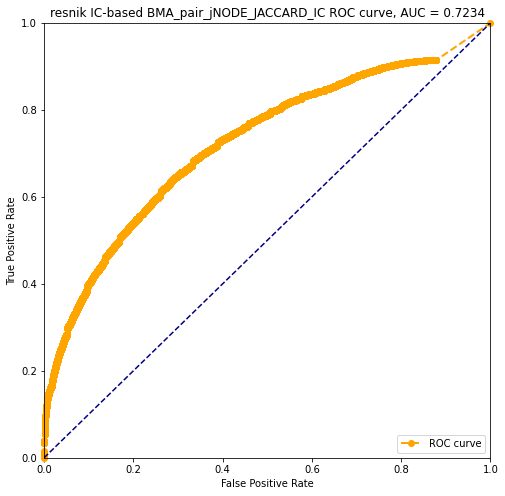

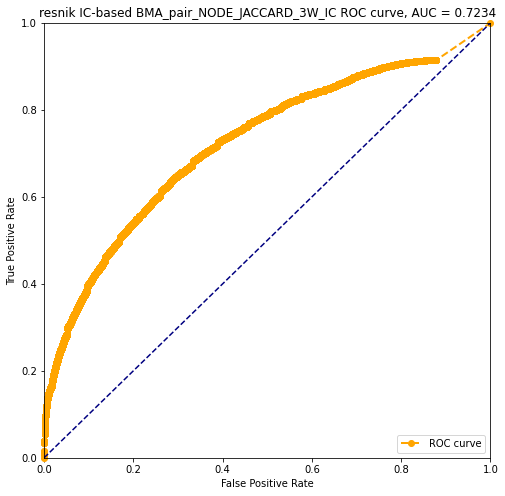

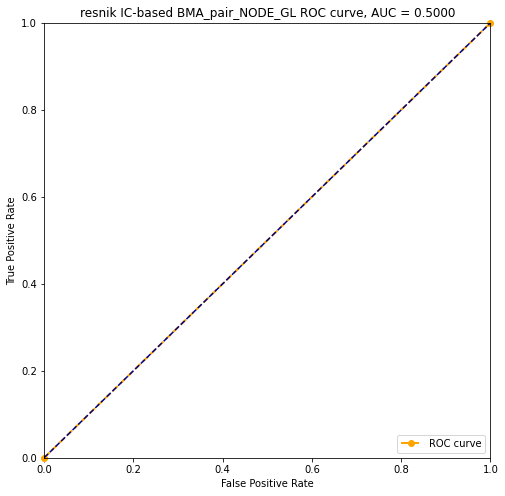

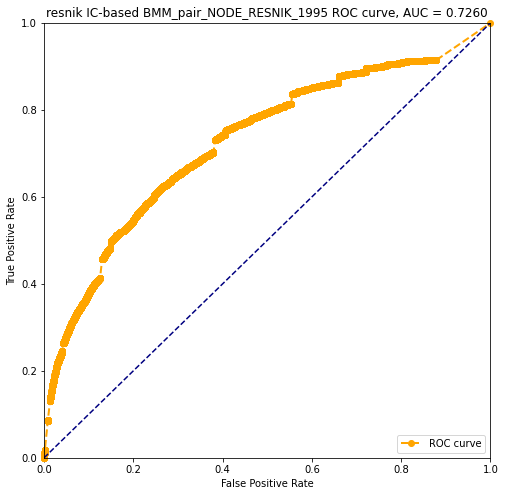

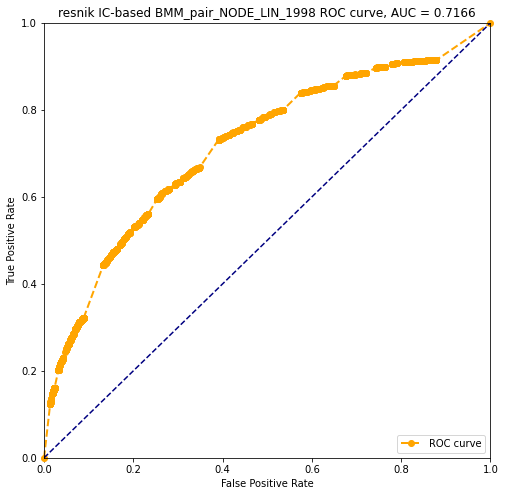

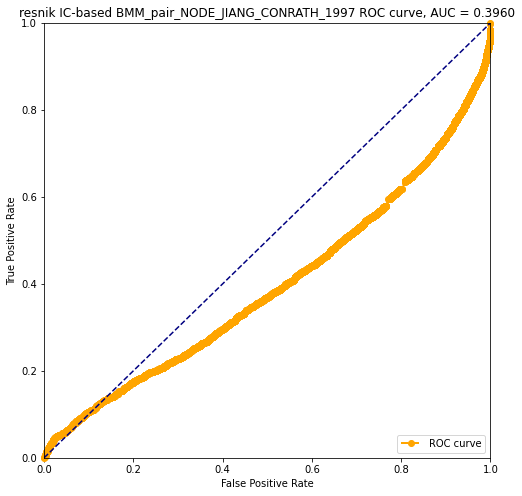

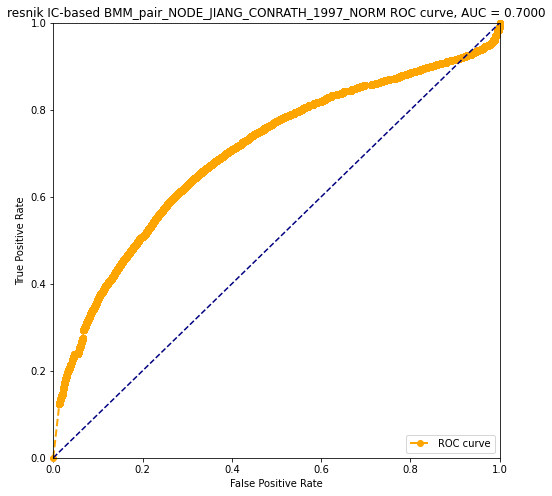

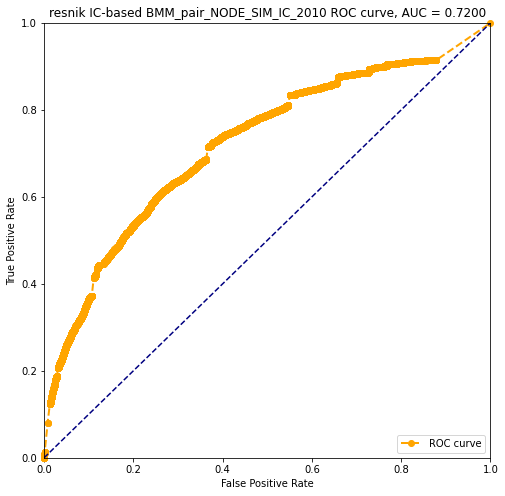

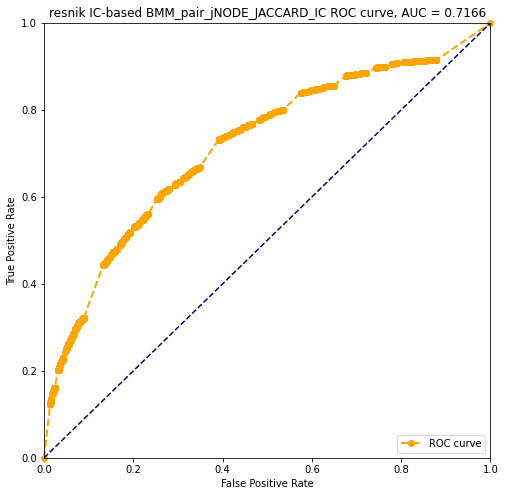

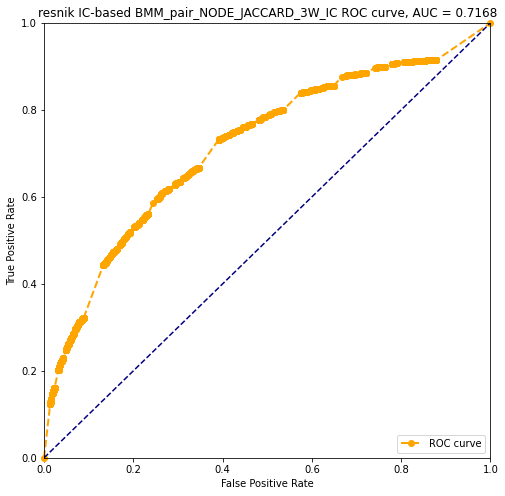

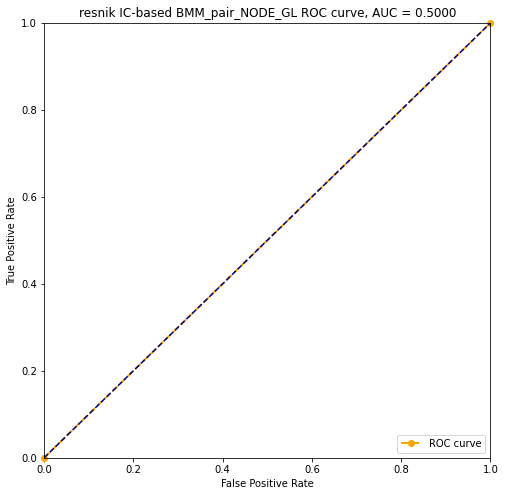

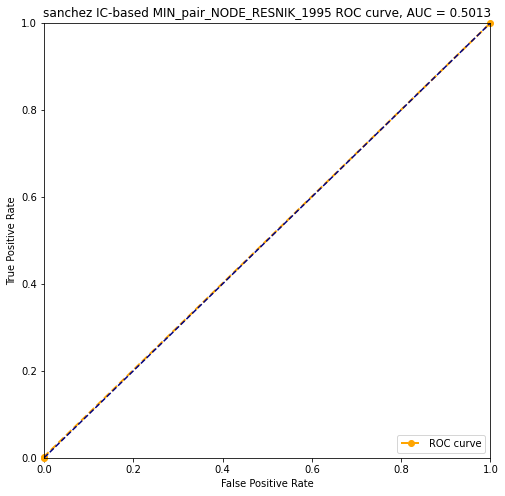

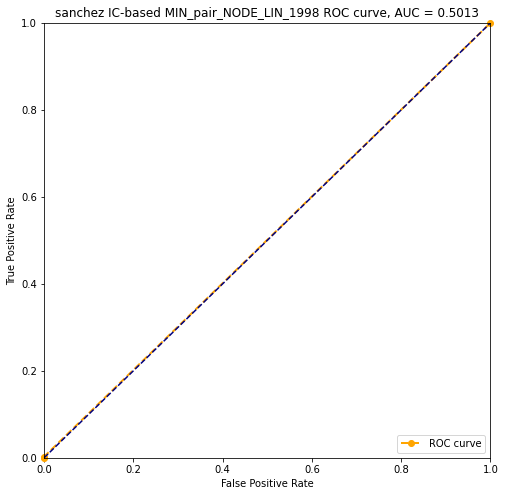

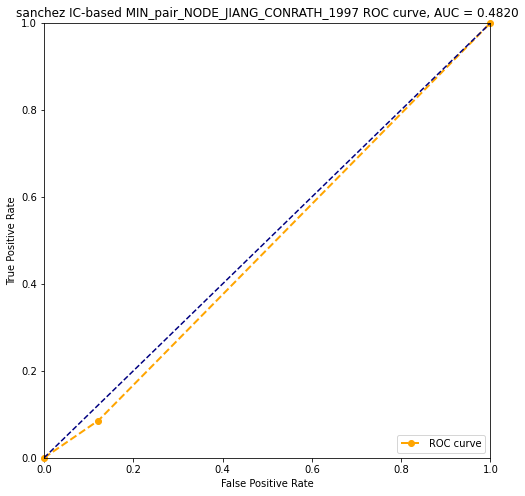

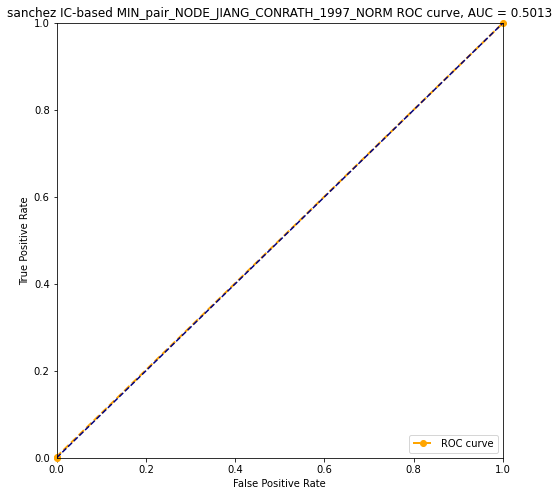

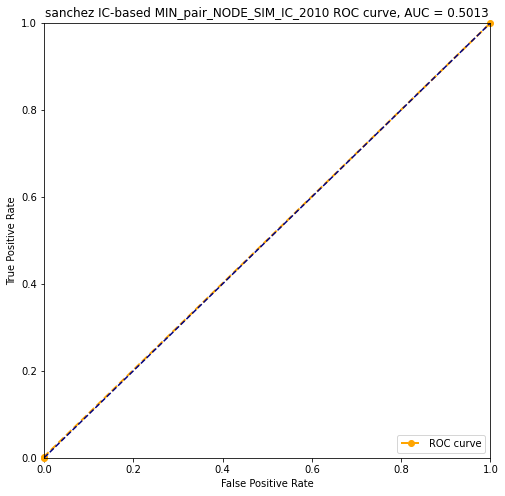

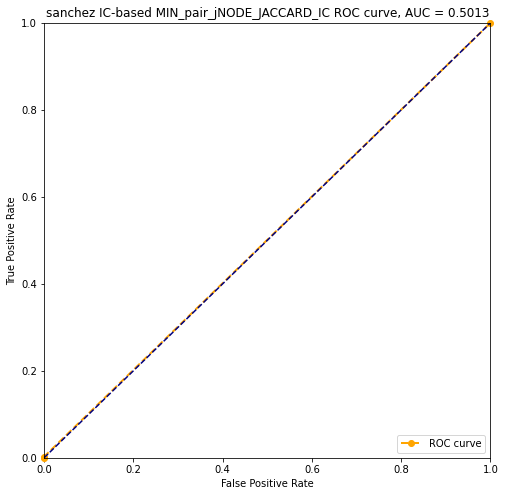

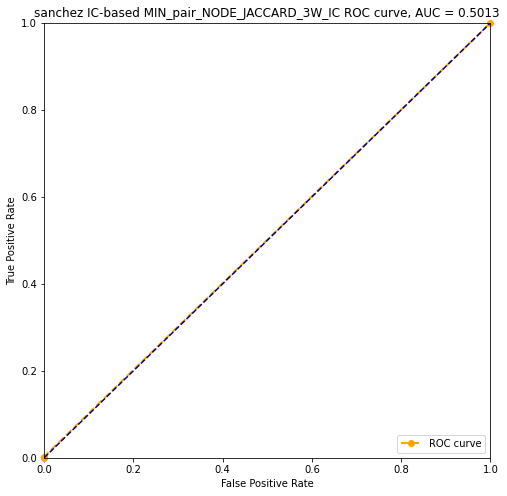

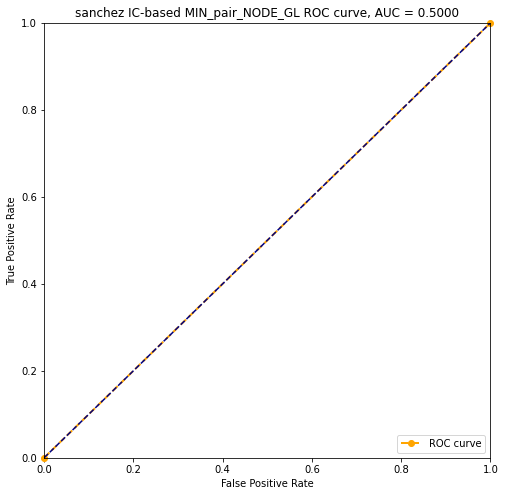

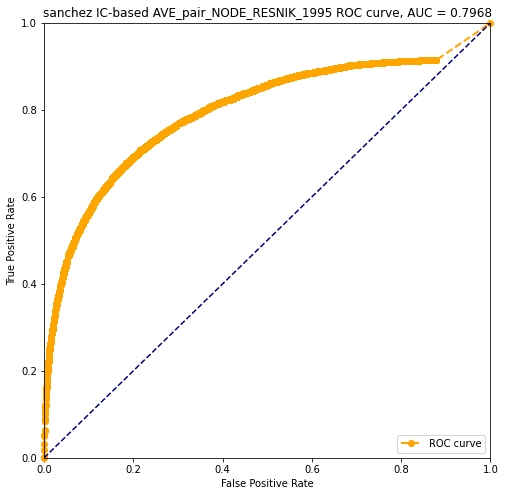

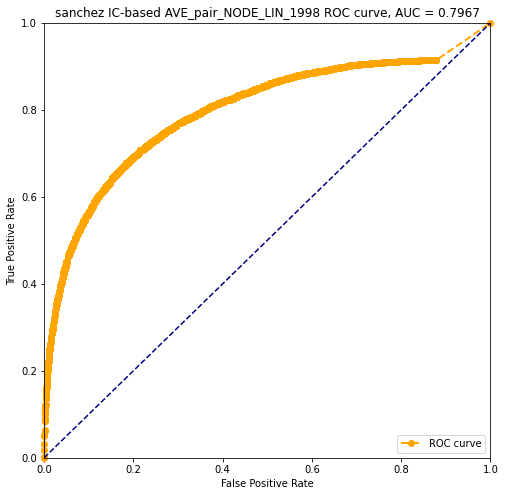

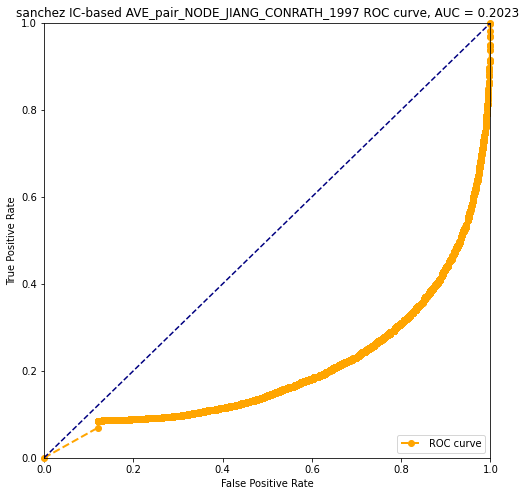

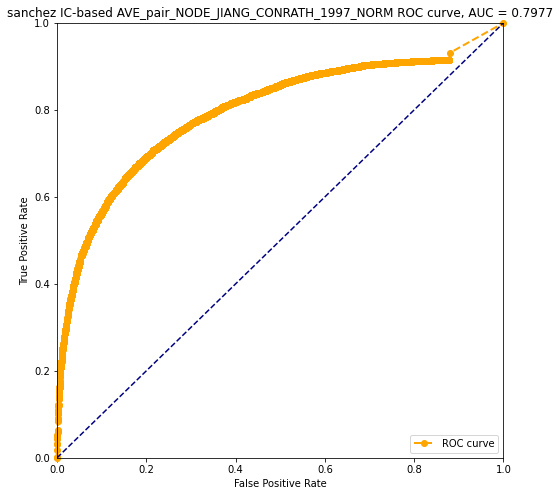

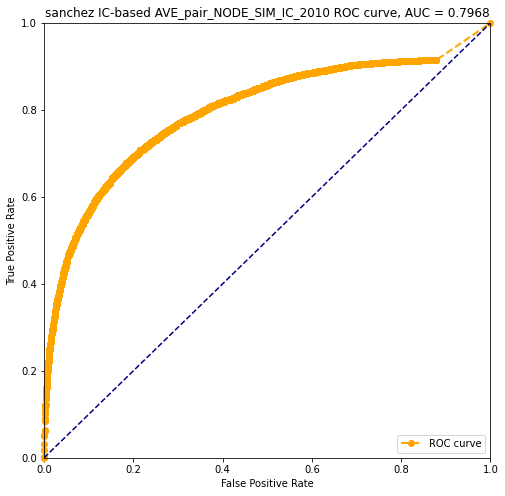

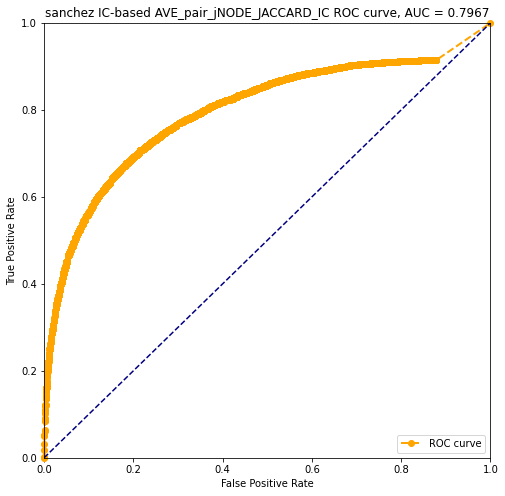

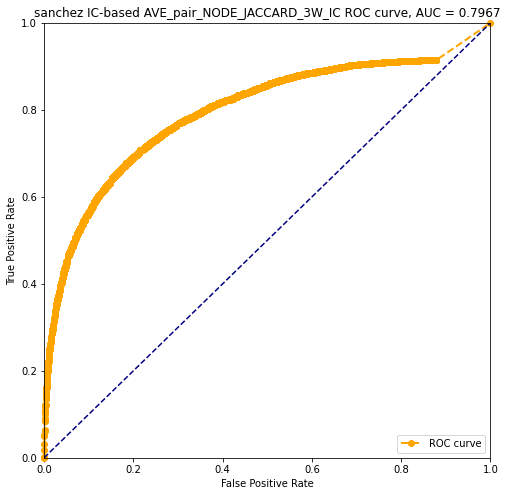

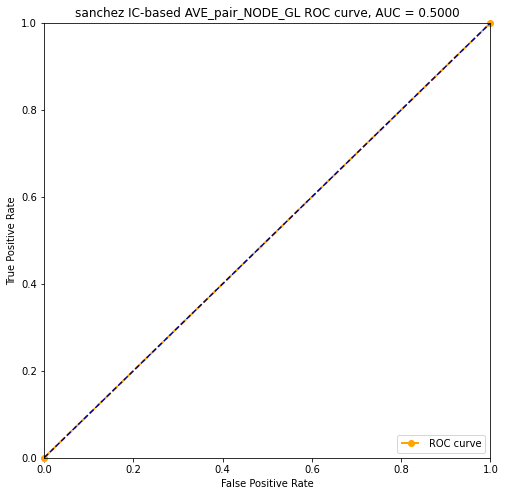

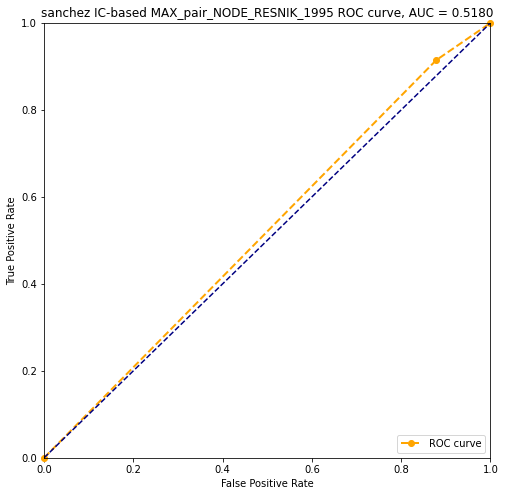

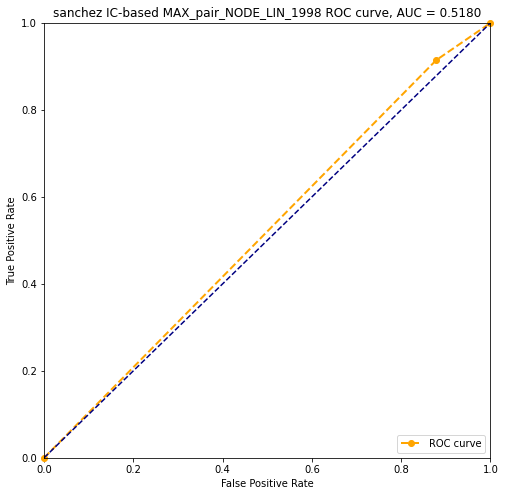

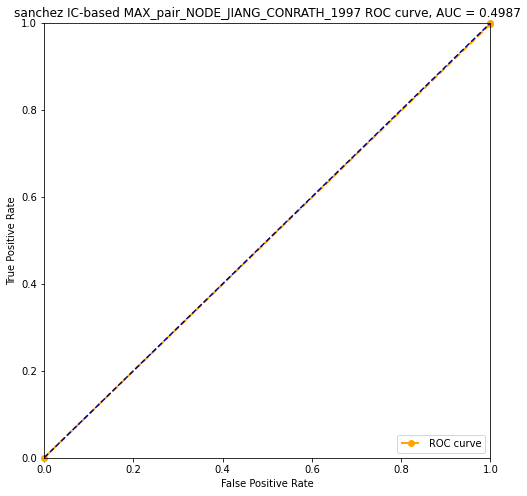

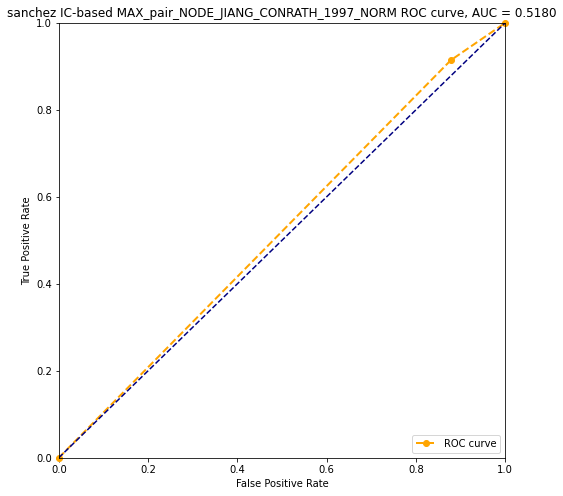

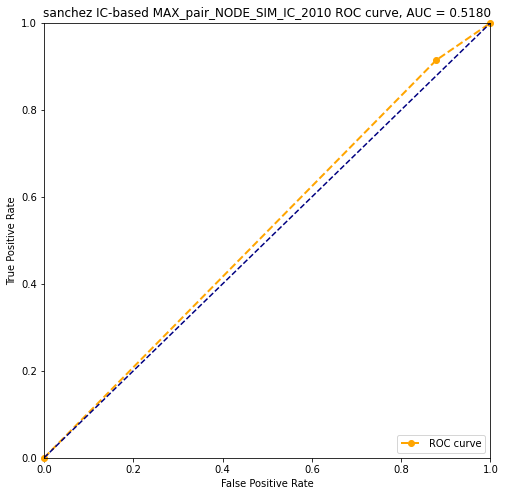

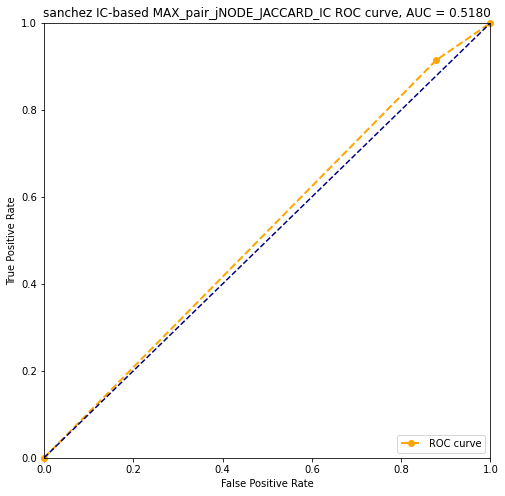

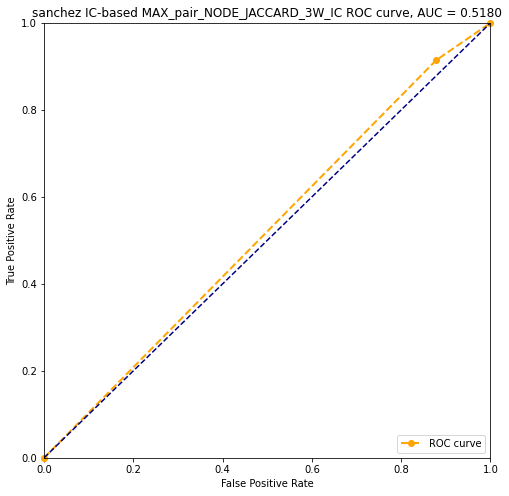

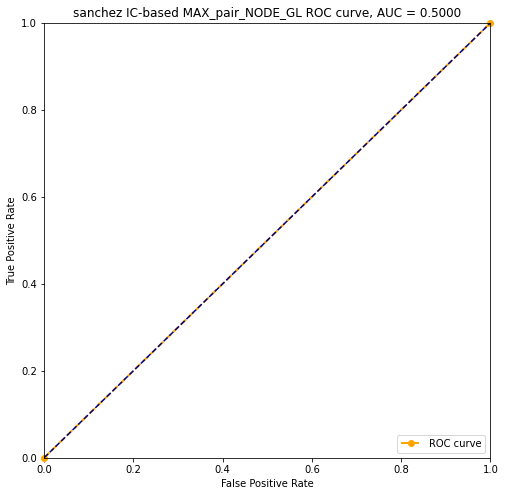

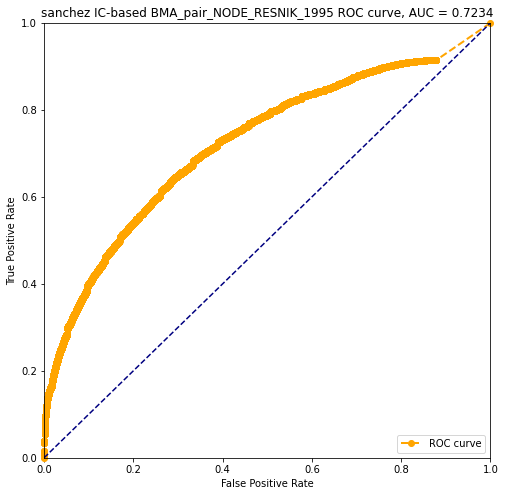

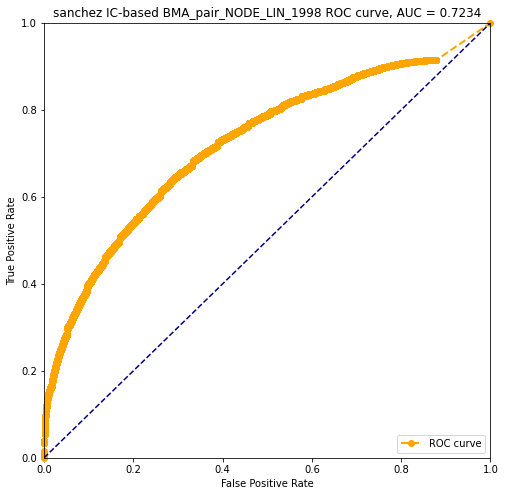

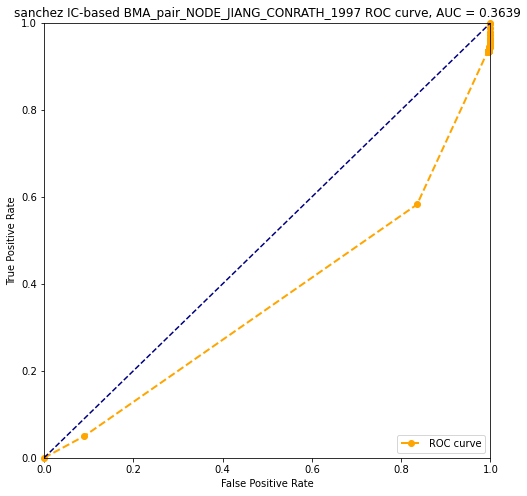

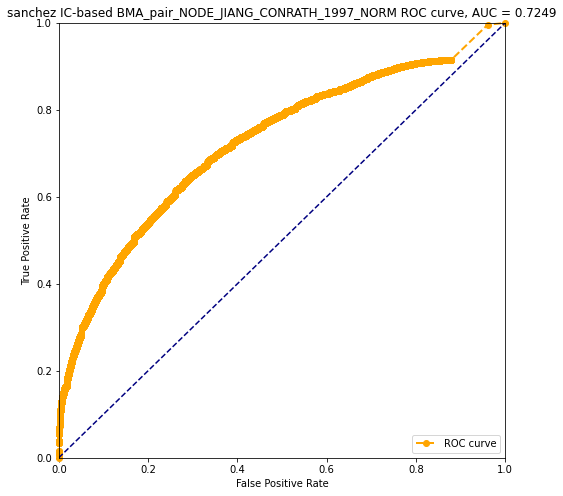

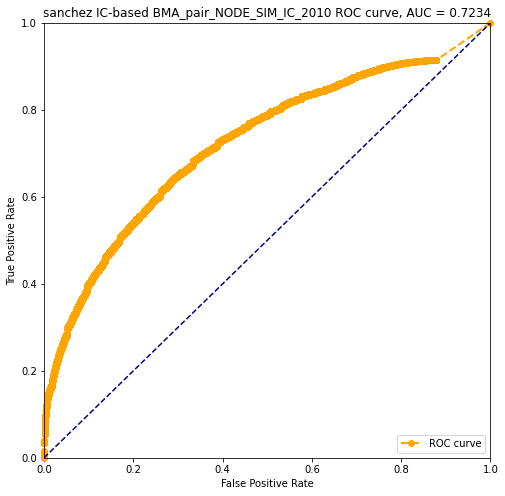

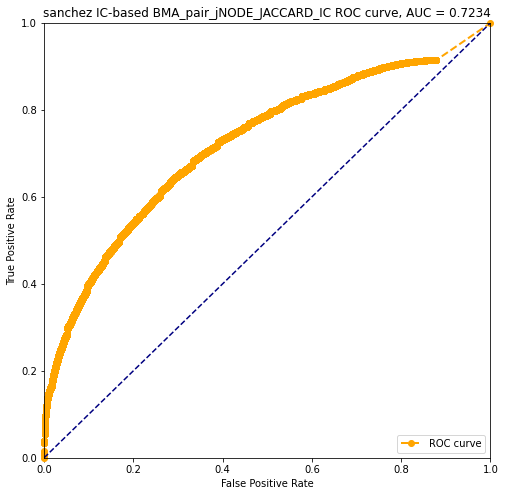

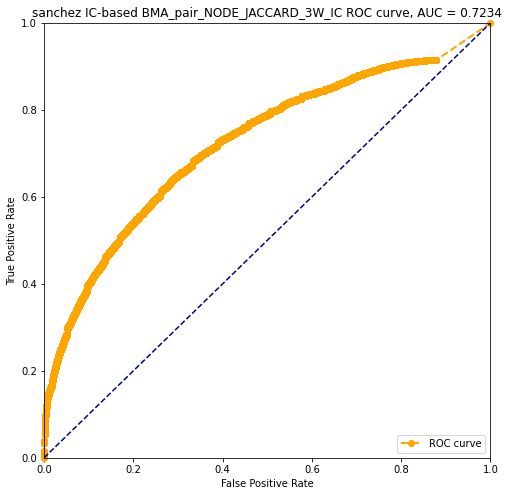

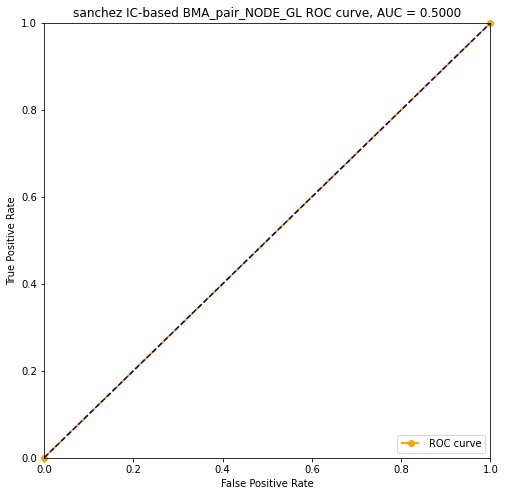

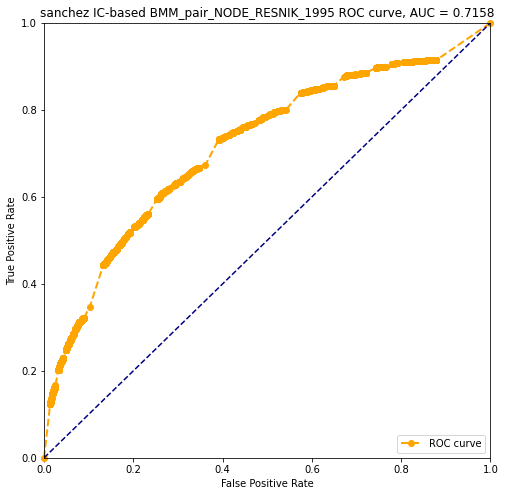

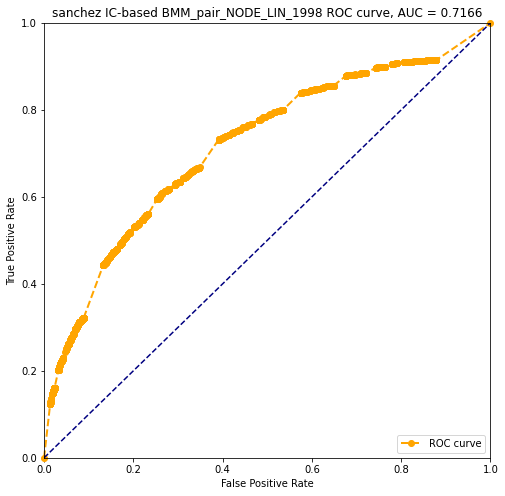

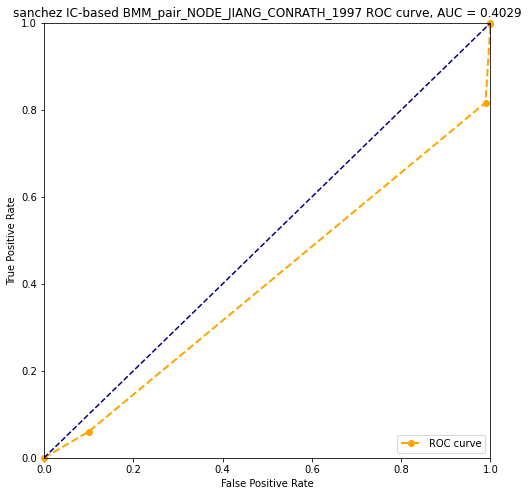

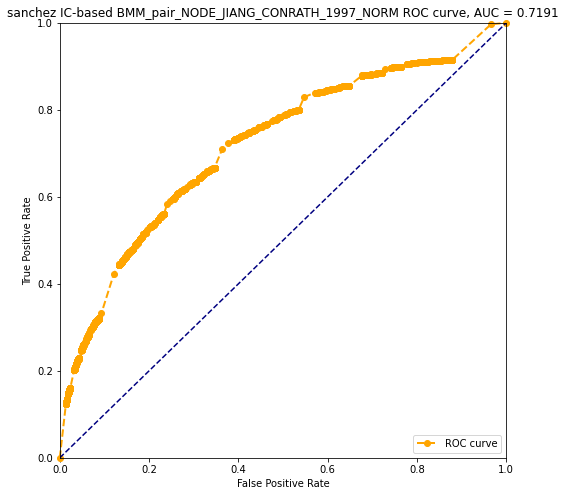

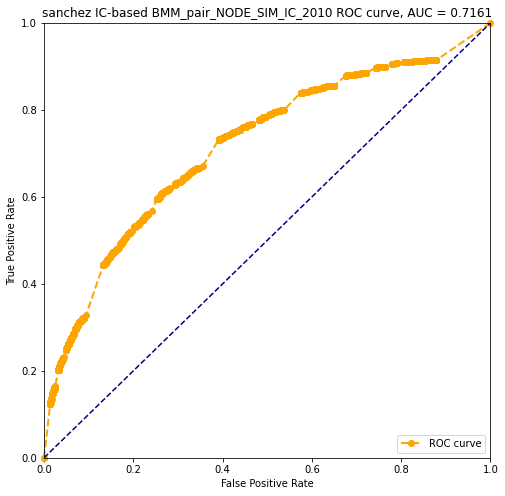

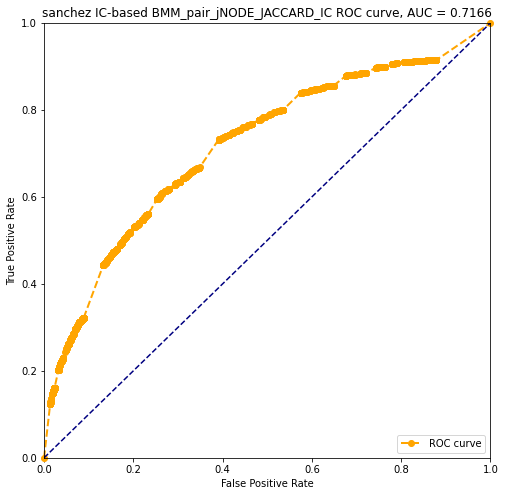

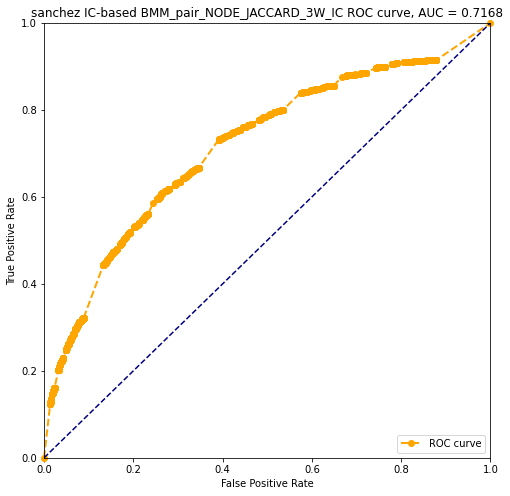

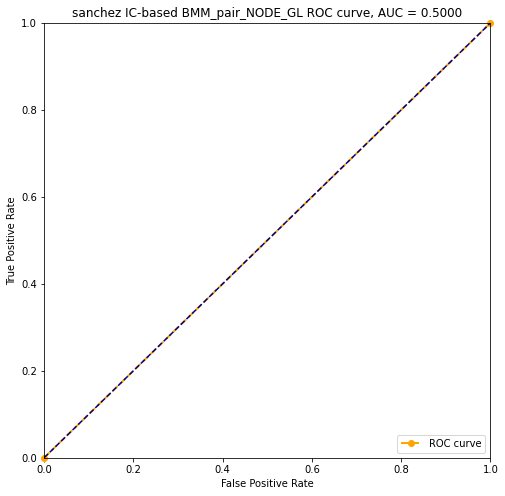

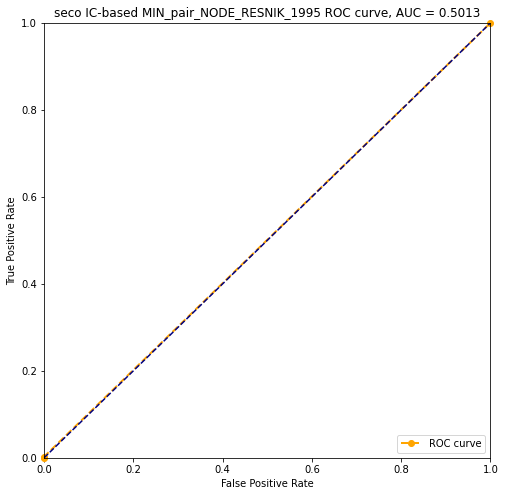

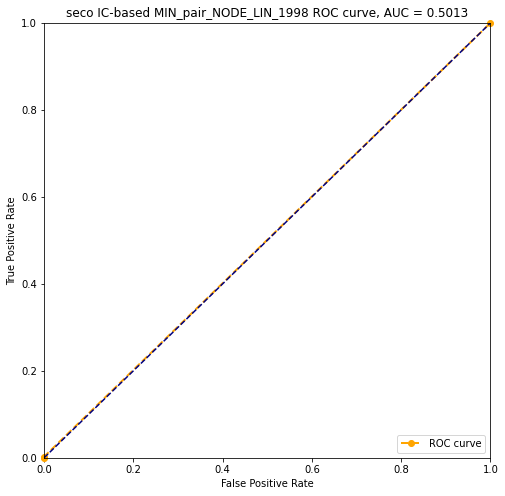

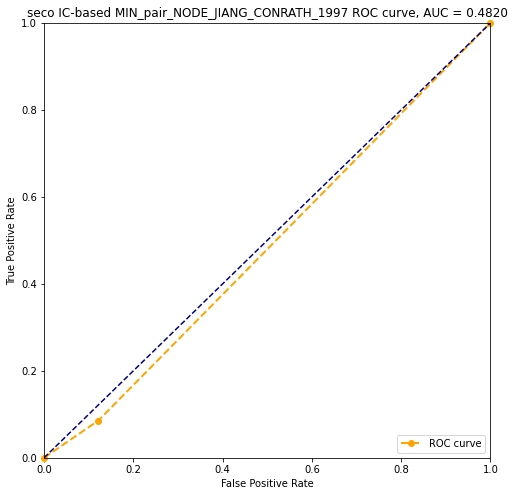

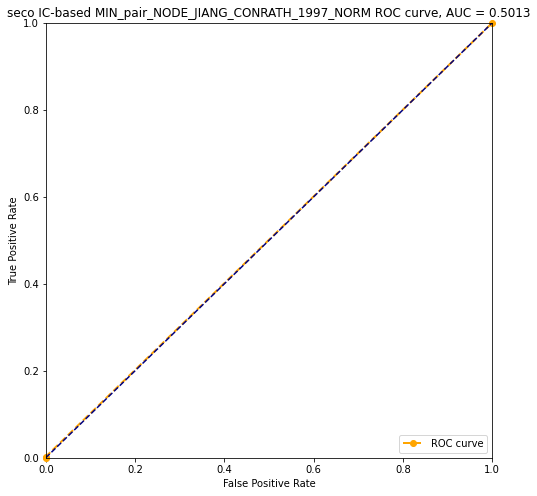

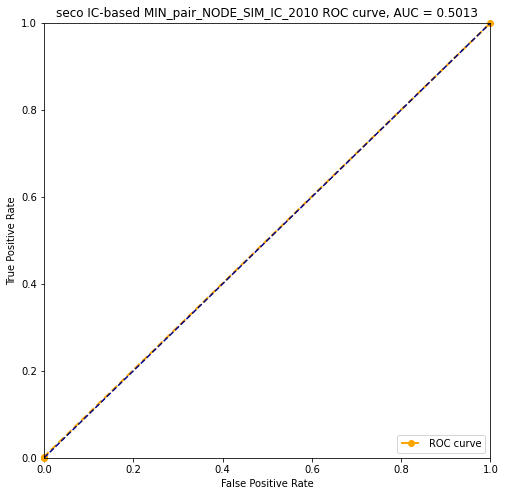

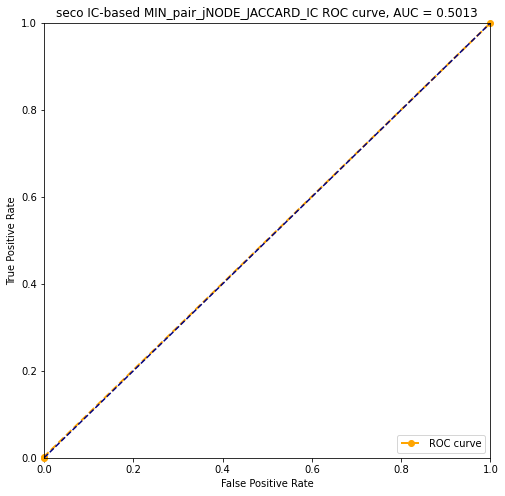

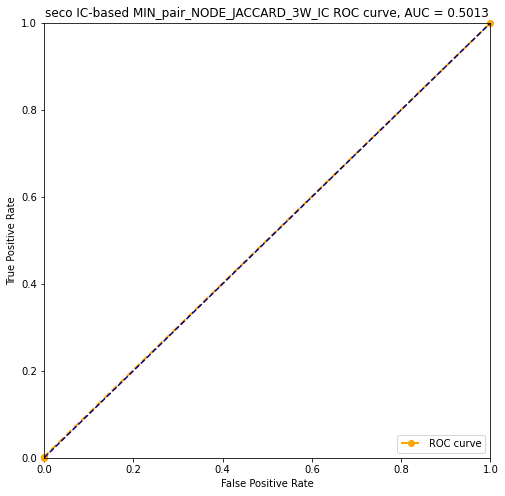

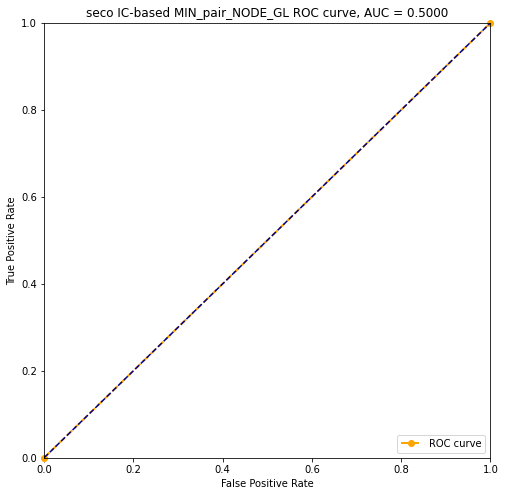

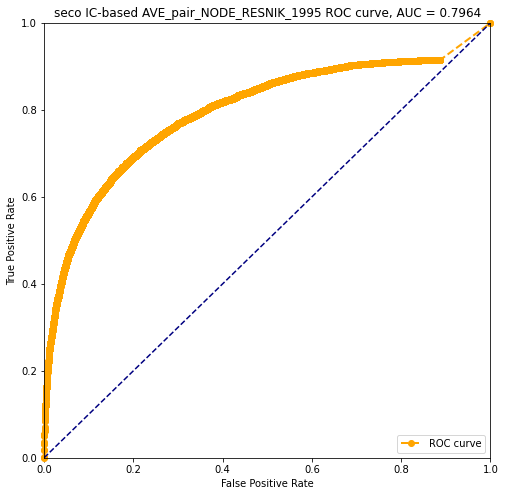

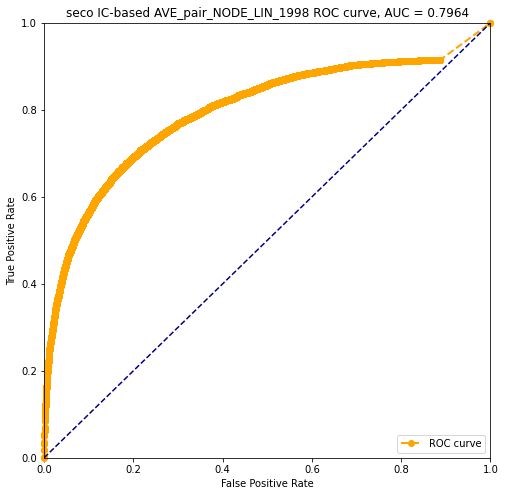

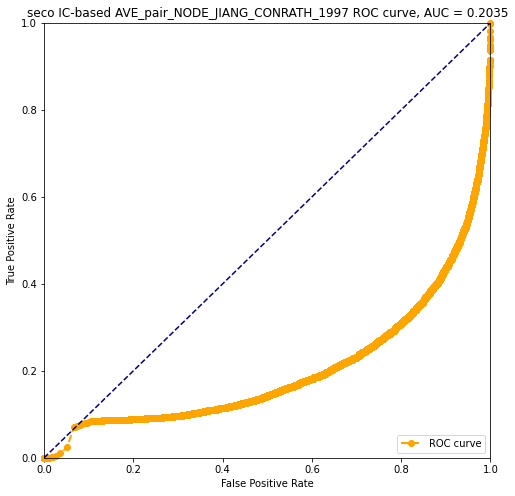

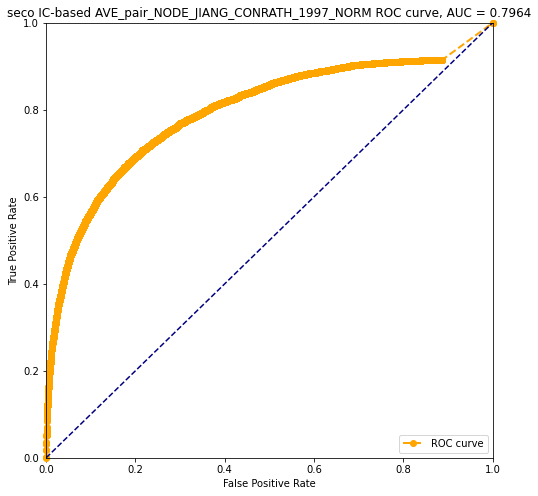

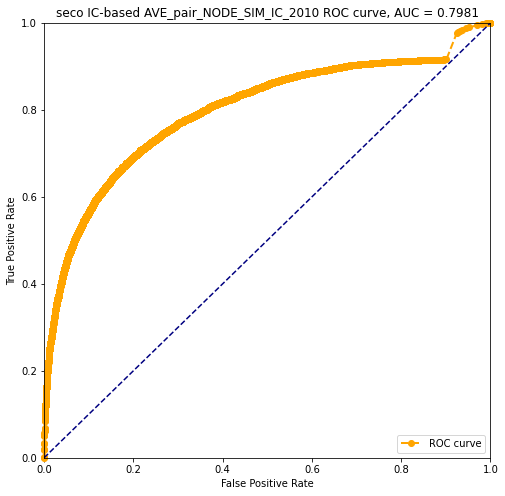

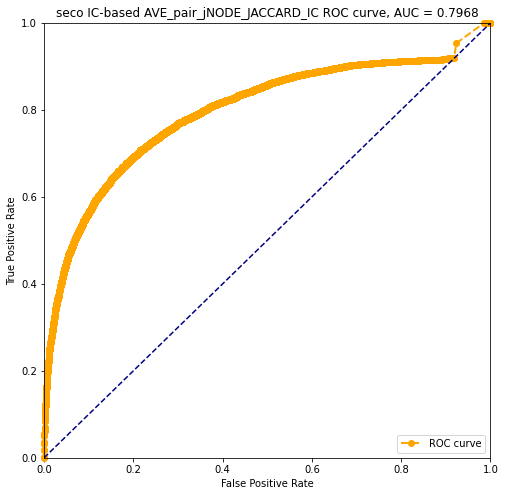

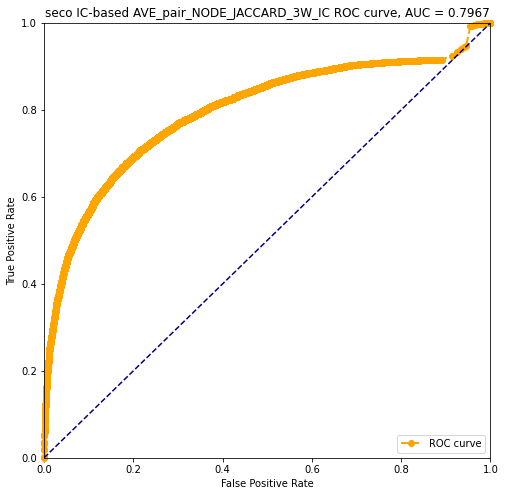

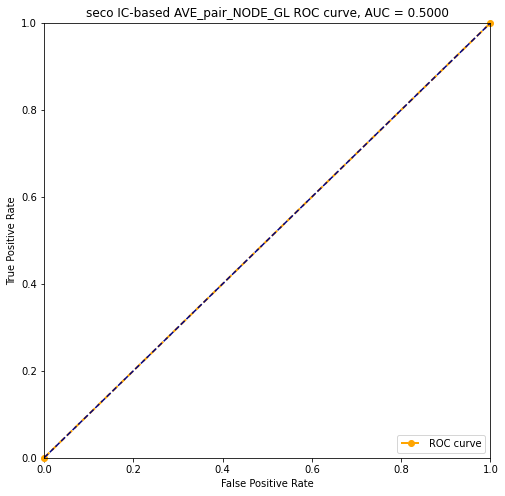

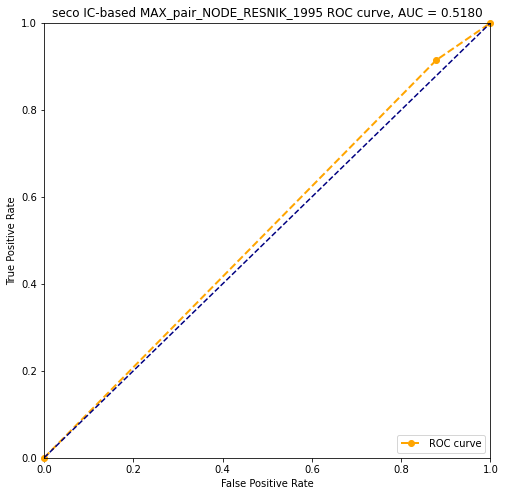

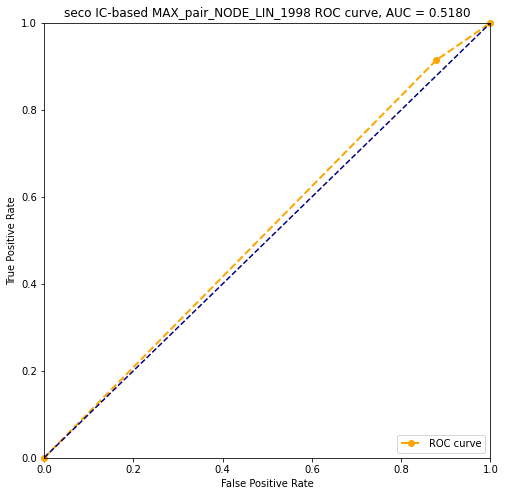

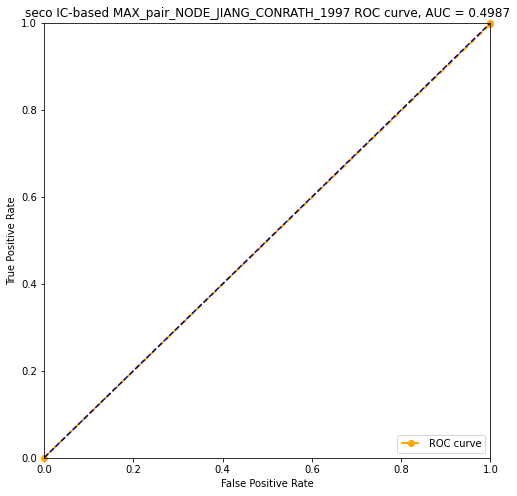

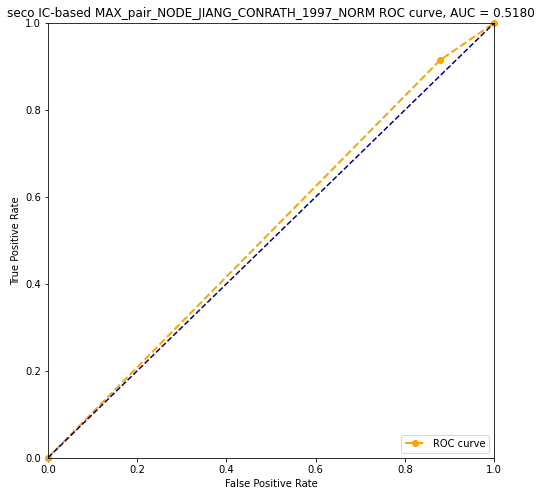

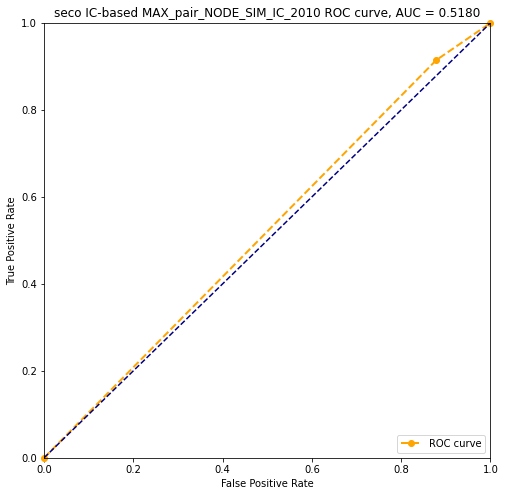

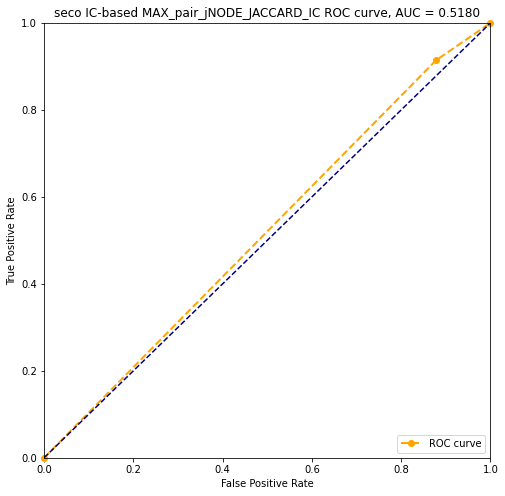

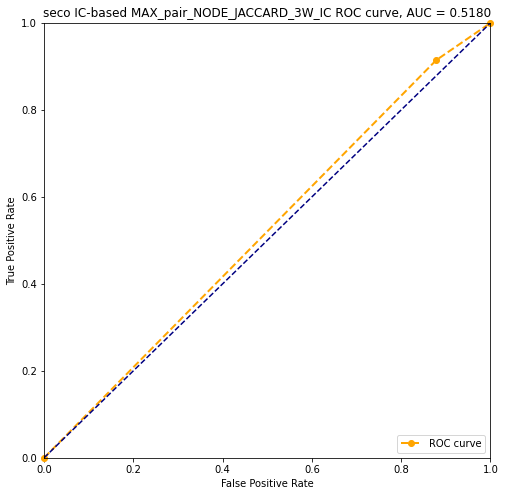

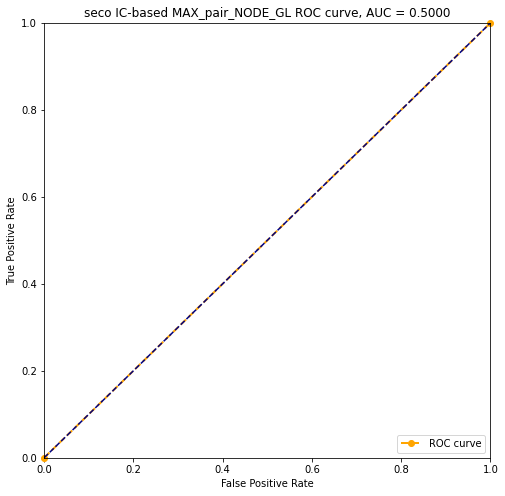

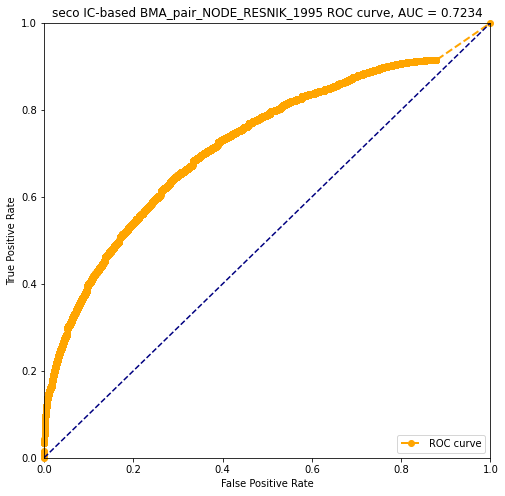

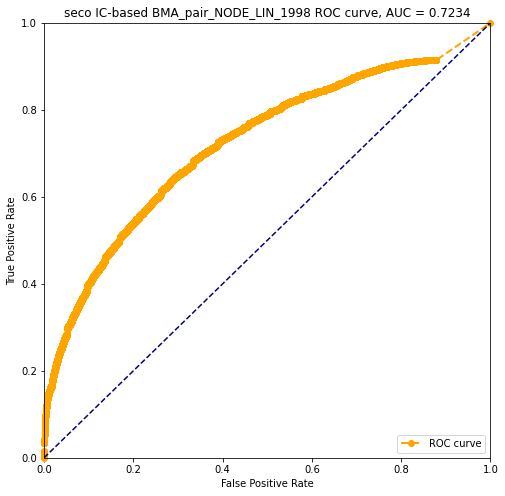

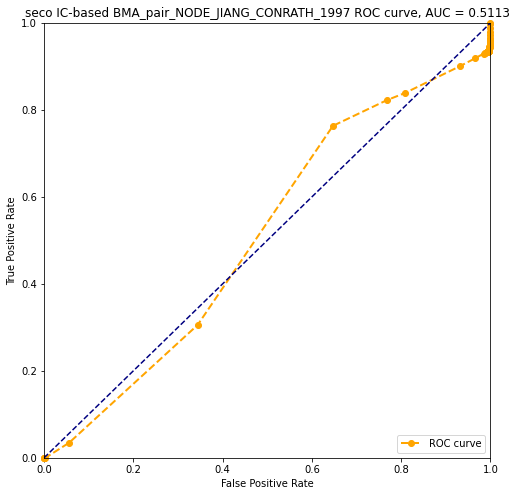

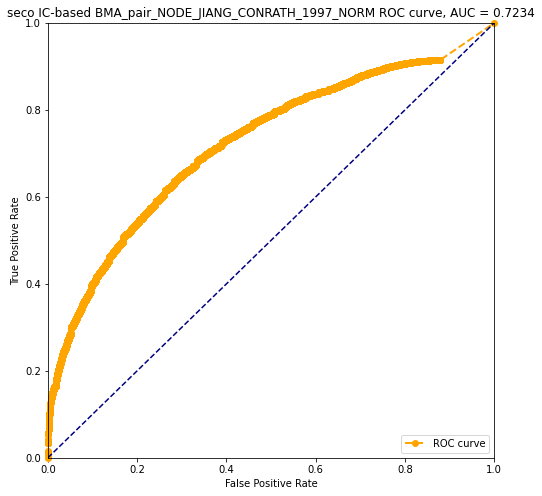

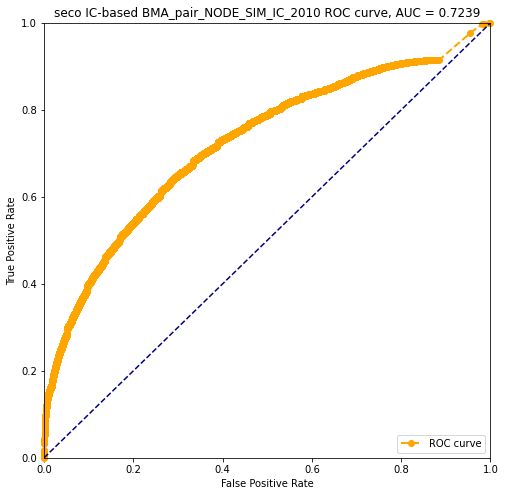

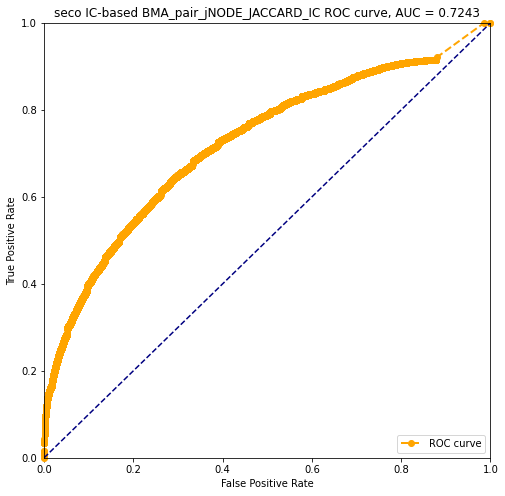

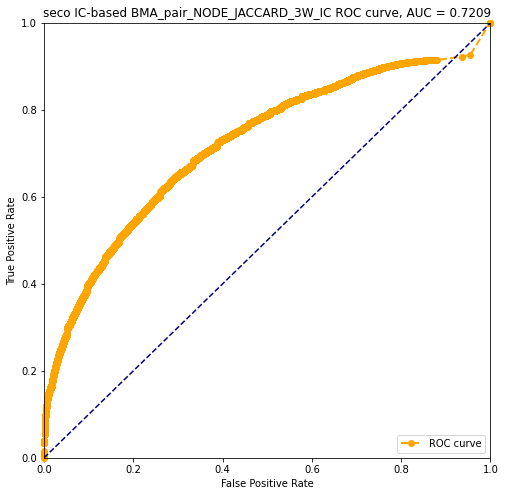

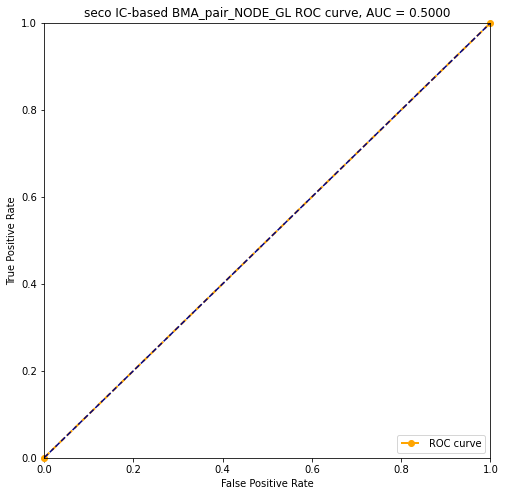

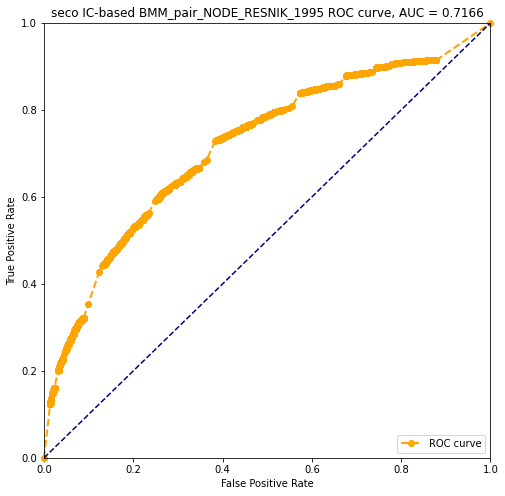

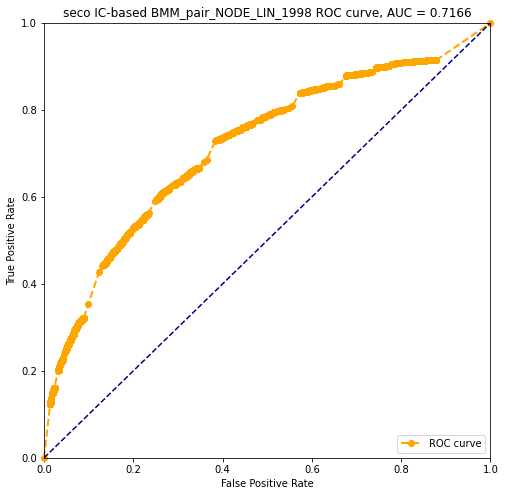

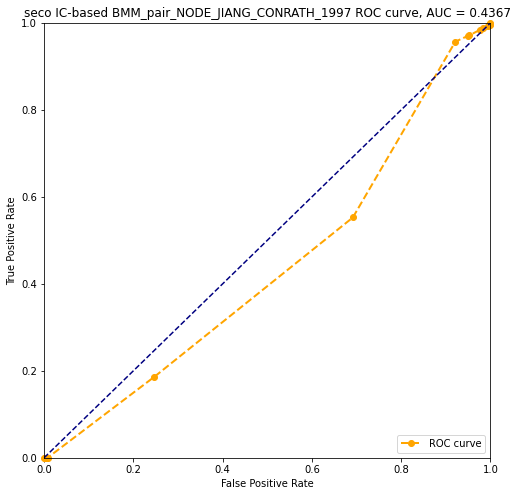

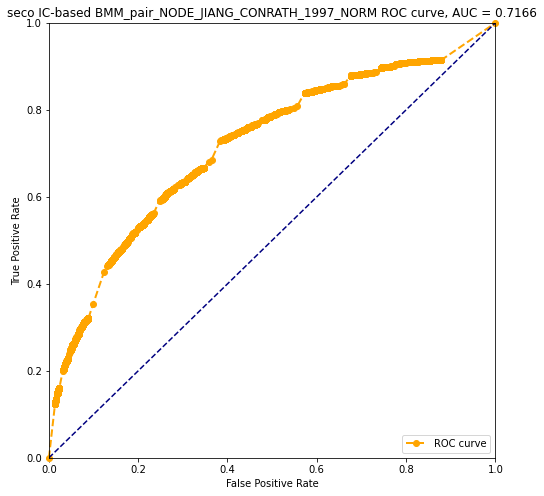

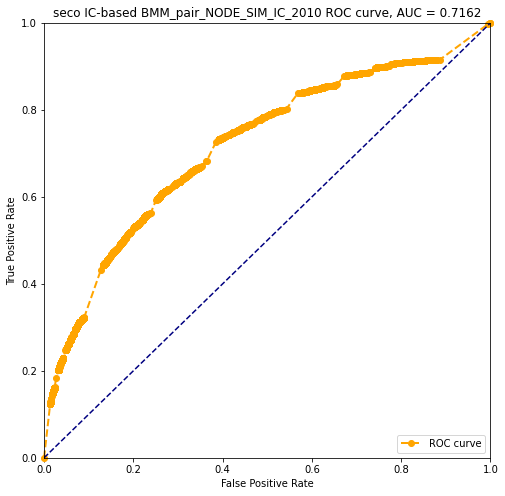

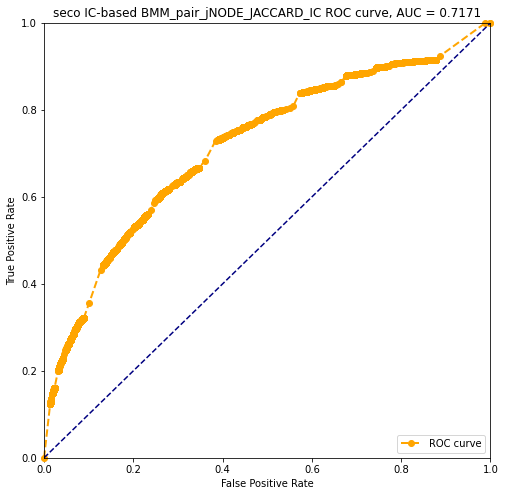

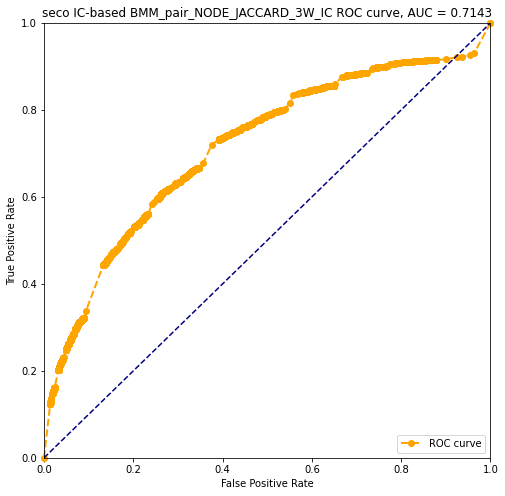

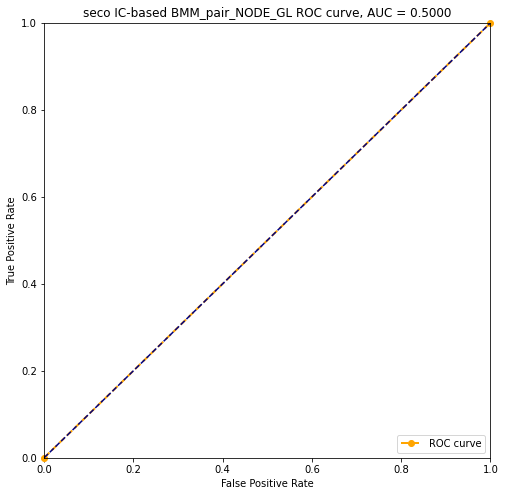

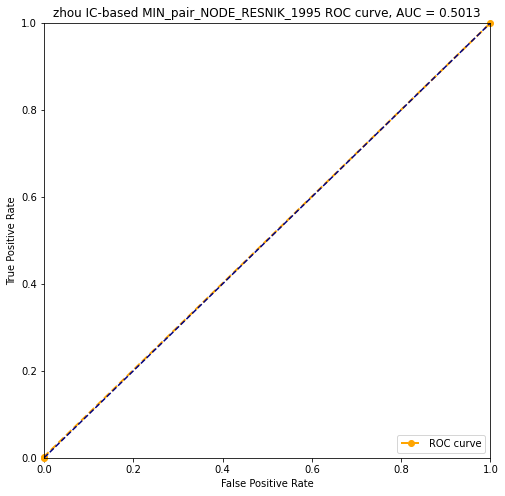

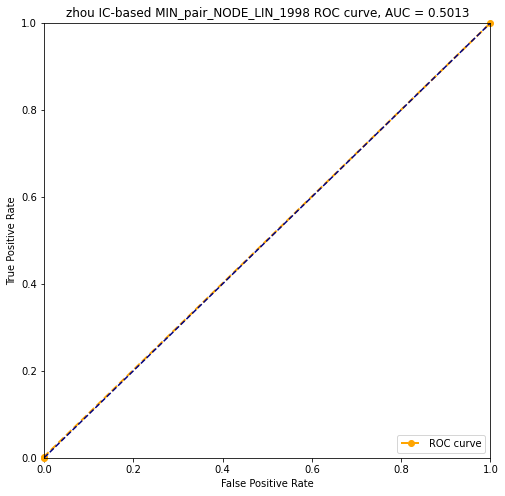

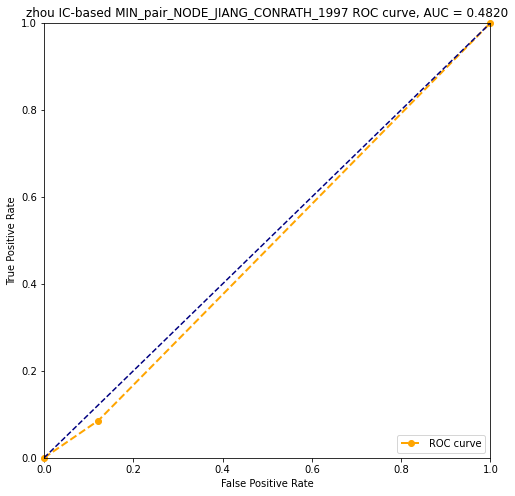

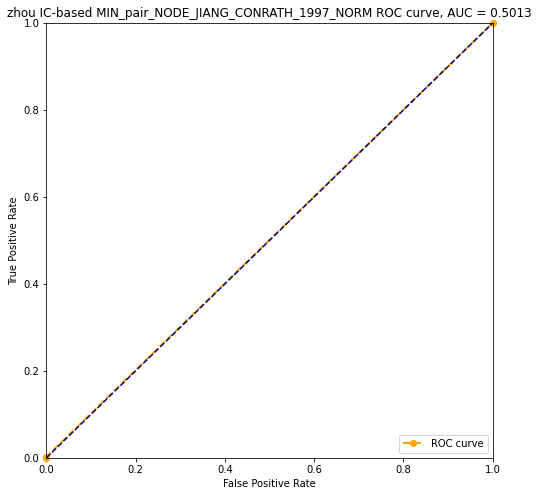

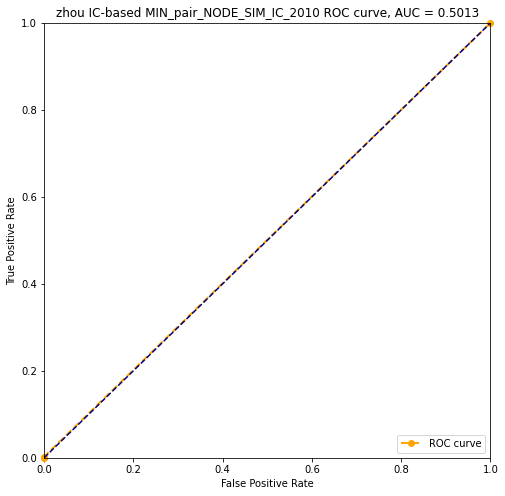

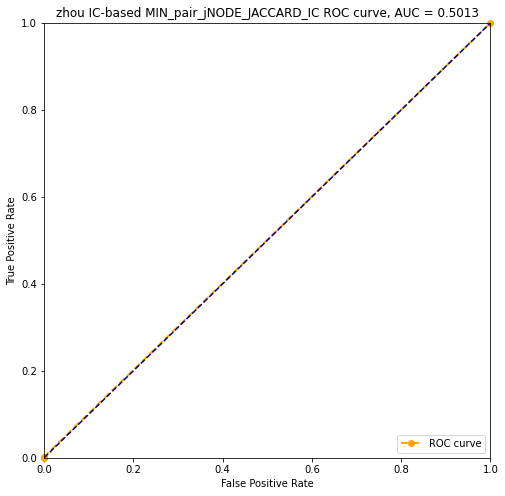

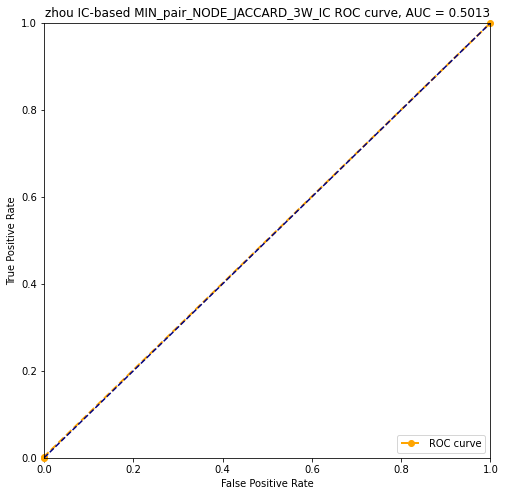

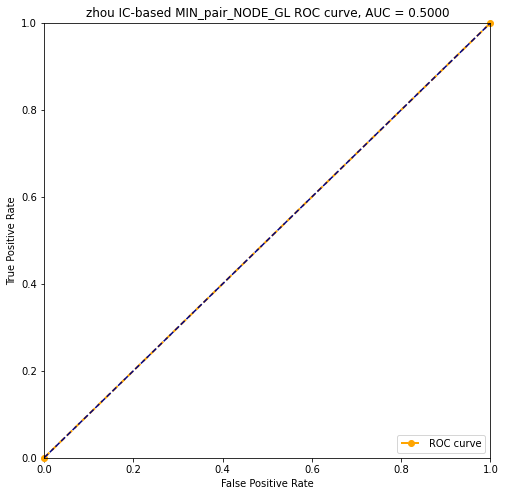

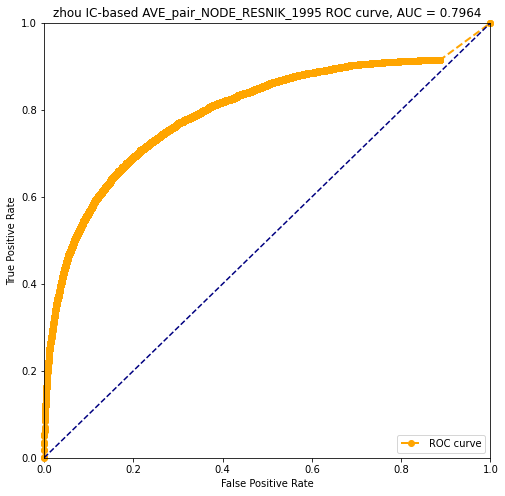

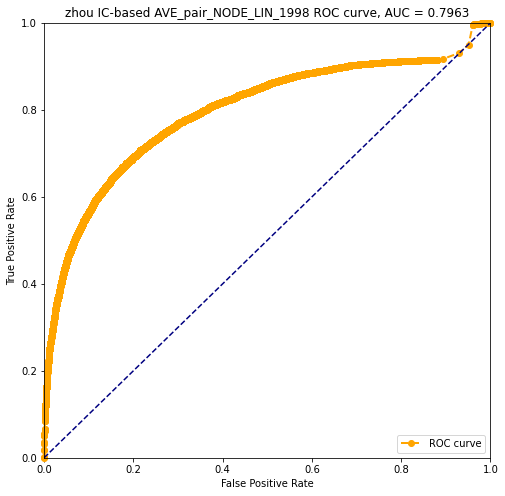

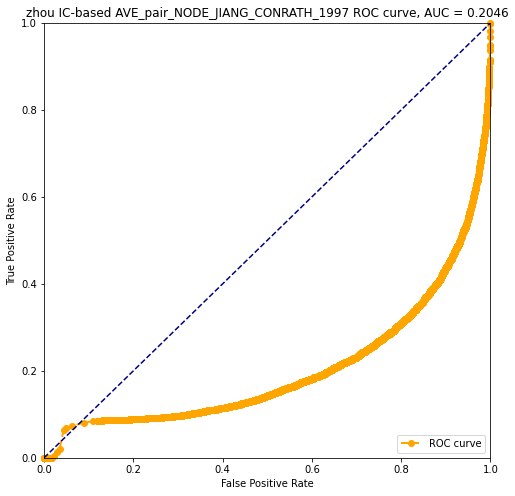

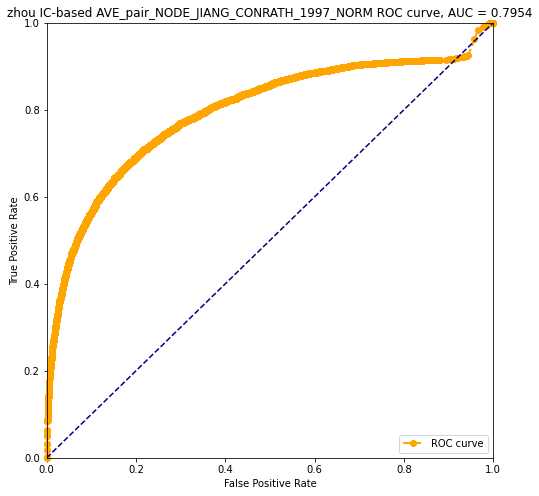

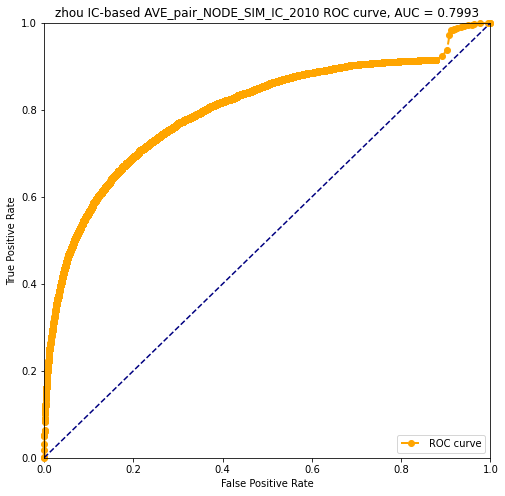

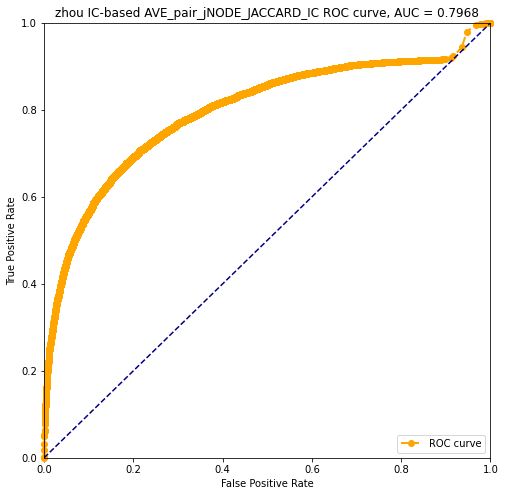

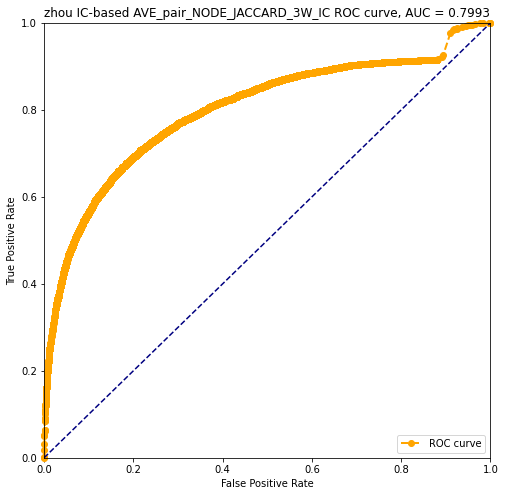

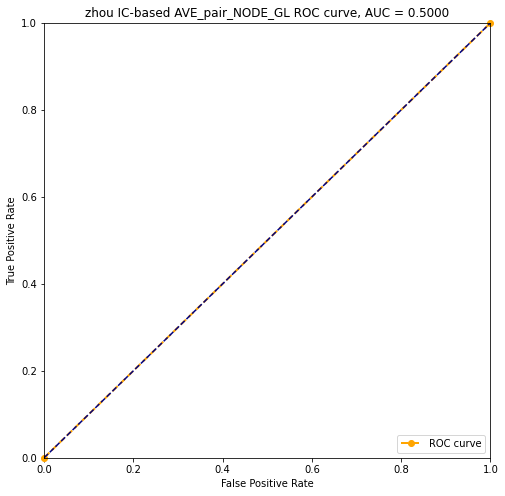

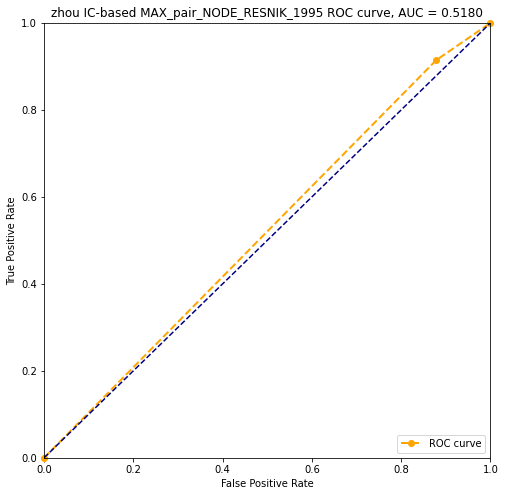

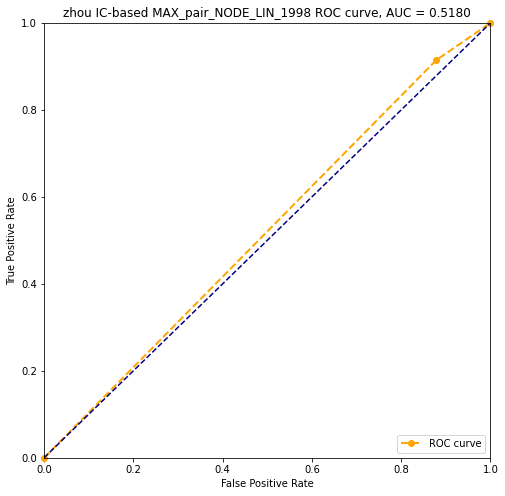

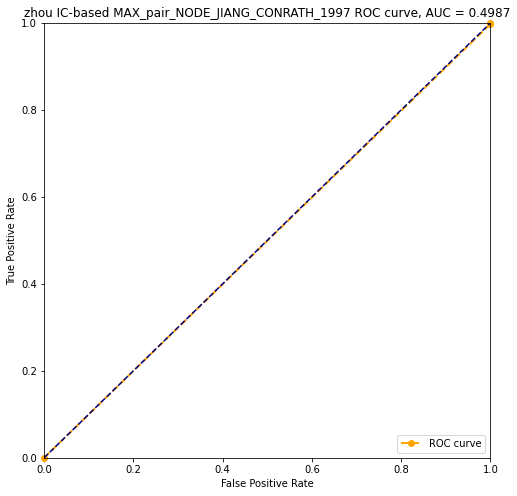

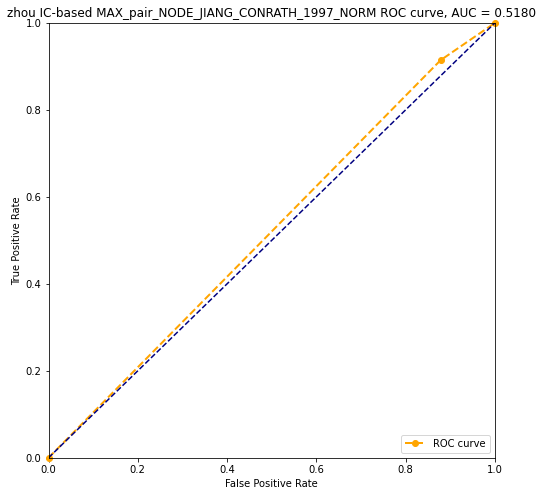

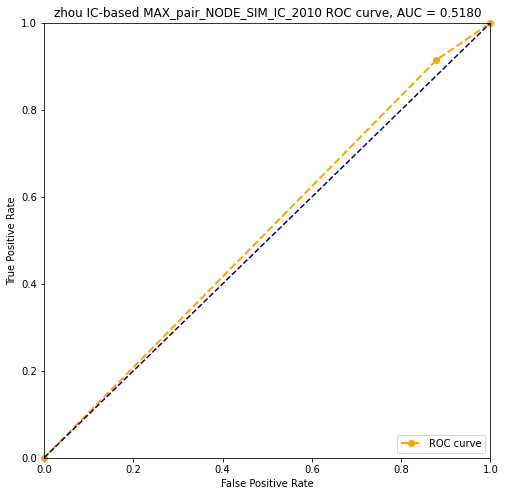

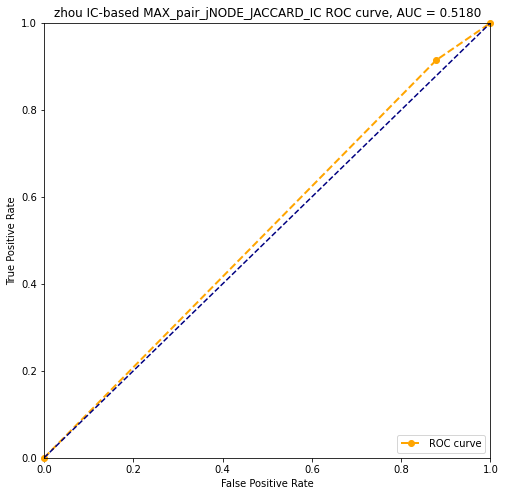

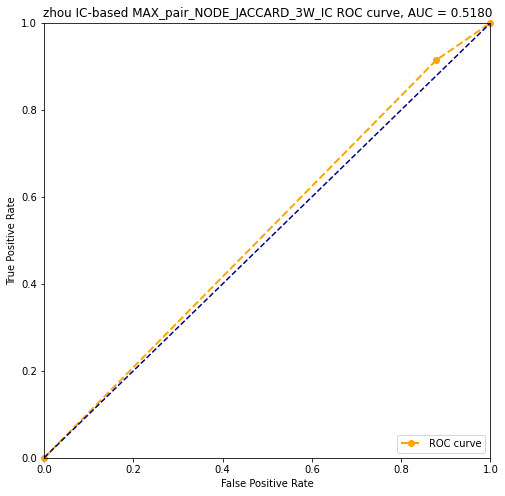

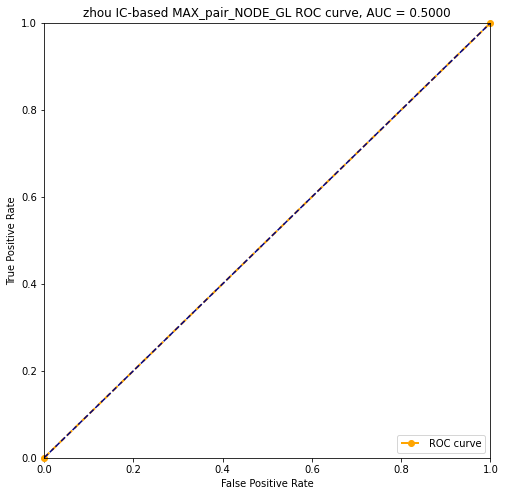

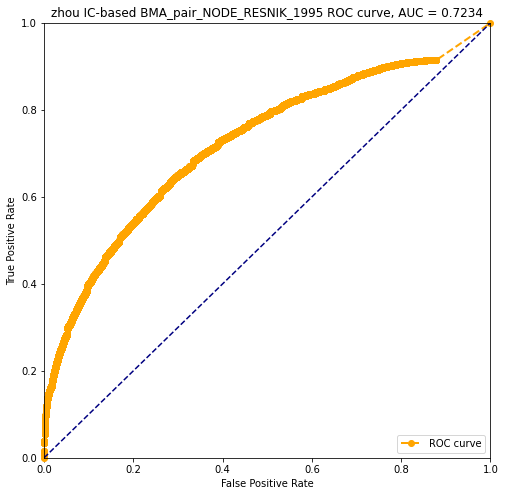

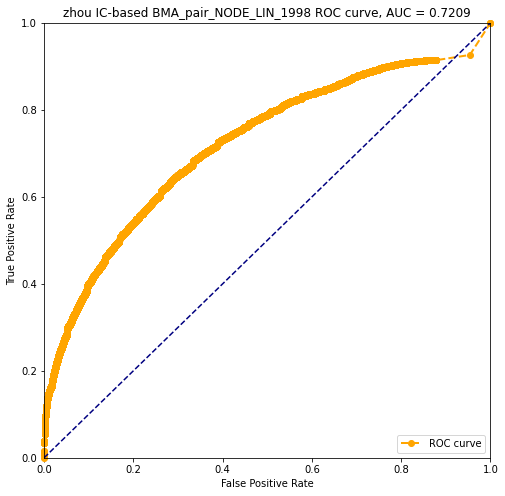

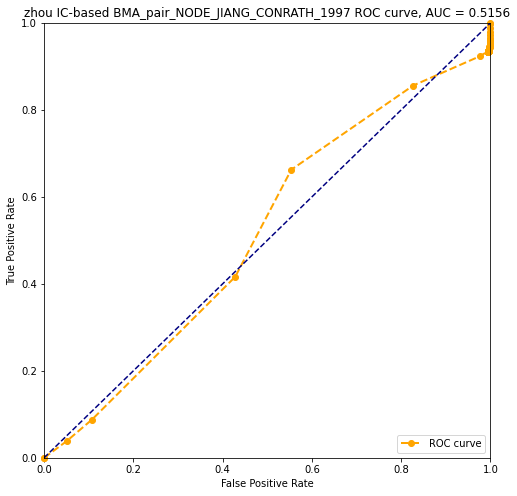

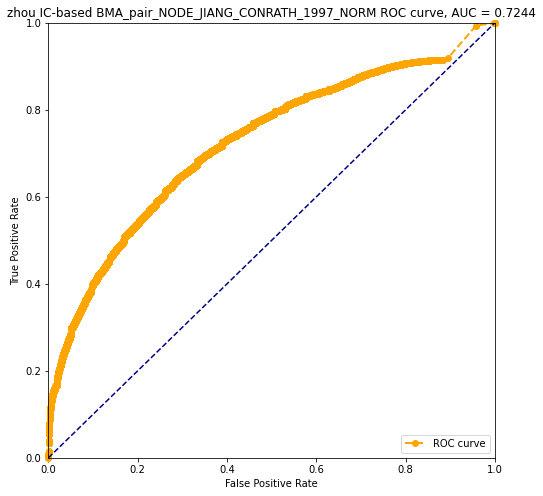

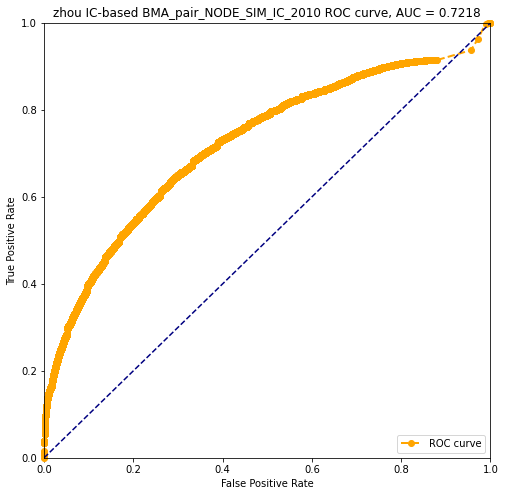

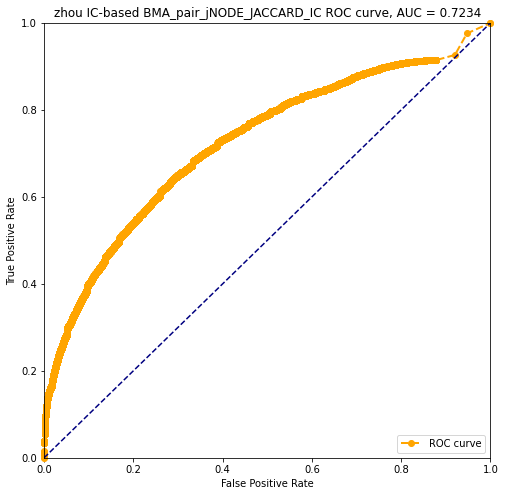

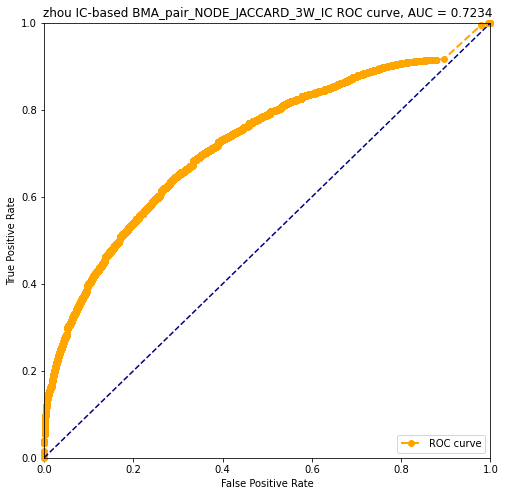

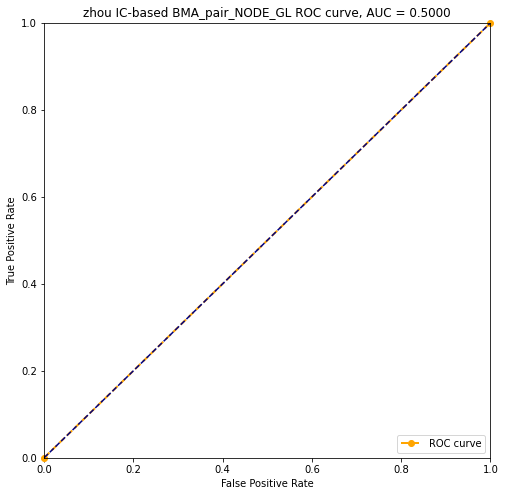

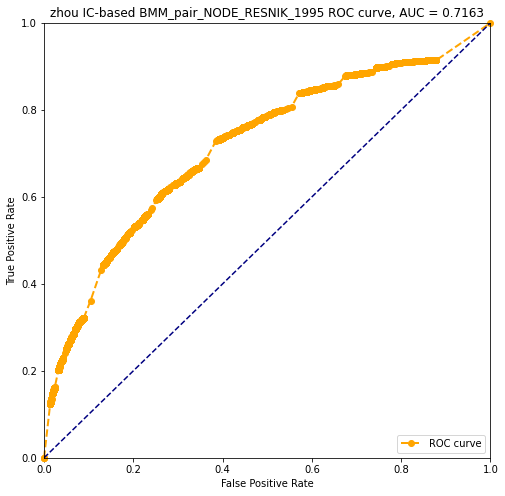

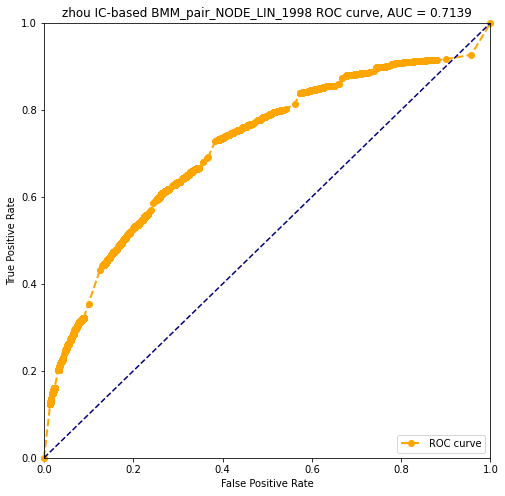

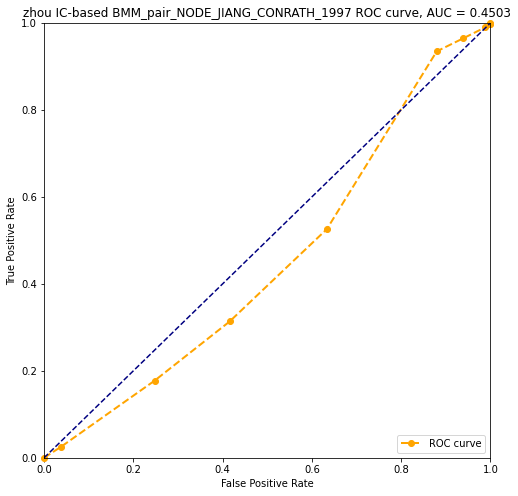

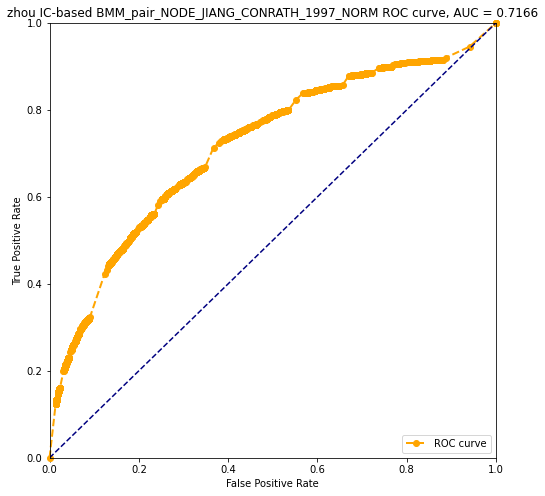

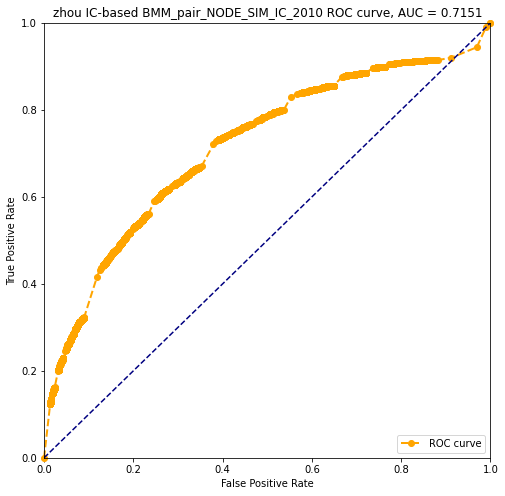

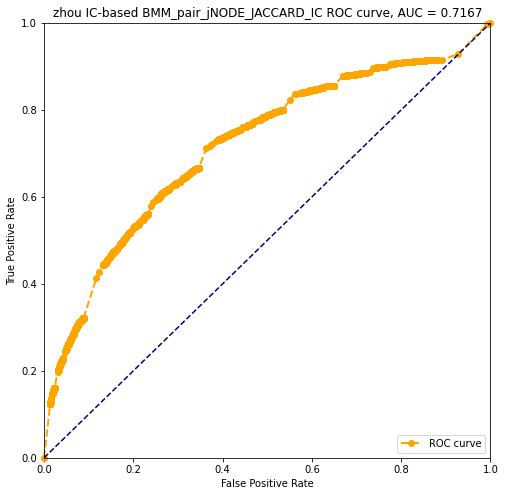

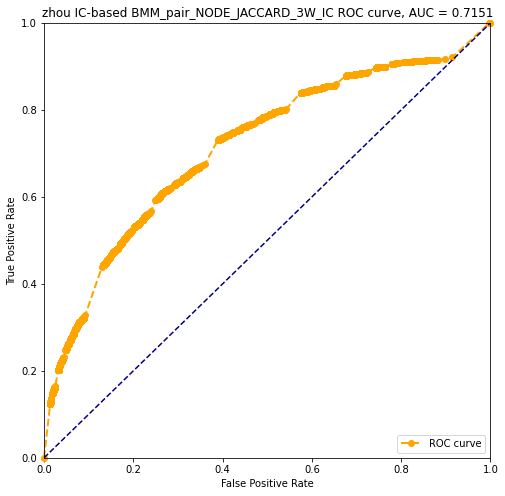

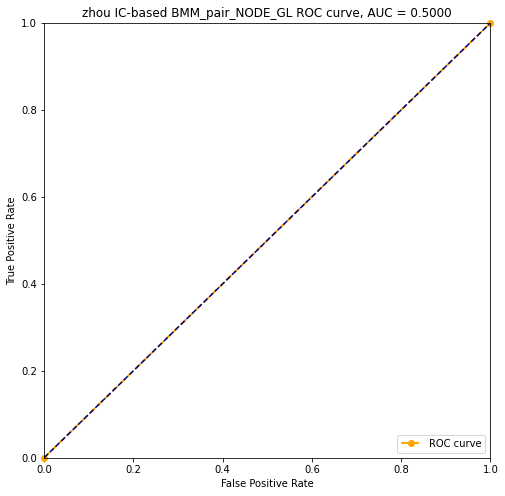

In [10]:
# run on all IC based 

plotROC_ic('ROCmetrics/metrics_max_indirect_groupwise_combinations.tsv')
plotROC_ic('ROCmetrics/metrics_min_indirect_groupwise_combinations.tsv')
plotROC_ic('ROCmetrics/metrics_resnik_indirect_groupwise_combinations.tsv')
plotROC_ic('ROCmetrics/metrics_sanchez_indirect_groupwise_combinations.tsv')
plotROC_ic('ROCmetrics/metrics_seco_indirect_groupwise_combinations.tsv')
plotROC_ic('ROCmetrics/metrics_zhou_indirect_groupwise_combinations.tsv')

## Plot histogram of all AUC scores 

We can load in all the metrics files and extract the AUC scores to plot the distribution.

In [ ]:
# read in all metrics files

auc_scores = pd.DataFrame(columns=['measure', 'AUC'])

metrics_files = os.listdir('ROCmetrics')

for file in metrics_files:
    
    data = pd.read_csv('ROCmetrics/{}'.format(file), sep='\t')
    
    aucs = data.loc[:, ['measure','AUC']]
    
    auc_scores = auc_scores.append(aucs)


# split the results using threshold of 0.5
auc_over_05 = auc_scores.loc[(auc_scores.loc[:, 'AUC'] >= 0.5),:]
auc_under_05 = auc_scores.loc[(auc_scores.loc[:, 'AUC'] < 0.5),:].reset_index(drop=True)

# for scores under 0.5, represent as 1 - score 
for (i, auc) in enumerate(auc_under_05.loc[:,'AUC']):
    
    auc_under_05.loc[i, 'AUC'] = (1 - auc)

# rejoin for complete data 
auc_scores = auc_over_05.append(auc_under_05)

# calculate quantiles of AUC score distribution
q25 = np.quantile(auc_scores.loc[:, 'AUC'].tolist(), 0.25)
q50 = np.quantile(auc_scores.loc[:, 'AUC'].tolist(), 0.5)
q75 = np.quantile(auc_scores.loc[:, 'AUC'].tolist(), 0.75)

# plot histogram with quantiles displayed
plt.hist(auc_scores['AUC'], color = 'orange', edgecolor = 'white',
         bins = 11) # edit bins as required 
plt.title('AUC scores across all measures')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.vlines(q25, 0, 130, color='red', linestyle='dashed', label='0.25 quantile AUC = %.4f'%q25)
plt.vlines(q50, 0, 115, color='navy', linestyle='dashed', label='0.50 quantile AUC = %.4f'%q50)
plt.vlines(q75, 0, 115, color='darkgreen', linestyle='dashed', label='0.75 quantile AUC = %.4f'%q75)
plt.legend( fontsize='x-small',loc="upper right")

plt.savefig('ROCFigures/hist_AUC.svg')